
<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Escudo-UdeA.svg/970px-Escudo-UdeA.svg.png" width="300" height="300">
</div>

# **MODELO DE PREDICCIÓN DE TIEMPO DE ESPERA DE LOS ASEGURADOS EN INCIDENTES DE TRÁNSITO**

# **ESTUDIANTES**

# **Diego Fernando Londoño Londoño**

# **Yenny Patricia Vergara Monsalve**

# **1. DESCRIPCIÓN DEL PROYECTO**


El presente proyecto tiene como objetivo desarrollar un modelo predictivo que estime el tiempo de espera de un asegurado tras reportar un accidente de tránsito, con el fin de optimizar los procesos de atención y mejorar la experiencia del cliente en una compañía aseguradora.

La iniciativa surge de la necesidad de contar con herramientas analíticas que permitan anticipar demoras y gestionar de forma eficiente los recursos disponibles en campo, como gestores de siniestros y unidades móviles.

Para ello, se utilizó un conjunto de datos históricos de siniestros, registrados por la aseguradora a través de sus sistemas de gestión durante un período determinado. Estos datos incluyen variables relacionadas con la ubicación, hora del incidente, tipo de accidente, tráfico, disponibilidad de personal y otros factores relevantes como el clima y la distancia.

Se implementó un proceso iterativo que incluyó limpieza, análisis exploratorio, selección de variables y entrenamiento de distintos modelos de machine learning como regresión lineal, árboles de decisión y random forest, evaluando su desempeño mediante métricas como el MAE y el RMSE.

Entre los principales obstáculos se encontraron problemas de calidad de datos, presencia de valores atípicos y desequilibrios en la distribución de los tiempos de atención.

Los resultados obtenidos muestran que el modelo tiene un desempeño aceptable para predecir tiempos de espera con un margen de error razonable, y representa una herramienta valiosa para la toma de decisiones operativas en tiempo real.


# **2. OBJETIVOS**


**Objetivo del Proyecto**

Predecir el tiempo de espera en la atención de un asegurado durante una incidencia de tránsito, desarrollando un modelo de Machine Learning con el fin de brindar soporte al proceso del gestor de seguros.

**Objetivos Específicos**

•	Realizar un análisis exploratorio y limpieza de datos provenientes de los datos históricos de siniestros para identificar patrones, inconsistencias y variables relevantes.

•	Construir variables derivadas (ingeniería de características) que integren factores espaciales, temporales y contextuales como clima, tráfico, distancia, entre otros.

•	Entrenar y comparar modelos de aprendizaje automático para estimar el tiempo de espera, evaluando su desempeño con métricas como MAE, RMSE y R2

•	Seleccionar el modelo con mejor desempeño y validar su capacidad predictiva para su futura integración en los sistemas de gestión de siniestros de la aseguradora.

•	Emitir el conjunto de recomendaciones correspondientes que permitan mejorar el rendimiento del modelo seleccionado en etapas posteriores de la investigación



# **3. IMPORTACIÓN DE LIBRERÍAS**

## **3.1. Librerias y configuraciones previas**

In [1]:
# Gestion de librerias
# ==============================================================================
import numpy as np
import pandas as pd
import math
from importlib import reload

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib

# Preprocesado y modelado
# ==============================================================================

#creación de modelos
from sklearn.ensemble import GradientBoostingRegressor

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import multiprocessing

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from rich import print

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Instalar libereria
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.1 MB/s eta 0:00:00


## **3.2. Funciones**

In [2]:
# Función para graficar atributos en barras, pair plot o box-plot
def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):
    '''
    Función para graficar atributos en barras, pair plot o box-plot.
        Parameters:
            ncols       [integer]    Number of columns for subplots.
            data        [dataframe]  Features dataframe.
            columns     [list]       List of names of featutes in dataframe to plot.
            target_var  [string]     Name of column of target variable or feature.
            plot_type   [string]     Name of graphic. [countplot, boxplt or scatterplot]
            title       [string]     Title for figure
            rot         [integer]    Rotation angle for x axis labels
        Returns:
            Plot of figure

    Ejemplos:
        multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)
        multiple_plot(1, d , 'purpose', 'age_yrs', 'boxplot', 'Distribución de la variable próposito vs la edad',90)
        multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)
        multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)
        multiple_plot(3, d , catCols, 'age_yrs', 'boxplot', 'Distribución de la variables categóticas vs. la edad',30)
    '''


    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            zorder=1
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")

        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot

# **4. CARGA DE DATOS**

## **4.1. Carga del dataset**

In [4]:
# Cargar dataset final para el procesamiento
# ==============================================================================
import pandas as pd

archivo = "https://github.com/ferdilo04/Datos_Analitica/raw/refs/heads/master/Monografia_2025/DataSet_PREDITIMESACC_V5.xlsx"
df = pd.read_excel(archivo)

# Ver estructura básica
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head(3))

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

Dimensiones del dataset:
(8967, 31)

Primeras filas:

idproceso   placa                    fecha             fechallegada  \
0       1113  MOY664  2016-06-08 09:20:16.223  2016-06-08 09:20:16.223   
1       1114  TSZ179  2016-06-08 11:56:02.857  2016-06-08 11:56:02.857   
2       1115  STW598  2016-06-08 14:03:49.283  2016-06-08 14:03:49.283   

   annoregistro  mesregistro  diaregistro  horaregistro  diasemana  \
0          2016            6            8             9  Miercoles   
1          2016            6            8            11  Miercoles   
2          2016            6            8            14  Miercoles   

   annoatencion  ...  Acuerdo           UsuarioRegistra  LiberaVehiculo  \
0        2016.0  ...      NaN  Juan Felipe Hoyos Botero             NaN   
1        2016.0  ...      NaN             Elkin Lezcano             NaN   
2        2016.0  ...      NaN             Elkin Lezcano             NaN   

   ResultadoFallo         Aseguradora              Abogadounico  \
0             NaN  Liberty Seguros SA  Juan Felipe Hoyos Botero   
1             NaN           Asegurado  Juan Felipe Hoyos Botero   
2             NaN           Asegurado  Juan Felipe Hoyos Botero   

              RandomAbogado  \
0      ELSA ROSA VEGA LOPEZ   
1  Juan Felipe Hoyos Botero   
2      ELSA ROSA VEGA LOPEZ   

                                          Decripcion Lluvia    distancia  
0  Liberty <br>PRELIMINAR <br>LESIONES <br>ASIG 0...     No  8482.615228  
1  Liberty <br>Lesiones <br>Andres GARCES <br>313...     No  8486.581225  
2  Liberty <br>SIMPLE <br>Jorge VELEZ <br>3192538...     No  8482.832639  

[3 rows x 31 columns]

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

## **4.2. Comprensión de los Datos**


Se realizó un análisis exploratorio sobre el conjunto de datos proporcionado por la empresa AsisNet, que contiene información detallada de accidentes de tránsito atendidos,los datos son proporcionados son partir del **mes de abril del 2016 al 11 de mayo del 2025**.

El DataSet tiene el nombre **DataSet_PREDITIMESACC.xlsx** y se encuentra en formato de excel con extensión .xlsx , con un tamaño de **3.330 Kb** el cual contiene **8967** registros y **36** variables , la información del dataset fue obtenida mediante una consulta Transat SQL en un servidor de base de datos SQL Server, que contiene información de las incidencias de tránsito y de las gestiones de atención realizadas por los agentes de las aseguradoras suscritas a la empresa AsisNet .


**A continuación una descripción de las variables:**

****

| Columna           | Descripción                                                                 | Ejemplo                     |
|-------------------|------------------------------------------------------------------------------|-----------------------------|
| idproceso         | Código para identificar el caso                                              | 10                          |
| placa             | Placa del vehículo                                                           | BQX320                      |
| fecha             | Fecha en que se reporta el accidente                                         | 2025-05-02 10:40:25         |
| fechallegada      | Fecha en que se llega al sitio donde ocurrió el accidente                   | 2025-05-02 10:50:25         |
| annoregistro      | Año en que se reporta el accidente                                           | 2025                        |
| mesregistro       | Mes en que se reporta el accidente                                           | 5                           |
| diaregistro       | Día en que se reporta el accidente                                           | 2                           |
| horaregistro      | Hora en que se reporta el accidente                                          | 10                          |
| diasemana         | Día de la semana en que se reporta el accidente                              | Lunes                       |
| annoatencion      | Año en que se llega al sitio donde ocurrió el accidente                     | 2025                        |
| mesatencion       | Mes en que se llega al sitio donde ocurrió el accidente                     | 5                           |
| diaatencion       | Día en que se llega al sitio donde ocurrió el accidente                     | 2                           |
| Horaantencion     | Hora en que se llega al sitio donde ocurrió el accidente                    | 10                          |
| TiempoAtencion    | Diferencia en minutos entre el reporte y la llegada                         |                             |
| HoraPicoTarde     | ¿Ocurrió en hora pico de la tarde (5 a 7 pm)? (Sí/No)                       | Si                          |
| HoraPicoManana    | ¿Ocurrió en hora pico de la mañana (6:30 a 8:30 am)? (Sí/No)                | No                          |
| InicioNoche       | ¿Ocurrió entre las 7 pm y 11:59 pm? (Sí/No)                                 | No                          |
| Amanecer          | ¿Ocurrió entre las 12 am y 5:59 am? (Sí/No)                                 | Si                          |
| Municipio         | Municipio donde ocurrió el accidente                                         | No                          |
| Intsancia         | Tipo de accidente reportado por la aseguradora                              | Preliminar con lesiones     |
| clienteimportante | Si el asegurado es cliente importante                                       | Banco de accidente          |
| Acuerdo           | Al acuerdo que se llega entre las partes implicadas                         | Tránsito                    |
| UsuarioRegistra   | Usuario que registra el caso en el sistema                                   | Carolina Garcia Valencia    |
| LiberaVehiculo    | Si el vehículo fue retenido y luego liberado                                | Liberado                    |
| ResultadoFallo    | Si el fallo en audiencias es a favor o en contra                            | A favor                     |
| Aseguradora       | Aseguradora que reporta el accidente                                        | Liberty Seguros             |
| Abogadounico      | Abogado disponible para atender el caso                                     | Carolina Garcia Valencia    |
| RandomAbogado     | Abogado que finalmente atiende el caso                                      | Carolina Garcia Valencia    |


# **5. ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

##**5.1. Resumen General del Dataset**

In [5]:
# Identificar columnas numéricas y columnas categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("[bold]RESUMEN GENERAL DEL DATASET [/bold]")
print(f"Total de filas: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")
print(f"Variables numéricas: {len(numeric_cols)}")
print(f"Variables categóricas: {len(cat_cols)}")


===== RESUMEN GENERAL DEL DATASET =====

Total de filas: 8967

Total de columnas: 31

Variables numéricas: 11

Variables categóricas: 20

### **5.1.1. Identificación de los tipos de columnas que tiene el DataSet**

In [6]:
df.info() #Visualización de las columnas e identificación de los tipos de columnas que tiene el DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idproceso          8967 non-null   int64  
 1   placa              8967 non-null   object 
 2   fecha              8967 non-null   object 
 3   fechallegada       8040 non-null   object 
 4   annoregistro       8967 non-null   int64  
 5   mesregistro        8967 non-null   int64  
 6   diaregistro        8967 non-null   int64  
 7   horaregistro       8967 non-null   int64  
 8   diasemana          8967 non-null   object 
 9   annoatencion       8040 non-null   float64
 10  mesatencion        8040 non-null   float64
 11  diaatencion        8040 non-null   float64
 12  Horaantencion      8040 non-null   float64
 13  TiempoAtencion     8040 non-null   float64
 14  HoraPicoTarde      8967 non-null   object 
 15  HoraPicoManana     8967 non-null   object 
 16  InicioNoche        8967 

### **Interpretación del Dataset**


| **Aspecto**                               | **Variable(s)**                                                                                                                                                                                | **Descripción e Interpretación**                                                                                                                                                                                                                                                                  |
| ----------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Identificación del registro**           | idproceso, placa                                                                                                                                                                               | Identifican de forma única cada proceso y el vehículo involucrado. Permiten trazabilidad y análisis por caso o cliente.                                                                                                                                                                           |
| **Dimensión del dataset**                 | —                                                                                                                                                                                              | 8.967 registros y 31 variables, con un tamaño aproximado de 2.1 MB.                                                                                                                                                                                                                               |
| **Tipo de problema**                      | TiempoAtencion (variable objetivo)                                                                                                                                                             | Predicción de un valor continuo que representa el tiempo de atención en minutos. Se trata de un problema de regresión supervisada.                                                                                                                                                                |
| **Estructura general de datos**           | —                                                                                                                                                                                              | 20 variables categóricas, 5 numéricas enteras y 6 numéricas decimales.                                                                                                                                                                                                                            |
| **Fechas y tiempos de registro**          | fecha, annoregistro, mesregistro, diaregistro, horaregistro, diasemana                                                                                                                         | Representan la fecha y hora del registro del siniestro. Están completas y permiten generar variables derivadas como día laboral, fin de semana o franja horaria.                                                                                                                                  |
| **Fechas y tiempos de atención**          | fechallegada, annoatencion, mesatencion, diaatencion, Horaantencion                                                                                                                            | Describen el momento en que inicia la atención del caso. Presentan aproximadamente un 10% de valores faltantes.                                                                                                                                                                                   |
| **Variable objetivo (Target)**            | TiempoAtencion                                                                                                                                                                                 | Indica el tiempo total de atención en minutos. Contiene 8.040 valores válidos, equivalentes al 90 % de los casos.                                                                                                                                                                                 |
| **Condiciones del evento**                | HoraPicoTarde, HoraPicoManana, InicioNoche, Amanecer, Lluvia, Municipio, distancia                                                                                                             | Describen las condiciones externas del siniestro, como clima, ubicación, distancia y momento del día. Estas variables pueden influir significativamente en el tiempo de atención.                                                                                                                 |
| **Gestión operativa**                     | Instancia, UsuarioRegistra, Aseguradora, Abogadounico, RandomAbogado                                                                                                                           | Contienen información administrativa sobre la atención y gestión del caso. Pueden ser predictoras del desempeño del proceso.                                                                                                                                                                      |
| **Variables complementarias**             | clienteimportante, Acuerdo, LiberaVehiculo, ResultadoFallo, Decripcion                                                                                                                         | Campos asociados al estado o resultado del caso. Presentan altos porcentajes de valores nulos (entre 60 % y 99 %). Decripcion contiene texto libre no estructurado.                                                                                                                               |
| **Porcentaje de valores nulos**           | —                                                                                                                                                                                              | Muy alto en ResultadoFallo (99,5 %), LiberaVehiculo (98 %), clienteimportante (95,9 %), Acuerdo (59 %) y moderado (≈10 %) en Lluvia y variables de atención (Horaantencion, diaatencion, mesatencion, annoatencion).                                                                              |
| **Problemas detectados**                  | —                                                                                                                                                                                              | Alta proporción de datos faltantes; redundancia temporal entre variables de fecha; codificación de variables booleanas en texto (Sí/No); registros incompletos sin atención; presencia de texto libre sin estructurar.                                                                            |
| **Variables relevantes para el modelado** | Temporales: horaregistro, diasemana, HoraPicoManana, HoraPicoTarde, InicioNoche, Amanecer.<br>Contextuales: Municipio, distancia, Lluvia.<br>Operativas: Instancia, Aseguradora, Abogadounico. | Variables con mayor potencial explicativo para modelar el tiempo de atención.                                                                                                                                                                                                                     |
| **Conclusión general**                    | —                                                                                                                                                                                              | El dataset refleja los procesos de atención a siniestros con información suficiente para modelar el tiempo de atención. Requiere limpieza de nulos, recodificación de variables, consolidación temporal y selección de variables relevantes para lograr un modelo predictivo confiable y robusto. |





### **5.1.2. Clasificación Según Tipo de Variable**

In [7]:
# =========================================================
# CLASIFICACIÓN DE VARIABLES POR TIPO
# =========================================================

def clasificar_columnas(df):
    """
    Clasifica las columnas en numéricas y categóricas para aplicar estrategias diferentes.
    """
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    print("Variables Numéricas:", num_cols)
    print("Variables Categóricas:", cat_cols)

    return num_cols, cat_cols

# ejemplo de uso:
num_cols, cat_cols = clasificar_columnas(df)

Variables Numéricas:
[
    'idproceso',
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'horaregistro',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'Horaantencion',
    'TiempoAtencion',
    'distancia'
]

Variables Categóricas:
[
    'placa',
    'fecha',
    'fechallegada',
    'diasemana',
    'HoraPicoTarde',
    'HoraPicoManana',
    'InicioNoche',
    'Amanecer',
    'Municipio',
    'Instancia',
    'clienteimportante',
    'Acuerdo',
    'UsuarioRegistra',
    'LiberaVehiculo',
    'ResultadoFallo',
    'Aseguradora',
    'Abogadounico',
    'RandomAbogado',
    'Decripcion',
    'Lluvia'
]

## **5.2. Estadísticas descriptivas**

In [8]:
# Estadísticas descriptivas
print("\n\n [bold]===== Estadísticas Descriptivas: ===== [/bold]\n\n")
print(df.describe())

===== Estadísticas Descriptivas: ===== 

idproceso  annoregistro  mesregistro  diaregistro  horaregistro  \
count   8967.000000   8967.000000  8967.000000  8967.000000   8967.000000   
mean   44100.845322   2020.194268     6.805063    15.930523     14.055425   
std    14001.798155      2.342271     3.555137     8.838929      4.707902   
min     1113.000000   2016.000000     1.000000     1.000000      0.000000   
25%    39714.500000   2018.000000     4.000000     8.000000     11.000000   
50%    47688.000000   2021.000000     7.000000    16.000000     14.000000   
75%    54832.500000   2022.000000    10.000000    24.000000     18.000000   
max    58954.000000   2025.000000    12.000000    31.000000     23.000000   

       annoatencion  mesatencion  diaatencion  Horaantencion  TiempoAtencion  \
count   8040.000000   8040.00000  8040.000000    8040.000000      8040.00000   
mean    2020.020647      6.80398    15.817040      14.583831      2976.15510   
std        2.276523      3.52199     8.863927       5.107983     27272.73376   
min     2016.000000      1.00000     1.000000       0.000000         0.00000   
25%     2018.000000      4.00000     8.000000      11.000000        12.00000   
50%     2020.000000      7.00000    16.000000      15.000000        28.00000   
75%     2022.000000     10.00000    23.000000      19.000000       225.25000   
max     2025.000000     12.00000    31.000000      23.000000    878976.00000   

          distancia  
count   8967.000000  
mean    8484.481152  
std      304.845399  
min     1759.926915  
25%     8482.191998  
50%     8483.506851  
75%     8486.799330  
max    13230.957749

###**5.2.1.Análisis exploratorio (EDA) Variable Objetivo **TiempoAtencion****

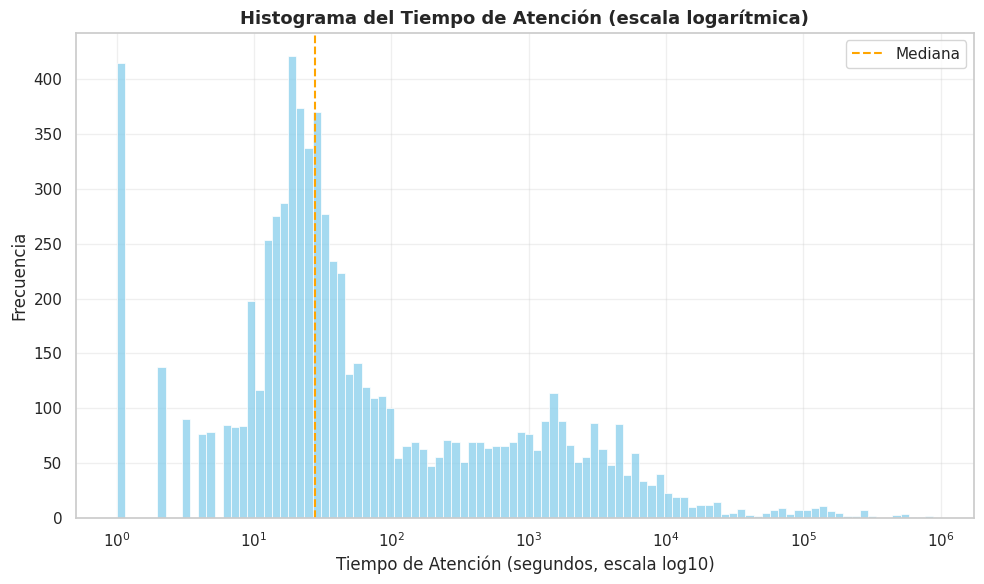

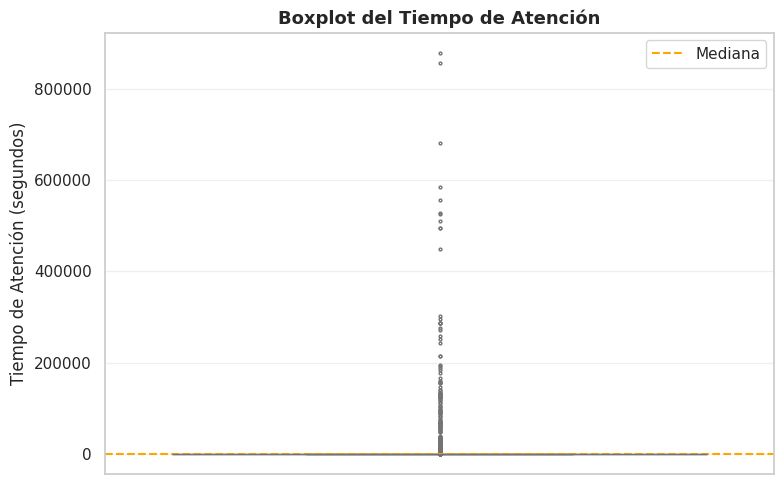

In [9]:
# =====================================================
# Análisis Exploratorio de Datos (EDA)
# Variable objetivo: TiempoAtencion
# =====================================================

# --- Asegurar que la columna TiempoAtencion exista ---
columna_objetivo = "TiempoAtencion"
if columna_objetivo not in df.columns:
    raise KeyError(f"La columna '{columna_objetivo}' no se encuentra en el dataset.")

# Eliminar valores nulos y negativos si existen ---
df = df[df[columna_objetivo].notnull() & (df[columna_objetivo] >= 0)]


# HISTOGRAMA DEL TIEMPO DE ATENCIÓN (escala logarítmica)
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x=columna_objetivo,
    bins=100,
    color='skyblue',
    log_scale=(True, False)
)
plt.axvline(df[columna_objetivo].median(), color='orange', linestyle='--', label='Mediana')
plt.title("Histograma del Tiempo de Atención (escala logarítmica)", fontsize=13, weight='bold')
plt.xlabel("Tiempo de Atención (segundos, escala log10)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Figura1_Histograma_TiempoAtencion.png", dpi=300)
plt.show()


#  BOXPLOT DEL TIEMPO DE ATENCIÓN
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    y=columna_objetivo,
    color='lightgreen',
    fliersize=2
)
plt.axhline(df[columna_objetivo].median(), color='orange', linestyle='--', label='Mediana')
plt.title("Boxplot del Tiempo de Atención", fontsize=13, weight='bold')
plt.ylabel("Tiempo de Atención (segundos)")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig("Figura2_Boxplot_TiempoAtencion.png", dpi=300)
plt.show()


## **5.3. Identificación de valores nulos, atípicos y correlaciones**

### **5.3.1. Hallazgo de Valores Nulos**

 [TABLA RESUMEN DE VALORES NULOS] 

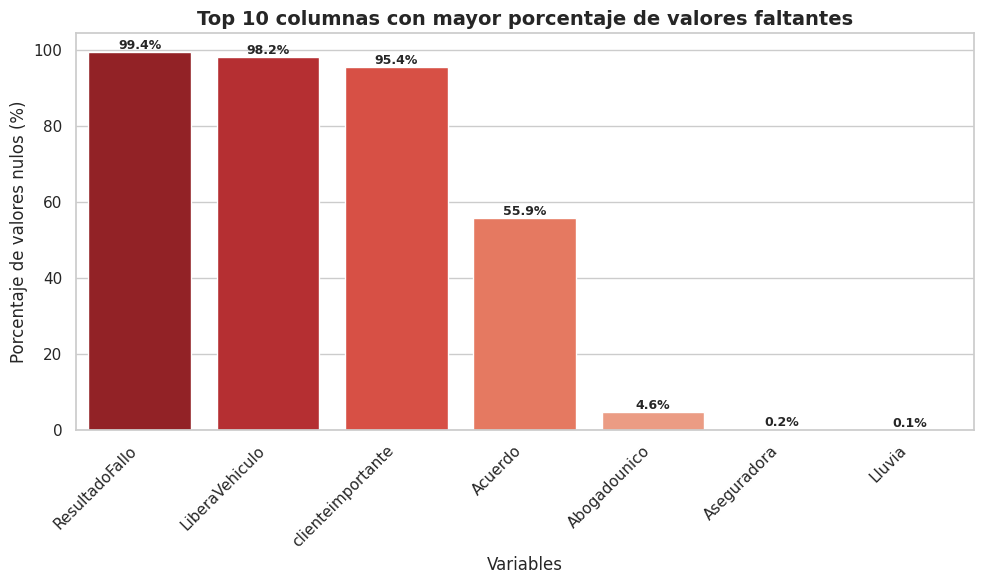

[REPORTE INTERPRETATIVO]

-------------------------------------------------

Total de columnas analizadas: 31

-Columnas con valores faltantes: 7

-Columnas sin valores faltantes: 24

Distribución según nivel de ausencia

Alta ausencia (> 50%): 4 columnas

Media ausencia (10%–50%): 0 columnas

Baja ausencia (≤ 10%): 3 columnas

RESUMEN EJECUTIVO:

        El análisis de valores faltantes evidenció que 7 variables presentan datos ausentes.
        Entre ellas, 4 superan el umbral del 50%, lo cual sugiere evaluar su eliminación
        o una imputación avanzada. 0 variables presentan una ausencia moderada que podría
        corregirse con imputaciones simples (media o moda), mientras que 3 columnas muestran
        una pérdida mínima de información. Este análisis permite definir estrategias de limpieza antes del 
modelado.

In [10]:
# ============================================================
#  ANÁLISIS DE VALORES NULOS
# ============================================================

def analizar_valores_nulos(df, umbral_alto=50, umbral_medio=10):
    """
    Analiza la cantidad y el porcentaje de valores nulos en un DataFrame.
    Genera tabla, gráfico y reporte interpretativo en español.
    """

    # Calcular valores nulos absolutos y porcentuales
    missing_abs = df.isnull().sum()
    missing_pct = (missing_abs / len(df)) * 100

    # Crear tabla consolidada y ordenada
    missing_table = pd.DataFrame({
        'Valores Nulos': missing_abs,
        'Porcentaje (%)': missing_pct
    })
    missing_table = missing_table[missing_table['Valores Nulos'] > 0].sort_values(
        by='Valores Nulos', ascending=False
    )

    # Mostrar tabla estilizada
    if not missing_table.empty:
        print("\n\n [bold] [TABLA RESUMEN DE VALORES NULOS] [/bold]\n\n")
        display(
            missing_table.style
            .format({'Porcentaje (%)': '{:.2f}%'})
            .background_gradient(cmap='Reds', subset=['Valores Nulos', 'Porcentaje (%)'])
            .set_caption("\n\n Resumen de Valores Faltantes por Variable \n\n")
        )

        # Gráfico de barras con las columnas con más valores nulos
        top_missing = missing_table.head(10)

        plt.figure(figsize=(10, 6))
        bars = sns.barplot(
            x=top_missing.index,
            y=top_missing['Porcentaje (%)'],
            palette="Reds_r"
        )

        # Añadir etiquetas de porcentaje sobre cada barra
        for container in bars.containers:
            bars.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9, weight='bold')

        plt.title("Top 10 columnas con mayor porcentaje de valores faltantes", fontsize=14, fontweight='bold')
        plt.xlabel("Variables", fontsize=12)
        plt.ylabel("Porcentaje de valores nulos (%)", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Clasificación de variables según nivel de ausencia
        cols_alta_ausencia = missing_table[missing_table['Porcentaje (%)'] > umbral_alto].index.tolist()
        cols_media_ausencia = missing_table[
            (missing_table['Porcentaje (%)'] > umbral_medio) &
            (missing_table['Porcentaje (%)'] <= umbral_alto)
        ].index.tolist()
        cols_baja_ausencia = missing_table[missing_table['Porcentaje (%)'] <= umbral_medio].index.tolist()

        # Reporte interpretativo automático
        print("\n\n [REPORTE INTERPRETATIVO]\n\n")
        print("-------------------------------------------------")
        print(f"Total de columnas analizadas: {len(df.columns)}")
        print(f"-Columnas con valores faltantes: {len(missing_table)}")
        print(f"-Columnas sin valores faltantes: {len(df.columns) - len(missing_table)}")

        print(f"\n\n Distribución según nivel de ausencia\n\n")
        print(f"Alta ausencia (> {umbral_alto}%): {len(cols_alta_ausencia)} columnas")
        print(f"Media ausencia ({umbral_medio}%–{umbral_alto}%): {len(cols_media_ausencia)} columnas")
        print(f"Baja ausencia (≤ {umbral_medio}%): {len(cols_baja_ausencia)} columnas")

        # Resumen ejecutivo para informe
        resumen = f"""

        RESUMEN EJECUTIVO:

        El análisis de valores faltantes evidenció que {len(missing_table)} variables presentan datos ausentes.
        Entre ellas, {len(cols_alta_ausencia)} superan el umbral del {umbral_alto}%, lo cual sugiere evaluar su eliminación
        o una imputación avanzada. {len(cols_media_ausencia)} variables presentan una ausencia moderada que podría
        corregirse con imputaciones simples (media o moda), mientras que {len(cols_baja_ausencia)} columnas muestran
        una pérdida mínima de información. Este análisis permite definir estrategias de limpieza antes del modelado.

        """
        print(resumen)

    else:
        print("\n No se encontraron valores faltantes en el dataset. El conjunto de datos está completamente completo.")

    return missing_table



#  EJECUCIÓN DEL ANÁLISIS
missing_table = analizar_valores_nulos(df)


### **5.3.2. Identificación Columnas a Eliminar o Imputar**




In [11]:
# =====================================================
# DECISIÓN AUTOMÁTICA: Eliminar o imputar columnas según porcentaje de nulos
# =====================================================

# Calcular valores nulos absolutos y porcentuales
missing_abs = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

# Crear tabla resumen
missing_table = pd.DataFrame({
    'Valores Nulos': missing_abs,
    'Porcentaje (%)': missing_pct
}).sort_values(by='Porcentaje (%)', ascending=False)

# Definición del umbral para eliminar o imputar columnas con nulos
umbral = 30.0  # 30%

# Separar columnas según criterio
cols_eliminar = missing_table[missing_table['Porcentaje (%)'] > umbral].index.tolist()
cols_imputar = missing_table[(missing_table['Porcentaje (%)'] > 0) & (missing_table['Porcentaje (%)'] <= umbral)].index.tolist()

print(f"\n\n Columnas a ELIMINAR (más del {umbral}% de nulos):")
print(cols_eliminar if cols_eliminar else "Ninguna")

print(f"\n\n Columnas a IMPUTAR (hasta {umbral}% de nulos):")
print(cols_imputar if cols_imputar else "Ninguna")


Columnas a ELIMINAR (más del 30.0% de nulos):

['ResultadoFallo', 'LiberaVehiculo', 'clienteimportante', 'Acuerdo']

Columnas a IMPUTAR (hasta 30.0% de nulos):

['Abogadounico', 'Aseguradora', 'Lluvia']

### **5.3.3. Hallazgo de Valores Únicos**

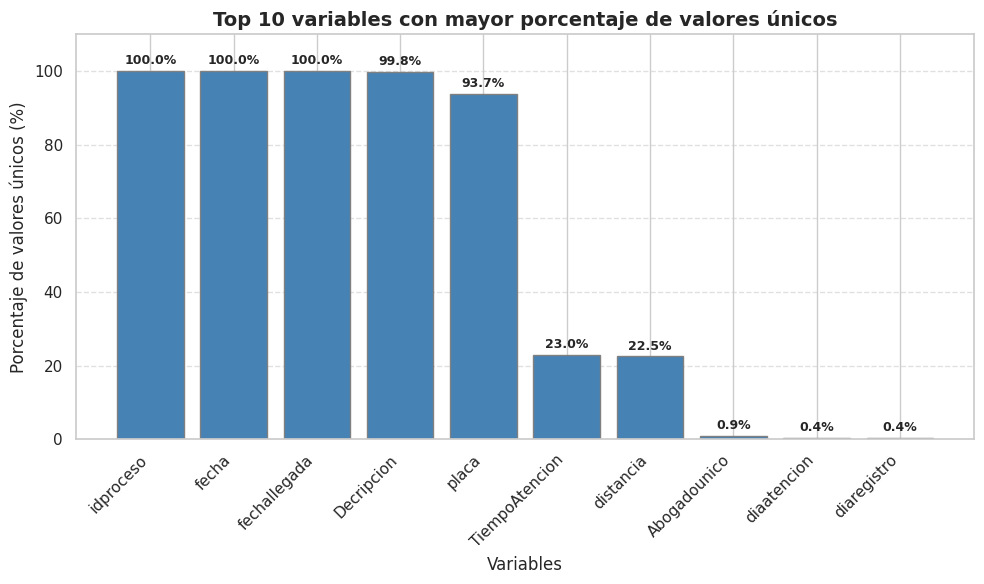

[REPORTE DE CARDINALIDAD]

------------------------------------------------

Total de variables analizadas: 31

-Columnas con alta cardinalidad (> 50 valores únicos): 8

-Columnas sin variación (1 solo valor): 0

-Columnas con cardinalidad adecuada: 23

Alta cardinalidad (8): ['idproceso', 'fecha', 'fechallegada', 'Decripcion', 'placa', 'TiempoAtencion', 'distancia',
'Abogadounico']

Cardinalidad adecuada (23): Ejemplo: ['annoregistro', 'mesregistro', 'diaregistro', 'horaregistro', 'diasemana']...

RESUMEN EJECUTIVO:

    El análisis de cardinalidad permitió identificar las variables con mayor y menor nivel de variabilidad.
    Se encontraron 8 columnas con alta cardinalidad, las cuales pueden generar ruido o sobreajuste en el modelo
    (por ejemplo: identificadores únicos o fechas exactas).
    Asimismo, 0 columnas no presentan cambios y podrían eliminarse por no aportar información relevante.
    Las 23 variables restantes poseen una variabilidad adecuada para el modelado predictivo.

In [12]:
# ============================================================
# ANÁLISIS AUTOMÁTICO DE VALORES ÚNICOS (CARDINALIDAD)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

def analizar_cardinalidad(df, umbral_alto=50, umbral_bajo=1):
    """
    Analiza la cardinalidad de cada variable en un DataFrame.
    Genera una tabla resumen, un gráfico del Top 10 y un reporte textual.
    """

    # 1️ Cálculo de valores únicos
    unique_counts = df.nunique().sort_values(ascending=False)
    unique_table = pd.DataFrame({
        'Valores Únicos': unique_counts,
        'Total Registros': len(df)
    })
    unique_table['Porcentaje Únicos (%)'] = (unique_table['Valores Únicos'] / len(df)) * 100
    unique_table['Tipo de Dato'] = df.dtypes

    # 2️ Clasificación según los umbrales definidos
    cols_sin_variacion = unique_table[unique_table['Valores Únicos'] <= umbral_bajo].index.tolist()
    cols_alta_card = unique_table[unique_table['Valores Únicos'] > umbral_alto].index.tolist()
    cols_normales = [col for col in df.columns if col not in cols_sin_variacion + cols_alta_card]

    # 3️ Mostrar tabla resumen estilizada
    display(
        unique_table.style.format({'Porcentaje Únicos (%)': '{:.2f}%'}).background_gradient(
            cmap='Blues', subset=['Valores Únicos', 'Porcentaje Únicos (%)']
        ).set_caption("=====[bold] TABLA RESUMEN DE VALORES ÚNICOS =====[/bold]")
    )

    # 4️ Gráfico del Top 10 de variables con más valores únicos
    top10_unique = unique_table.sort_values('Porcentaje Únicos (%)', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(top10_unique.index, top10_unique['Porcentaje Únicos (%)'],
                   color='steelblue', edgecolor='gray')

    # Etiquetas encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%",
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Personalización del gráfico
    plt.title("Top 10 variables con mayor porcentaje de valores únicos", fontsize=14, fontweight='bold')
    plt.xlabel("Variables", fontsize=12)
    plt.ylabel("Porcentaje de valores únicos (%)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 110)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 5️ Reporte textual interpretativo
    print("\n [REPORTE DE CARDINALIDAD]")
    print("------------------------------------------------")
    print(f"Total de variables analizadas: {len(df.columns)}")
    print(f"-Columnas con alta cardinalidad (> {umbral_alto} valores únicos): {len(cols_alta_card)}")
    print(f"-Columnas sin variación (1 solo valor): {len(cols_sin_variacion)}")
    print(f"-Columnas con cardinalidad adecuada: {len(cols_normales)}")

    # Mostrar nombres de las columnas clasificadas
    if cols_alta_card:
        print(f"\nAlta cardinalidad ({len(cols_alta_card)}): {cols_alta_card}")
    if cols_sin_variacion:
        print(f"\nSin variación ({len(cols_sin_variacion)}): {cols_sin_variacion}")
    if cols_normales:
        print(f"\nCardinalidad adecuada ({len(cols_normales)}): Ejemplo: {cols_normales[:5]}...")

    # 6️ Resumen ejecutivo para informe
    resumen = f"""
    RESUMEN EJECUTIVO:

    El análisis de cardinalidad permitió identificar las variables con mayor y menor nivel de variabilidad.
    Se encontraron {len(cols_alta_card)} columnas con alta cardinalidad, las cuales pueden generar ruido o sobreajuste en el modelo
    (por ejemplo: identificadores únicos o fechas exactas).
    Asimismo, {len(cols_sin_variacion)} columnas no presentan cambios y podrían eliminarse por no aportar información relevante.
    Las {len(cols_normales)} variables restantes poseen una variabilidad adecuada para el modelado predictivo.

    """
    print(resumen)

    return unique_table, cols_alta_card, cols_sin_variacion, cols_normales


# ============================================================
#  EJECUCIÓN DEL ANÁLISIS
# ============================================================
unique_table, cols_alta_card, cols_sin_variacion, cols_normales = analizar_cardinalidad(df)


### **5.3.4. Hallazgo Valores Extremos (Outliers)**

============================================================

INICIO DEL ANÁLISIS DE OUTLIERS (Método IQR)

============================================================

[TABLA RESUMEN DE OUTLIERS]

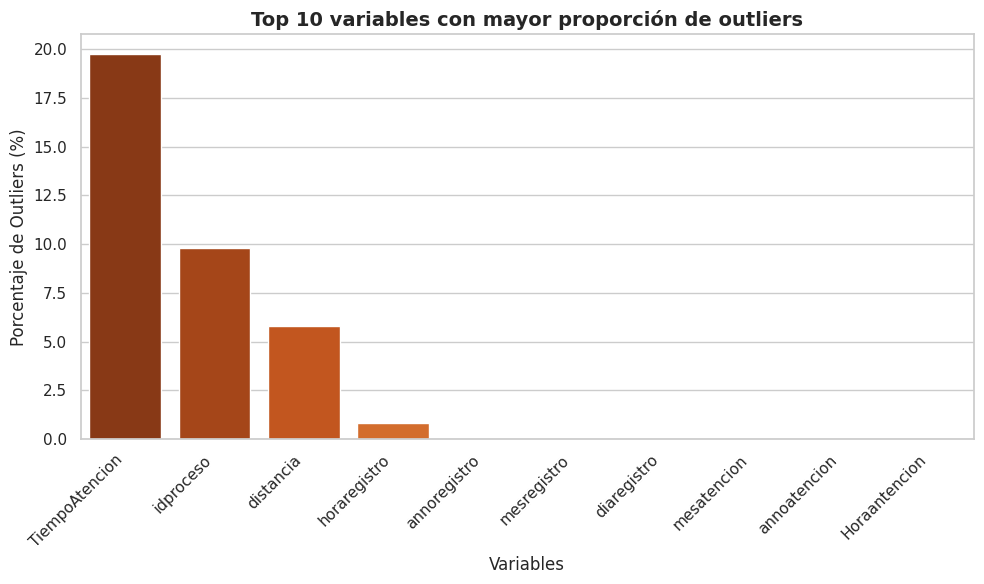

Ejemplo de distribución y outliers para: TiempoAtencion

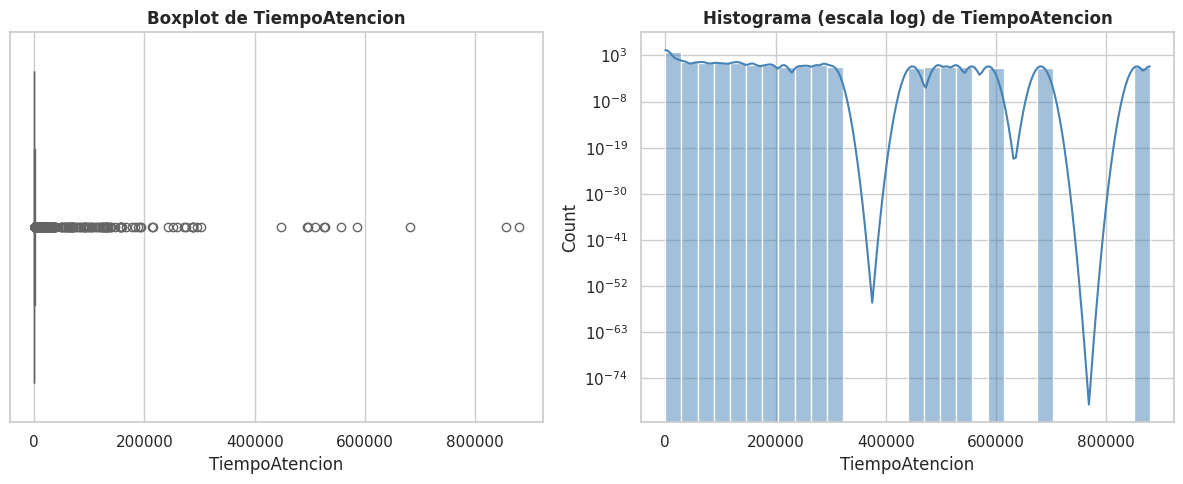

[REPORTE INTERPRETATIVO]

-------------------------------------------------

-Total de variables numéricas analizadas: 11

-Variables con presencia de outliers: 4

-Total de registros atípicos detectados (sumados): 2911

RESUMEN EJECUTIVO:

    El análisis mediante el método del rango intercuartílico (IQR) identificó valores atípicos
    en 4 variables numéricas del conjunto de datos. Estos outliers representan
    posibles errores de captura, valores extremos o casos excepcionales que podrían distorsionar
    los modelos predictivos. Se recomienda revisar las variables con mayor porcentaje de outliers
    (especialmente las que superan el 5–10%) y definir una estrategia adecuada: recorte, imputación,
    transformación logarítmica o modelado robusto.

In [13]:
# ============================================================
# DETECCIÓN DE OUTLIERS (VALORES ATÍPICOS)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detectar_outliers(df, factor=1.5, top_n=10):
    """
    Detecta y analiza valores atípicos en columnas numéricas usando el método IQR.
    Genera tabla, gráficos y reporte interpretativo.

    Parámetros:
    ------------
    df : DataFrame
        Dataset original.
    factor : float (default=1.5)
        Factor multiplicador del rango intercuartílico para definir outliers.
    top_n : int (default=10)
        Número de variables a graficar (las más afectadas por outliers).
    """

    print("============================================================")
    print(" INICIO DEL ANÁLISIS DE OUTLIERS (Método IQR)")
    print("============================================================")

    # 1️ Seleccionar solo columnas numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    if not num_cols:
        print(" No se encontraron columnas numéricas en el dataset.")
        return None

    # 2️ Calcular límites y cantidad de outliers
    outlier_stats = []

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - factor * IQR
        upper_limit = Q3 + factor * IQR

        # Conteo de outliers
        outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]
        num_outliers = outliers.count()

        outlier_stats.append({
            'Variable': col,
            'Outliers': num_outliers,
            'Porcentaje (%)': (num_outliers / len(df)) * 100,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Límite Inferior': lower_limit,
            'Límite Superior': upper_limit
        })

    # 3️ Crear tabla resumen
    outlier_table = pd.DataFrame(outlier_stats).sort_values(
        by='Porcentaje (%)', ascending=False
    )

    # Mostrar tabla con formato
    print("\n\n[TABLA RESUMEN DE OUTLIERS] \n\n")
    display(
        outlier_table.style
        .format({'Porcentaje (%)': '{:.2f}%'})
        .background_gradient(cmap='Oranges', subset=['Porcentaje (%)'])
        .set_caption("Resumen de Outliers por Variable Numérica")
    )

    # 4️ Visualización: Top N variables con más outliers
    top_outliers = outlier_table.head(top_n)

    if not top_outliers.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x='Variable',
            y='Porcentaje (%)',
            data=top_outliers,
            palette='Oranges_r'
        )
        plt.title(f"Top {top_n} variables con mayor proporción de outliers", fontsize=14, fontweight='bold')
        plt.xlabel("Variables")
        plt.ylabel("Porcentaje de Outliers (%)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\n No se detectaron outliers en las columnas numéricas.")

    # 5️ Ejemplo gráfico de distribución (Boxplot e Histograma)
    if not top_outliers.empty:
        var_ejemplo = top_outliers.iloc[0]['Variable']
        print(f"\n Ejemplo de distribución y outliers para: {var_ejemplo}")

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Boxplot
        sns.boxplot(x=df[var_ejemplo], ax=axes[0], color='coral')
        axes[0].set_title(f"Boxplot de {var_ejemplo}", fontsize=12, fontweight='bold')

        # Histograma (escala logarítmica)
        sns.histplot(df[var_ejemplo], bins=30, kde=True, color='steelblue', ax=axes[1])
        axes[1].set_title(f"Histograma (escala log) de {var_ejemplo}", fontsize=12, fontweight='bold')
        axes[1].set_yscale('log')

        plt.tight_layout()
        plt.show()

    # 6️ Reporte interpretativo
    total_outliers = outlier_table['Outliers'].sum()
    cols_con_outliers = (outlier_table['Outliers'] > 0).sum()

    print("\n [REPORTE INTERPRETATIVO]")
    print("-------------------------------------------------")
    print(f"-Total de variables numéricas analizadas: {len(num_cols)}")
    print(f"-Variables con presencia de outliers: {cols_con_outliers}")
    print(f"-Total de registros atípicos detectados (sumados): {total_outliers}")

    resumen = f"""

     RESUMEN EJECUTIVO:

    El análisis mediante el método del rango intercuartílico (IQR) identificó valores atípicos
    en {cols_con_outliers} variables numéricas del conjunto de datos. Estos outliers representan
    posibles errores de captura, valores extremos o casos excepcionales que podrían distorsionar
    los modelos predictivos. Se recomienda revisar las variables con mayor porcentaje de outliers
    (especialmente las que superan el 5–10%) y definir una estrategia adecuada: recorte, imputación,
    transformación logarítmica o modelado robusto.

    """
    print(resumen)

    return outlier_table


# EJECUCIÓN DEL ANÁLISIS
outlier_table = detectar_outliers(df)


### **5.3.5. Hallazgo de Correlaciones**

============================================================

ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS (PEARSON)

============================================================

MATRIZ DE CORRELACIÓN:

idproceso  annoregistro  mesregistro  diaregistro  \
idproceso            1.00          0.91        -0.05         0.01   
annoregistro         0.91          1.00        -0.17        -0.00   
mesregistro         -0.05         -0.17         1.00        -0.02   
diaregistro          0.01         -0.00        -0.02         1.00   
horaregistro        -0.00          0.00        -0.00        -0.00   
annoatencion         0.91          1.00        -0.17         0.00   
mesatencion         -0.04         -0.16         0.98        -0.02   
diaatencion          0.01         -0.00        -0.02         0.91   
Horaantencion        0.05          0.07        -0.02         0.01   
TiempoAtencion       0.01          0.01         0.02         0.02   
distancia            0.00          0.00        -0.01         0.01   

                horaregistro  annoatencion  mesatencion  diaatencion  \
idproceso              -0.00          0.91        -0.04         0.01   
annoregistro            0.00          1.00        -0.16        -0.00   
mesregistro            -0.00         -0.17         0.98        -0.02   
diaregistro            -0.00          0.00        -0.02         0.91   
horaregistro            1.00          0.00        -0.00         0.00   
annoatencion            0.00          1.00        -0.16        -0.00   
mesatencion            -0.00         -0.16         1.00        -0.02   
diaatencion             0.00         -0.00        -0.02         1.00   
Horaantencion           0.59          0.07        -0.02        -0.00   
TiempoAtencion          0.00          0.04        -0.03        -0.01   
distancia               0.01          0.00        -0.02         0.01   

                Horaantencion  TiempoAtencion  distancia  
idproceso                0.05            0.01       0.00  
annoregistro             0.07            0.01       0.00  
mesregistro             -0.02            0.02      -0.01  
diaregistro              0.01            0.02       0.01  
horaregistro             0.59            0.00       0.01  
annoatencion             0.07            0.04       0.00  
mesatencion             -0.02           -0.03      -0.02  
diaatencion             -0.00           -0.01       0.01  
Horaantencion            1.00            0.03       0.00  
TiempoAtencion           0.03            1.00       0.00  
distancia                0.00            0.00       1.00

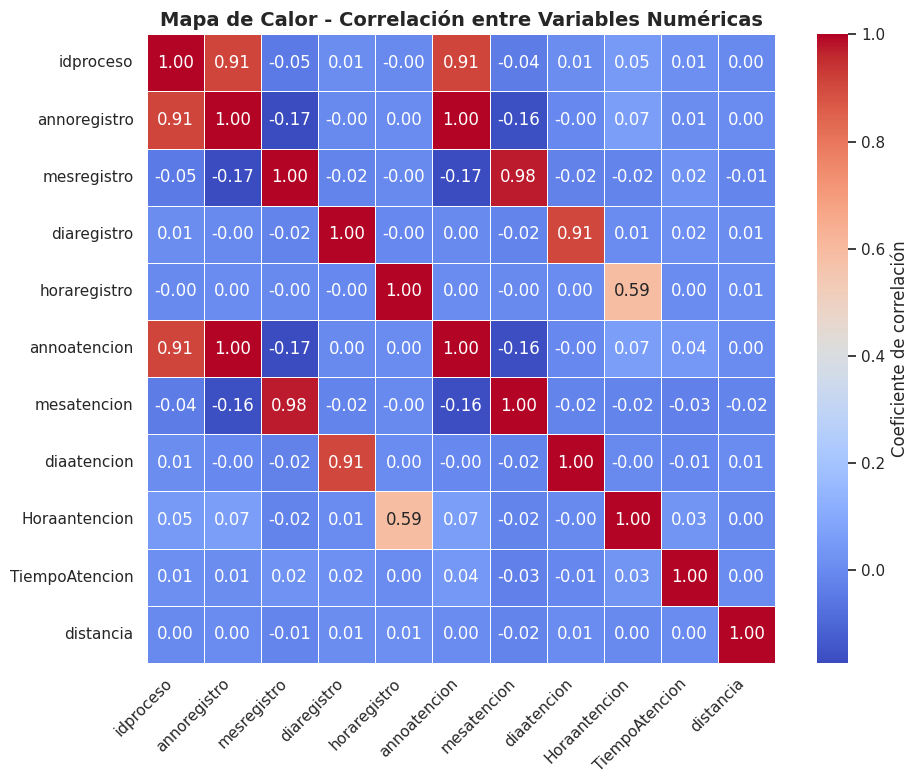

Top 5 pares de variables más correlacionadas:

Variable 1    Variable 2  Correlación  Abs_Corr
16  annoregistro  annoatencion     0.999179  0.999179
68   mesatencion   mesregistro     0.976631  0.976631
5      idproceso  annoatencion     0.912668  0.912668
11  annoregistro     idproceso     0.912496  0.912496
80   diaatencion   diaregistro     0.906643  0.906643

INTERPRETACIÓN:

    El mapa de calor muestra el grado de relación lineal entre las variables numéricas.
    Los valores cercanos a 1 o -1 indican una fuerte correlación (positiva o negativa, respectivamente),
    mientras que valores próximos a 0 sugieren independencia entre variables.

    Las correlaciones altas pueden señalar redundancia de información, multicolinealidad o dependencia
    entre variables, aspectos relevantes al momento de construir modelos predictivos.
    Se recomienda analizar especialmente las variables con correlación absoluta superior a 0.8.

In [14]:
# ============================================================
#  MAPA DE CALOR - CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
# ============================================================

def mapa_calor_correlacion(df, metodo='pearson', top_corr=5):
    """
    Genera un mapa de calor para visualizar la correlación entre variables numéricas.
    Además, identifica las variables más fuertemente correlacionadas.

    Parámetros:
    ------------
    df : DataFrame
        Dataset a analizar.
    metodo : str, default='pearson'
        Tipo de correlación ('pearson', 'spearman' o 'kendall').
    top_corr : int, default=5
        Número de pares de variables con mayor correlación mostradas en el resumen.
    """

    print("============================================================")
    print(f" ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS ({metodo.upper()})")
    print("============================================================")

    # Seleccionar columnas numéricas
    num_cols = df.select_dtypes(include=[np.number])

    if num_cols.empty:
        print(" No se encontraron variables numéricas en el dataset.")
        return None

    # Calcular la matriz de correlación
    corr_matrix = num_cols.corr(method=metodo)

    # Mostrar matriz de correlación (numérica)
    print("\n MATRIZ DE CORRELACIÓN:")
    display(corr_matrix.round(2))

    # 4️ Generar el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        linewidths=0.5,
        cbar_kws={'label': 'Coeficiente de correlación'},
        square=True
    )
    plt.title("Mapa de Calor - Correlación entre Variables Numéricas", fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Identificar las correlaciones más altas (sin duplicados ni autovalores)
    corr_pairs = (
        corr_matrix.unstack()
        .reset_index()
        .rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlación'})
    )
    corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
    corr_pairs['Abs_Corr'] = corr_pairs['Correlación'].abs()
    corr_pairs = corr_pairs.sort_values(by='Abs_Corr', ascending=False).drop_duplicates(subset=['Abs_Corr'])

    # Mostrar top de correlaciones más fuertes
    print(f"\n Top {top_corr} pares de variables más correlacionadas:")
    display(corr_pairs.head(top_corr))

    # Interpretación automática
    resumen = f"""

     INTERPRETACIÓN:

    El mapa de calor muestra el grado de relación lineal entre las variables numéricas.
    Los valores cercanos a 1 o -1 indican una fuerte correlación (positiva o negativa, respectivamente),
    mientras que valores próximos a 0 sugieren independencia entre variables.

    Las correlaciones altas pueden señalar redundancia de información, multicolinealidad o dependencia
    entre variables, aspectos relevantes al momento de construir modelos predictivos.
    Se recomienda analizar especialmente las variables con correlación absoluta superior a 0.8.

    """
    print(resumen)

    return corr_matrix, corr_pairs



#  EJECUCIÓN DEL ANÁLISIS
corr_matrix, corr_pairs = mapa_calor_correlacion(df)


### **5.3.6. Análisis Exploratorio Inicial EDA TiempoAtencion**

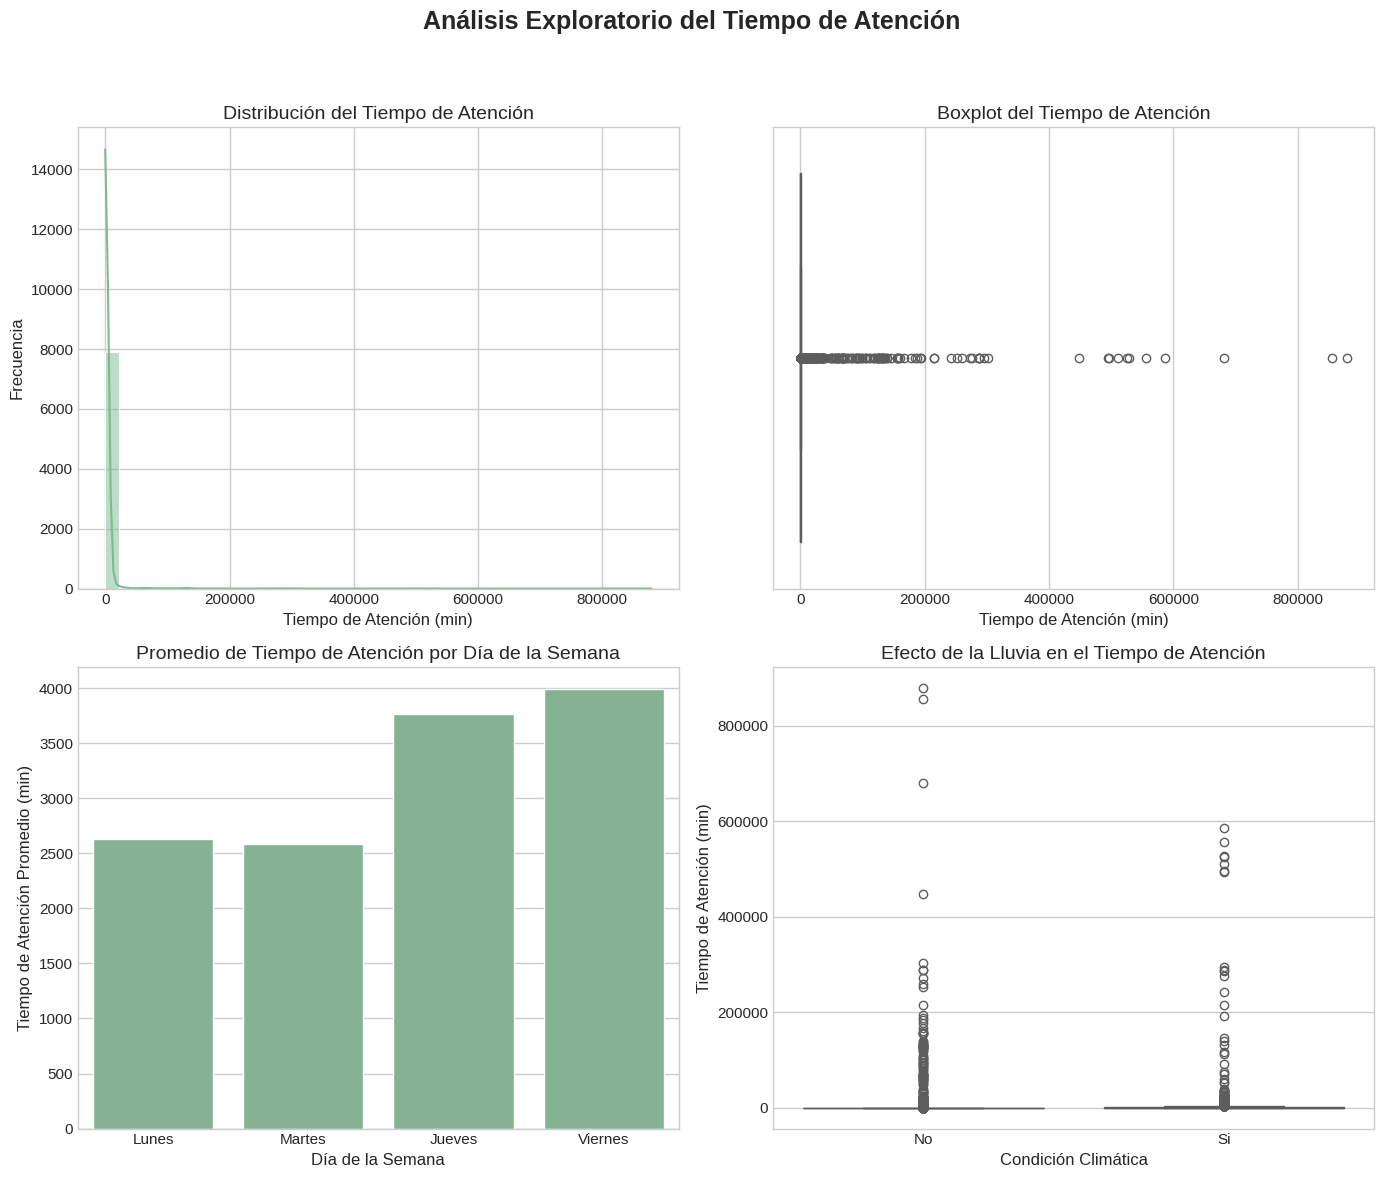

In [15]:
# ===========================================================
# ANÁLISIS EXPLORATORIO: DISTRIBUCIÓN DEL TIEMPO DE ATENCIÓN
# ===========================================================

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("crest")

# Crear figura (sin franja ni municipio)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Análisis Exploratorio del Tiempo de Atención', fontsize=18, fontweight='bold')


# Distribución general
if 'TiempoAtencion' in df.columns and df['TiempoAtencion'].notna().sum() > 0:
    sns.histplot(df['TiempoAtencion'].dropna(), bins=40, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Distribución del Tiempo de Atención', fontsize=14)
    axes[0, 0].set_xlabel('Tiempo de Atención (min)')
    axes[0, 0].set_ylabel('Frecuencia')
else:
    axes[0, 0].text(0.5, 0.5, 'Sin datos de Tiempo de Atención', ha='center', va='center')
    axes[0, 0].set_title('Distribución del Tiempo de Atención')

# Boxplot general
if 'TiempoAtencion' in df.columns and df['TiempoAtencion'].notna().sum() > 0:
    sns.boxplot(x=df['TiempoAtencion'].dropna(), ax=axes[0, 1])
    axes[0, 1].set_title('Boxplot del Tiempo de Atención', fontsize=14)
    axes[0, 1].set_xlabel('Tiempo de Atención (min)')
else:
    axes[0, 1].text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center')
    axes[0, 1].set_title('Boxplot del Tiempo de Atención')


# Promedio por día de la semana
if 'diasemana' in df.columns and df['diasemana'].notna().sum() > 0:
    dias_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    sns.barplot(
        x='diasemana', y='TiempoAtencion', data=df,
        estimator='mean', errorbar=None, ax=axes[1, 0],
        order=[d for d in dias_order if d in df['diasemana'].unique()]
    )
    axes[1, 0].set_title('Promedio de Tiempo de Atención por Día de la Semana', fontsize=14)
    axes[1, 0].set_xlabel('Día de la Semana')
    axes[1, 0].set_ylabel('Tiempo de Atención Promedio (min)')
else:
    axes[1, 0].text(0.5, 0.5, 'Columna "diasemana" no disponible', ha='center', va='center')
    axes[1, 0].set_title('Promedio de Tiempo de Atención por Día de la Semana')


# Efecto de la lluvia
if 'Lluvia' in df.columns and df['Lluvia'].notna().sum() > 0:
    sns.boxplot(x='Lluvia', y='TiempoAtencion', data=df, ax=axes[1, 1])
    axes[1, 1].set_title('Efecto de la Lluvia en el Tiempo de Atención', fontsize=14)
    axes[1, 1].set_xlabel('Condición Climática')
    axes[1, 1].set_ylabel('Tiempo de Atención (min)')
else:
    axes[1, 1].text(0.5, 0.5, 'Columna "Lluvia" no disponible', ha='center', va='center')
    axes[1, 1].set_title('Efecto de la Lluvia')


# Ajustar diseño general
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **5.3.7. Gráfico Boxplots Top 5 de Categorías con Valores atípicos (Outlier)**

Variables con mayor porcentaje de outliers: ['TiempoAtencion', 'idproceso', 'distancia', 'horaregistro', 
'annoregistro']

Variable  Outliers (%)
0  TiempoAtencion     19.776119
1       idproceso      9.825871
2       distancia      5.783582
3    horaregistro      0.820896
4    annoregistro      0.000000

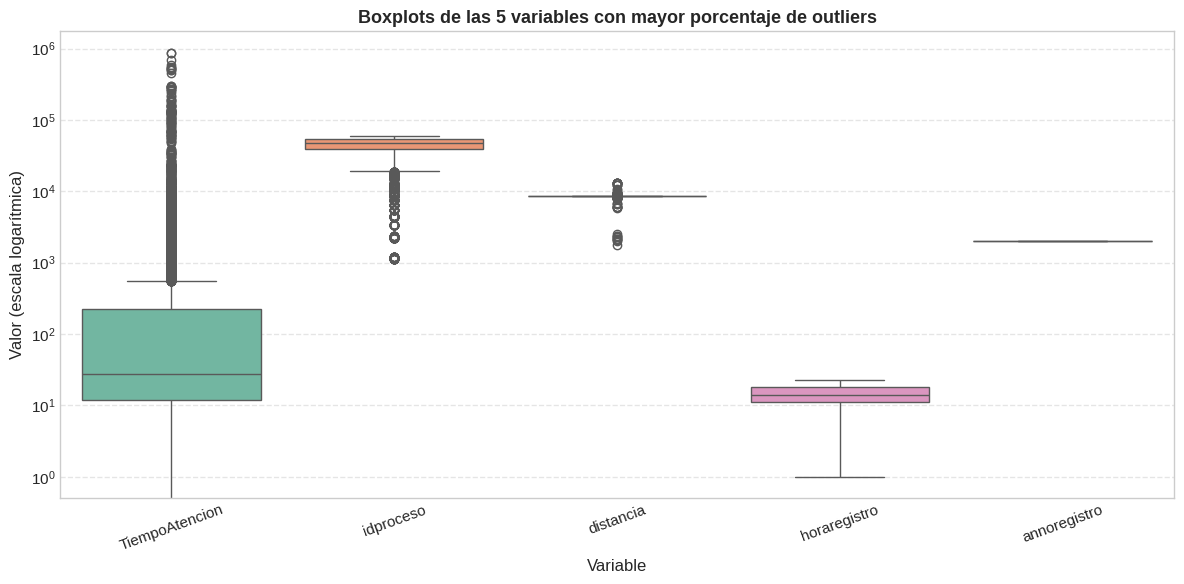

In [16]:
# ============================================================
#   Boxplots de las 5 variables con mayor % de outliers (mejorado)
# ============================================================

def boxplots_outliers_top5(df, top_n=5, escala='log'):
    """
    Muestra boxplots de las variables con mayor % de outliers,
    aplicando mejoras visuales y opcionalmente escala logarítmica.
    """

    # Seleccionar variables numéricas
    df_num = df.select_dtypes(include=[np.number])

    # Calcular porcentaje de outliers
    outlier_stats = []
    for col in df_num.columns:
        Q1 = df_num[col].quantile(0.25)
        Q3 = df_num[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df_num[col] < lower) | (df_num[col] > upper)).sum()
        outlier_stats.append({'Variable': col, 'Outliers (%)': (outliers / len(df)) * 100})

    # Crear DataFrame resumen
    outlier_df = pd.DataFrame(outlier_stats).sort_values('Outliers (%)', ascending=False).reset_index(drop=True)

    # Seleccionar top N variables
    top_vars = outlier_df.head(top_n)['Variable'].tolist()

    print(f"\n Variables con mayor porcentaje de outliers: {top_vars}")
    display(outlier_df.head(top_n))

    # Preparar datos para el boxplot
    df_melt = df_num[top_vars].melt(var_name='Variable', value_name='Valor')

    # Gráfico
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_melt, x='Variable', y='Valor', palette='Set2', showfliers=True, linewidth=1)

    if escala == 'log':
        plt.yscale('log')
        plt.ylabel("Valor (escala logarítmica)")
    else:
        plt.ylabel("Valor")

    plt.title(f"Boxplots de las {top_n} variables con mayor porcentaje de outliers", fontsize=13, fontweight='bold')
    plt.xticks(rotation=20, ha='center')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return outlier_df

# Ejecutar
outlier_df = boxplots_outliers_top5(df, top_n=5, escala='log')


# **6. FASE DE LIMPIEZA Y PREPROCESAMIENTO DE DATOS**



## **6.1. Inspección y Carga Inicial**

In [17]:
# Inspección inicial
print("\n\n Dimensiones del dataset:\n\n", df.shape)
print("\n Tipos de datos:")
print(df.dtypes)

print("\n\n Vista general: \n\n")
display(df.head(5))

# Resumen estadístico de variables numéricas
display(df.describe())


Dimensiones del dataset:


(8040, 31)

Tipos de datos:

idproceso              int64
placa                 object
fecha                 object
fechallegada          object
annoregistro           int64
mesregistro            int64
diaregistro            int64
horaregistro           int64
diasemana             object
annoatencion         float64
mesatencion          float64
diaatencion          float64
Horaantencion        float64
TiempoAtencion       float64
HoraPicoTarde         object
HoraPicoManana        object
InicioNoche           object
Amanecer              object
Municipio             object
Instancia             object
clienteimportante     object
Acuerdo               object
UsuarioRegistra       object
LiberaVehiculo        object
ResultadoFallo        object
Aseguradora           object
Abogadounico          object
RandomAbogado         object
Decripcion            object
Lluvia                object
distancia            float64
dtype: object

Vista general:

idproceso   placa                    fecha             fechallegada  \
0       1113  MOY664  2016-06-08 09:20:16.223  2016-06-08 09:20:16.223   
1       1114  TSZ179  2016-06-08 11:56:02.857  2016-06-08 11:56:02.857   
2       1115  STW598  2016-06-08 14:03:49.283  2016-06-08 14:03:49.283   
3       1116  TSE057  2016-06-08 18:29:41.737  2016-06-08 18:29:41.737   
4       1117  USX686  2016-06-08 19:46:18.653  2016-06-08 19:46:18.653   

   annoregistro  mesregistro  diaregistro  horaregistro  diasemana  \
0          2016            6            8             9  Miercoles   
1          2016            6            8            11  Miercoles   
2          2016            6            8            14  Miercoles   
3          2016            6            8            18  Miercoles   
4          2016            6            8            19  Miercoles   

   annoatencion  ...   Acuerdo           UsuarioRegistra  LiberaVehiculo  \
0        2016.0  ...       NaN  Juan Felipe Hoyos Botero             NaN   
1        2016.0  ...       NaN             Elkin Lezcano             NaN   
2        2016.0  ...       NaN             Elkin Lezcano             NaN   
3        2016.0  ...  Tránsito             Elkin Lezcano             NaN   
4        2016.0  ...       NaN             Elkin Lezcano             NaN   

   ResultadoFallo         Aseguradora              Abogadounico  \
0             NaN  Liberty Seguros SA  Juan Felipe Hoyos Botero   
1             NaN           Asegurado  Juan Felipe Hoyos Botero   
2             NaN           Asegurado  Juan Felipe Hoyos Botero   
3             NaN           Asegurado  Juan Felipe Hoyos Botero   
4             NaN           Asegurado  Juan Felipe Hoyos Botero   

              RandomAbogado  \
0      ELSA ROSA VEGA LOPEZ   
1  Juan Felipe Hoyos Botero   
2      ELSA ROSA VEGA LOPEZ   
3  Carolina Garcia Valencia   
4     SEBASTIAN LOPEZ GOMEZ   

                                          Decripcion Lluvia    distancia  
0  Liberty <br>PRELIMINAR <br>LESIONES <br>ASIG 0...     No  8482.615228  
1  Liberty <br>Lesiones <br>Andres GARCES <br>313...     No  8486.581225  
2  Liberty <br>SIMPLE <br>Jorge VELEZ <br>3192538...     No  8482.832639  
3  ATENDIO JHON JAIRO TABARES <br><br>Liberty <br...     No  8639.194598  
4  Liberty <br>SIMPLE <br>Calle 33 x av regional ...     No  8482.415758  

[5 rows x 31 columns]

idproceso  annoregistro  mesregistro  diaregistro  horaregistro  \
count   8040.000000   8040.000000  8040.000000  8040.000000   8040.000000   
mean   43280.316667   2020.012562     6.831965    15.869900     14.081219   
std    14081.958291      2.277538     3.531987     8.846973      4.715200   
min     1113.000000   2016.000000     1.000000     1.000000      0.000000   
25%    39555.750000   2018.000000     4.000000     8.000000     11.000000   
50%    47213.500000   2020.000000     7.000000    16.000000     14.000000   
75%    53293.250000   2022.000000    10.000000    24.000000     18.000000   
max    58951.000000   2025.000000    12.000000    31.000000     23.000000   

       annoatencion  mesatencion  diaatencion  Horaantencion  TiempoAtencion  \
count   8040.000000   8040.00000  8040.000000    8040.000000      8040.00000   
mean    2020.020647      6.80398    15.817040      14.583831      2976.15510   
std        2.276523      3.52199     8.863927       5.107983     27272.73376   
min     2016.000000      1.00000     1.000000       0.000000         0.00000   
25%     2018.000000      4.00000     8.000000      11.000000        12.00000   
50%     2020.000000      7.00000    16.000000      15.000000        28.00000   
75%     2022.000000     10.00000    23.000000      19.000000       225.25000   
max     2025.000000     12.00000    31.000000      23.000000    878976.00000   

          distancia  
count   8040.000000  
mean    8483.655926  
std      299.145664  
min     1759.926915  
25%     8482.212922  
50%     8483.506851  
75%     8486.799330  
max    13230.957749

## **6.2. Tratamiento de valores nulos**

ANÁLISIS INICIAL DE VALORES NULOS:

- Total de columnas: 31

- Columnas a eliminar (> 80% nulos): 3

- Columnas a imputar (≤ 80% nulos): 4

Columnas eliminadas: ['clienteimportante', 'LiberaVehiculo', 'ResultadoFallo']

Columnas imputadas:

Categóricas (moda): ['Acuerdo', 'Aseguradora', 'Abogadounico', 'Lluvia']

Verificación final:

Total de valores nulos restantes: 0

No quedan valores nulos después del tratamiento.

<Figure size 1000x600 with 0 Axes>

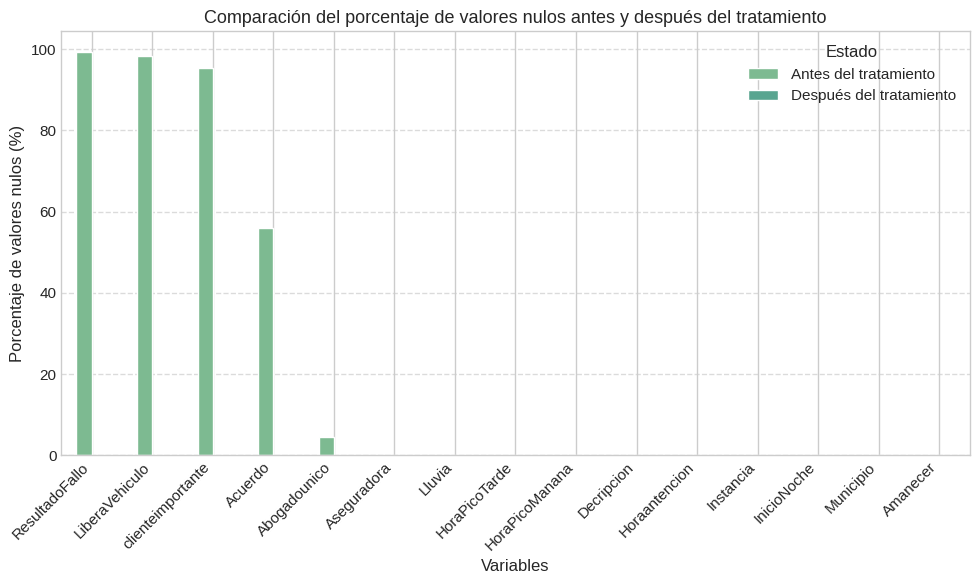

RESUMEN DEL TRATAMIENTO DE VALORES NULOS:

Aspecto  Resultado
0             Columnas eliminadas          3
1  Columnas imputadas con mediana          0
2     Columnas imputadas con moda          4
3         Valores nulos restantes          0

In [18]:
# ============================================================
#  TRATAMIENTO AUTOMÁTICO DE VALORES NULOS + GRÁFICA COMPARATIVA
# ============================================================

def tratamiento_valores_nulos(df, umbral_eliminacion=0.8, verbose=True):
    """
    Realiza el tratamiento automático de valores nulos:
    1️ Elimina columnas con más del umbral definido de nulos.
    2️ Imputa valores faltantes con la mediana (numéricas) o la moda (categóricas).
    3️ Verifica y reporta los resultados del proceso.
    4️ Muestra una gráfica comparativa del porcentaje de nulos antes y después.

    Parámetros:
    - df: DataFrame original
    - umbral_eliminacion: porcentaje máximo permitido de nulos (0.8 = 80%)
    - verbose: si True, imprime reportes detallados

    Retorna:
    - df_limpio: DataFrame tratado
    - reporte: diccionario con información del proceso
    """

    # Copiar para no modificar el original
    df_limpio = df.copy()

    # =========================
    # 1️ Cálculo de nulos iniciales
    # =========================
    nulos_inicial = df_limpio.isnull().mean() * 100

    # Identificación de columnas según umbrales
    cols_eliminar = nulos_inicial[nulos_inicial > umbral_eliminacion * 100].index.tolist()
    cols_imputar = nulos_inicial[(nulos_inicial > 0) & (nulos_inicial <= umbral_eliminacion * 100)].index.tolist()

    if verbose:
        print("\n ANÁLISIS INICIAL DE VALORES NULOS:")
        print(f" - Total de columnas: {df.shape[1]}")
        print(f" - Columnas a eliminar (> {umbral_eliminacion*100:.0f}% nulos): {len(cols_eliminar)}")
        print(f" - Columnas a imputar (≤ {umbral_eliminacion*100:.0f}% nulos): {len(cols_imputar)}")

    # =========================
    # 2️ Eliminación de columnas con demasiados nulos
    # =========================
    if cols_eliminar:
        df_limpio.drop(columns=cols_eliminar, inplace=True)
        if verbose:
            print(f"\n Columnas eliminadas: {cols_eliminar}")
    else:
        if verbose:
            print("\n No se eliminaron columnas (ninguna supera el umbral de nulos).")

    # =========================
    # 3️ Imputación de valores faltantes
    # =========================
    imputadas_media = []
    imputadas_moda = []

    for col in cols_imputar:
        if col in df_limpio.columns:  # Evitar errores si fue eliminada
            if pd.api.types.is_numeric_dtype(df_limpio[col]):
                df_limpio[col].fillna(df_limpio[col].median(), inplace=True)
                imputadas_media.append(col)
            elif pd.api.types.is_object_dtype(df_limpio[col]) or pd.api.types.is_categorical_dtype(df_limpio[col]):
                moda_val = df_limpio[col].mode()
                if not moda_val.empty:
                    df_limpio[col].fillna(moda_val[0], inplace=True)
                    imputadas_moda.append(col)

    if verbose:
        print("\n Columnas imputadas:")
        if imputadas_media:
            print(f"    Numéricas (mediana): {imputadas_media}")
        if imputadas_moda:
            print(f"    Categóricas (moda): {imputadas_moda}")
        if not imputadas_media and not imputadas_moda:
            print("   Ninguna columna fue imputada.")

    # =========================
    # 4️ Verificación final
    # =========================
    nulos_final = df_limpio.isnull().mean() * 100
    nulos_restantes = df_limpio.isnull().sum().sum()

    if verbose:
        print("\n Verificación final:")
        print(f"   Total de valores nulos restantes: {nulos_restantes}")
        if nulos_restantes == 0:
            print("    No quedan valores nulos después del tratamiento.")
        else:
            print("    Aún existen valores nulos en algunas columnas.")
            display(df_limpio.isnull().sum()[df_limpio.isnull().sum() > 0])

    # =========================
    # 5️ Gráfica comparativa antes y después
    # =========================
    comparacion = pd.DataFrame({
        'Antes del tratamiento': nulos_inicial,
        'Después del tratamiento': nulos_final
    }).fillna(0)

    comparacion_top = comparacion.sort_values('Antes del tratamiento', ascending=False).head(15)

    plt.figure(figsize=(10, 6))
    comparacion_top.plot(kind='bar', figsize=(10,6))
    plt.title('Comparación del porcentaje de valores nulos antes y después del tratamiento', fontsize=13)
    plt.xlabel('Variables')
    plt.ylabel('Porcentaje de valores nulos (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Estado', loc='upper right')
    plt.tight_layout()
    plt.show()

    # =========================
    # 6️ Reporte resumen
    # =========================
    reporte = {
        "columnas_eliminadas": cols_eliminar,
        "columnas_imputadas_media": imputadas_media,
        "columnas_imputadas_moda": imputadas_moda,
        "total_nulos_restantes": nulos_restantes
    }

    return df_limpio, reporte


# ============================================================
#  EJECUCIÓN DEL PROCESO
# ============================================================

df_limpio, reporte_nulos = tratamiento_valores_nulos(df, umbral_eliminacion=0.8)

# Mostrar resumen final del proceso
print("\n RESUMEN DEL TRATAMIENTO DE VALORES NULOS:")
print(pd.DataFrame({
    "Aspecto": [
        "Columnas eliminadas",
        "Columnas imputadas con mediana",
        "Columnas imputadas con moda",
        "Valores nulos restantes"
    ],
    "Resultado": [
        len(reporte_nulos['columnas_eliminadas']),
        len(reporte_nulos['columnas_imputadas_media']),
        len(reporte_nulos['columnas_imputadas_moda']),
        reporte_nulos['total_nulos_restantes']
    ]
}))



## **6.3. Identificación y tratamiento de Valores únicos (Cardinalidad)**

===== TABLA RESUMEN DE VALORES ÚNICOS =====

INTERPRETACIÓN DE RESULTADOS:

Variables con cardinalidad adecuada (23):

[
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'horaregistro',
    'diasemana',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'Horaantencion',
    'HoraPicoTarde',
    'HoraPicoManana',
    'InicioNoche',
    'Amanecer',
    'Municipio',
    'Instancia',
    'clienteimportante',
    'Acuerdo',
    'UsuarioRegistra',
    'LiberaVehiculo',
    'ResultadoFallo',
    'Aseguradora',
    'RandomAbogado',
    'Lluvia'
]

Variables con ALTA cardinalidad (> 50 valores únicos):

['idproceso', 'fecha', 'fechallegada', 'Decripcion', 'placa', 'TiempoAtencion', 'distancia', 'Abogadounico']

Estas variables pueden requerir codificación especial (Target Encoding o Embeddings).

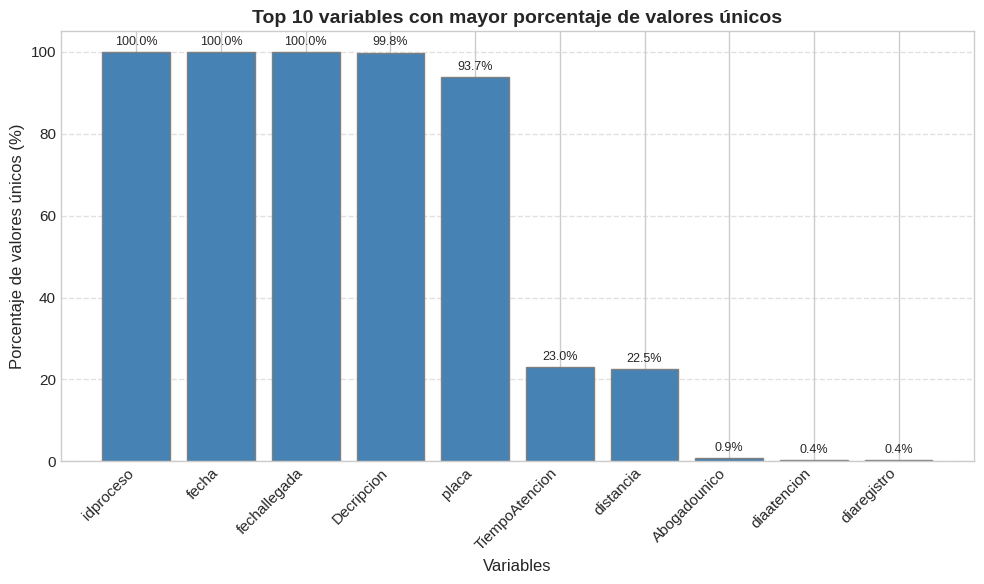

In [19]:
# =====================================================
# ANÁLISIS Y TRATAMIENTO DE VALORES ÚNICOS (CARDINALIDAD)
# =====================================================
# Calcular cantidad y porcentaje de valores únicos
valores_unicos = df.nunique().sort_values(ascending=False)
tabla_cardinalidad = pd.DataFrame({
    'Variable': valores_unicos.index,
    'Valores Únicos': valores_unicos.values,
    'Porcentaje Únicos (%)': (valores_unicos.values / len(df) * 100).round(2),
    'Tipo de Dato': df.dtypes.values
})

# Mostrar tabla con estilo visual
print("\n===== TABLA RESUMEN DE VALORES ÚNICOS =====")
display(
    tabla_cardinalidad.style
        .format({'Porcentaje Únicos (%)': '{:.2f}%'})
        .background_gradient(cmap='Blues', subset=['Valores Únicos', 'Porcentaje Únicos (%)'])
)

# =====================================================
# CLASIFICACIÓN DE VARIABLES SEGÚN CARDINALIDAD
# =====================================================

# Umbrales configurables
umbral_baja = 1     # sin variación
umbral_alta = 50    # más de 50 categorías se considera alta cardinalidad (ajustable)

# Identificar categorías
sin_variacion = tabla_cardinalidad[tabla_cardinalidad['Valores Únicos'] <= umbral_baja]['Variable'].tolist()
alta_card = tabla_cardinalidad[tabla_cardinalidad['Valores Únicos'] > umbral_alta]['Variable'].tolist()
cardinalidad_media = [col for col in df.columns if col not in sin_variacion + alta_card]

# =====================================================
# INTERPRETACIÓN AUTOMÁTICA
# =====================================================
print("\n INTERPRETACIÓN DE RESULTADOS:")

print(f"\n Variables con cardinalidad adecuada ({len(cardinalidad_media)}):")
print(cardinalidad_media if cardinalidad_media else "Ninguna")

if alta_card:
    print(f"\n Variables con ALTA cardinalidad (> {umbral_alta} valores únicos):")
    print(alta_card)
    print(" Estas variables pueden requerir codificación especial (Target Encoding o Embeddings).")

if sin_variacion:
    print(f"\n Variables SIN VARIACIÓN (1 solo valor): {len(sin_variacion)}")
    print(sin_variacion)
    print(" Serán eliminadas, ya que no aportan información al modelo.")

# =====================================================
# ELIMINAR VARIABLES SIN VARIACIÓN
# =====================================================
if sin_variacion:
    df = df.drop(columns=sin_variacion)
    print(f"\n {len(sin_variacion)} variables sin variación eliminadas correctamente.")

# =====================================================
# VISUALIZACIÓN DEL TOP 10 DE VARIABLES CON MÁS VALORES ÚNICOS
# =====================================================
top10 = tabla_cardinalidad.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top10['Variable'], top10['Porcentaje Únicos (%)'], color='steelblue', edgecolor='gray')

# Añadir etiquetas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', va='bottom', fontsize=9)

# Personalización del gráfico
plt.title("Top 10 variables con mayor porcentaje de valores únicos", fontsize=14, fontweight='bold')
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Porcentaje de valores únicos (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **6.3.1. Tratamiento de Variables Según Cardinalidad**

In [20]:
# =====================================================
# TRATAMIENTO DE VARIABLES SEGÚN CARDINALIDAD
# =====================================================

# 1. Eliminar variables sin variación
if sin_variacion:
    df.drop(columns=sin_variacion, inplace=True)
    print(f" {len(sin_variacion)} variables sin variación eliminadas.")

# 2. Eliminar o marcar variables de alta cardinalidad
if alta_card:
    # Identificar posibles identificadores (ID, código, placa, etc.)
    posibles_ids = [col for col in alta_card if any(x in col.lower() for x in ['id', 'codigo', 'placa', 'nro'])]

    df.drop(columns=posibles_ids, inplace=True)
    print(f" Se eliminaron {len(posibles_ids)} variables identificadoras de alta cardinalidad: {posibles_ids}")

    # Variables restantes de alta cardinalidad (no identificadores) se pueden codificar con técnicas avanzadas
    restantes = [col for col in alta_card if col not in posibles_ids]
    if restantes:
        print(f" Variables con alta cardinalidad que podrían codificarse (Target/Hash Encoding): {restantes}")
else:
    print(" No se detectaron variables con alta cardinalidad.")


Se eliminaron 2 variables identificadoras de alta cardinalidad: ['idproceso', 'placa']

Variables con alta cardinalidad que podrían codificarse (Target/Hash Encoding): ['fecha', 'fechallegada', 
'Decripcion', 'TiempoAtencion', 'distancia', 'Abogadounico']

In [21]:
# =====================================================
# TRATAMIENTO DE VARIABLES DE ALTA CARDINALIDAD
# =====================================================

# 1️ FECHAS: convertir en componentes temporales
if {'fecha', 'fechallegada'}.issubset(df.columns):
    for col in ['fecha', 'fechallegada']:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[f'{col}_anio'] = df[col].dt.year
        df[f'{col}_mes'] = df[col].dt.month
        df[f'{col}_dia'] = df[col].dt.day
        df[f'{col}_hora'] = df[col].dt.hour
    df.drop(columns=['fecha', 'fechallegada'], inplace=True)
    print(" Variables 'fecha' y 'fechallegada' transformadas en componentes temporales y eliminadas.")

# 2️ TEXTO LIBRE: descripción
if 'Decripcion' in df.columns:
    print(" 'Decripcion' es texto libre. Puedes aplicar vectorización (TF-IDF) o eliminarla.")
    # Ejemplo: eliminar si no se va a usar NLP
    df.drop(columns=['Decripcion'], inplace=True)
    print(" Variable 'Decripcion' eliminada (texto libre).")

# 3️ VARIABLE OBJETIVO Y CONTINUAS
# 'TiempoAtencion' y 'distancia' se mantienen sin cambios
print(" Variables 'TiempoAtencion' y 'distancia' conservadas (numéricas continuas).")

# 4️ VARIABLES CATEGÓRICAS CON MUCHAS CATEGORÍAS
if 'Abogadounico' in df.columns:
    # Ejemplo de codificación por frecuencia
    frecuencia_abogado = df['Abogadounico'].value_counts(normalize=True)
    df['Abogadounico_freq'] = df['Abogadounico'].map(frecuencia_abogado)
    df.drop(columns=['Abogadounico'], inplace=True)
    print(" Variable 'Abogadounico' transformada con codificación por frecuencia.")


Variables 'fecha' y 'fechallegada' transformadas en componentes temporales y eliminadas.

'Decripcion' es texto libre. Puedes aplicar vectorización (TF-IDF) o eliminarla.

Variable 'Decripcion' eliminada (texto libre).

Variables 'TiempoAtencion' y 'distancia' conservadas (numéricas continuas).

Variable 'Abogadounico' transformada con codificación por frecuencia.

## **6.4. Detección y Tratamiento de Outliers (IQR)**

### **6.4.1. Identificación de Outliers (Método IQR)**

In [22]:
# ===========================================================
# IDENTIFICACIÓN DE OUTLIERS (Método IQR)
# ===========================================================

# 1️ Seleccionamos solo las variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\n\n [bold] Variables numéricas analizadas: [/bold] \n", list(numeric_cols))

# 2️ Creamos una tabla para registrar resultados
resumen_outliers = []

# 3️ Recorremos cada variable numérica
for col in numeric_cols:
    # Calcular los cuartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contar outliers
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
    n_outliers = outliers.count()
    porcentaje = (n_outliers / len(df)) * 100

    outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()
    print(f"{col}: {outliers} outliers detectados")

    # Agregar resultados
    resumen_outliers.append({
        'Variable': col,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Límite inferior': round(limite_inferior, 2),
        'Límite superior': round(limite_superior, 2),
        'Cantidad outliers': n_outliers,
        '% del total': round(porcentaje, 2)
    })

# 4️ Crear DataFrame con el resumen
tabla_outliers = pd.DataFrame(resumen_outliers)

# 5️ Ordenar de mayor a menor cantidad de outliers
tabla_outliers.sort_values(by='% del total', ascending=False, inplace=True)

# 6️ Mostrar tabla formateada
print("\n\n [bold] ===== DETECCIÓN DE OUTLIERS (Método IQR) =====\n\n [/bold] ")
display(
    tabla_outliers.style.background_gradient(
        cmap='Reds', subset=['% del total']
    ).hide(axis='index')
)



 Variables numéricas analizadas:  

[
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'horaregistro',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'Horaantencion',
    'TiempoAtencion',
    'distancia',
    'Abogadounico_freq'
]

annoregistro: 0 outliers detectados

mesregistro: 0 outliers detectados

diaregistro: 0 outliers detectados

horaregistro: 66 outliers detectados

annoatencion: 0 outliers detectados

mesatencion: 0 outliers detectados

diaatencion: 0 outliers detectados

Horaantencion: 0 outliers detectados

TiempoAtencion: 1590 outliers detectados

distancia: 465 outliers detectados

Abogadounico_freq: 1534 outliers detectados

 ===== DETECCIÓN DE OUTLIERS (Método IQR) =====

 

### **6.4.2. Análisis y Tratamiento Oultiers en TiempoAtencion**

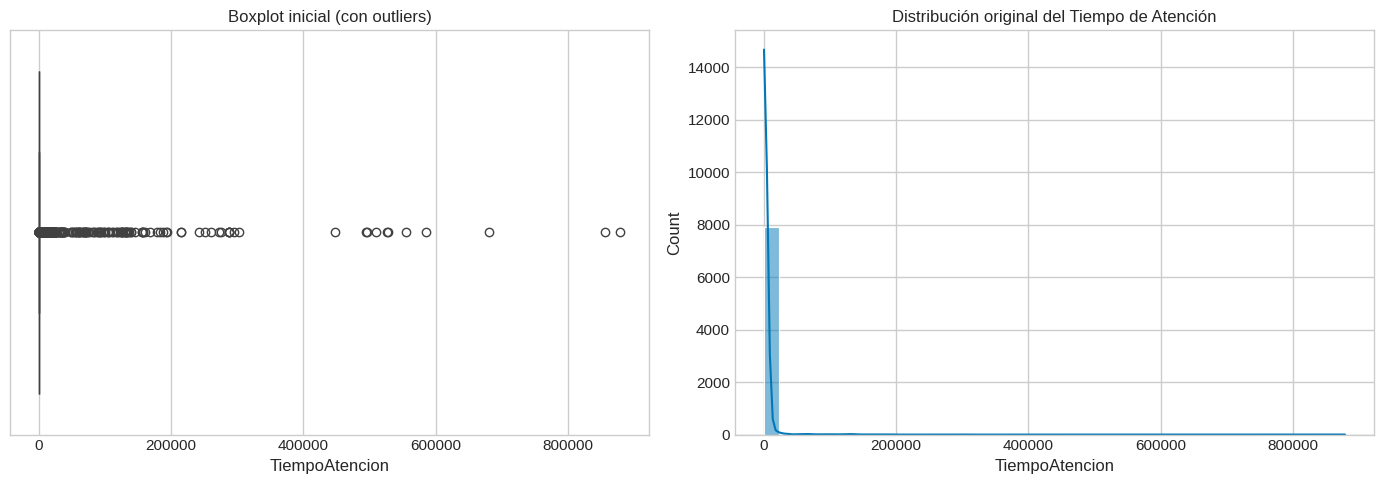

Registros originales: 8040

Registros después de filtrar outliers: 6450 (19.78% eliminados)

\ ===== COMPARATIVO ESTADÍSTICO =====[]/bold

Estadístico      Antes  Después (Winsorizado)
0           Media    2976.16                  52.02
1         Mediana      28.00                  21.00
2  Desv. Estándar   27272.73                  93.33
3          Mínimo       0.00                   0.00
4          Máximo  878976.00                 545.00

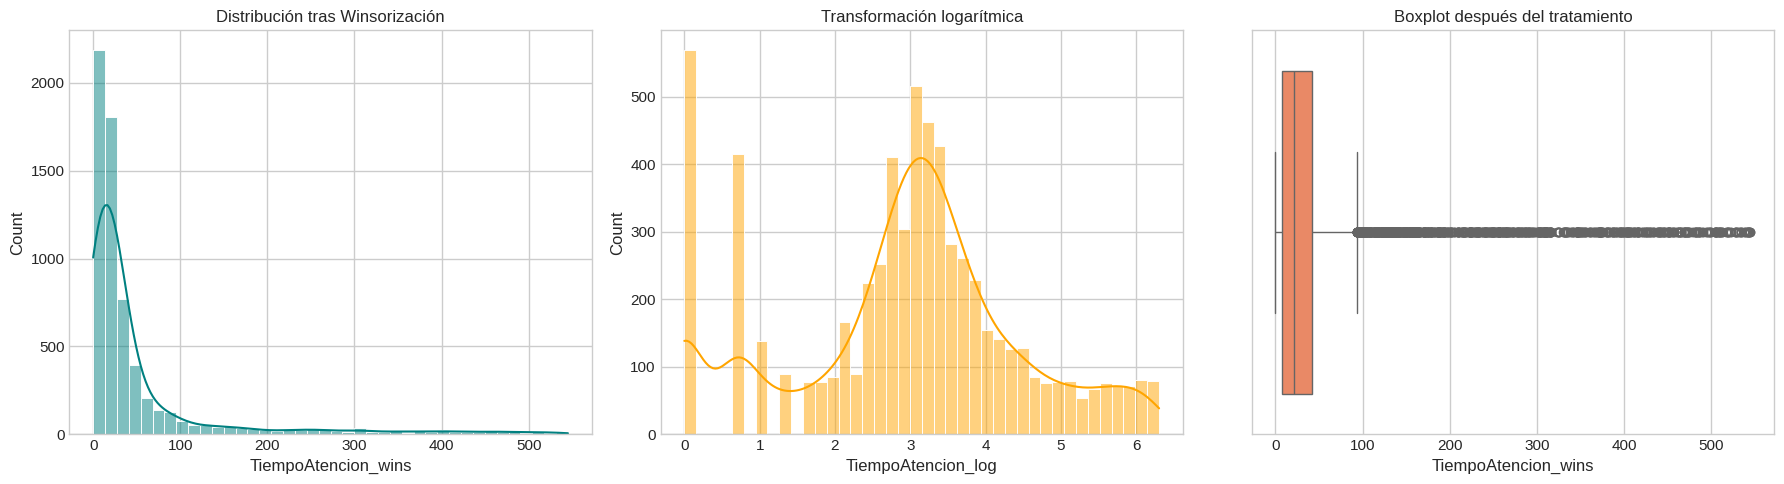

Tratamiento de outliers completado:

- Rango Intercuartílico (IQR): 213.25

- Límite inferior: -307.88

- Límite superior: 545.12

- Variable log-transformada: 'TiempoAtencion_log'

- Variable escalada: 'TiempoAtencion_scaled'

- Registros finales: 6450

In [23]:
# ================================================================
#  ANÁLISIS Y TRATAMIENTO DE OUTLIERS EN 'TiempoAtencion'
# ================================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# ------------------------------------------------
# 1 Validación de la variable
# ------------------------------------------------
if 'TiempoAtencion' not in df.columns:
    raise KeyError("La columna 'TiempoAtencion' no se encuentra en el DataFrame.")

# Remover nulos si los hay
df = df.copy()
df = df[df['TiempoAtencion'].notna()]

# ------------------------------------------------
# 2️ Cálculo del IQR y límites
# ------------------------------------------------
Q1 = df['TiempoAtencion'].quantile(0.25)
Q3 = df['TiempoAtencion'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# ------------------------------------------------
# 3️ Visualización inicial
# ------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x=df['TiempoAtencion'], ax=ax[0], color='#00b4d8')
ax[0].set_title("Boxplot inicial (con outliers)")

sns.histplot(df['TiempoAtencion'], bins=40, kde=True, ax=ax[1], color='#0077b6')
ax[1].set_title("Distribución original del Tiempo de Atención")
plt.tight_layout()
plt.show()

# ------------------------------------------------
# 4️ Filtrado de valores extremos
# ------------------------------------------------
# Eliminamos valores exageradamente altos (> 1000 min)
df_filtrado = df[df['TiempoAtencion'] <= 1000].copy()

# Aplicamos límites basados en IQR
df_filtrado = df_filtrado[
    (df_filtrado['TiempoAtencion'] >= limite_inferior) &
    (df_filtrado['TiempoAtencion'] <= limite_superior)
].copy()

print(f"Registros originales: {len(df)}")
print(f"Registros después de filtrar outliers: {len(df_filtrado)} "
      f"({(len(df) - len(df_filtrado)) / len(df) * 100:.2f}% eliminados)")

# ------------------------------------------------
# 5️ Winsorización (recorte de valores extremos)
# ------------------------------------------------
df_filtrado['TiempoAtencion_wins'] = np.clip(
    df_filtrado['TiempoAtencion'], limite_inferior, limite_superior
)

# ------------------------------------------------
# 6️ Transformaciones
# ------------------------------------------------
# a) Transformación logarítmica
df_filtrado['TiempoAtencion_log'] = np.log1p(df_filtrado['TiempoAtencion_wins'])

# b) Escalado robusto
scaler = RobustScaler()
df_filtrado['TiempoAtencion_scaled'] = scaler.fit_transform(
    df_filtrado[['TiempoAtencion_wins']]
)

# ------------------------------------------------
# 7️ Comparación estadística antes y después
# ------------------------------------------------
resumen = pd.DataFrame({
    'Estadístico': ['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo'],
    'Antes': [
        df['TiempoAtencion'].mean(),
        df['TiempoAtencion'].median(),
        df['TiempoAtencion'].std(),
        df['TiempoAtencion'].min(),
        df['TiempoAtencion'].max()
    ],
    'Después (Winsorizado)': [
        df_filtrado['TiempoAtencion_wins'].mean(),
        df_filtrado['TiempoAtencion_wins'].median(),
        df_filtrado['TiempoAtencion_wins'].std(),
        df_filtrado['TiempoAtencion_wins'].min(),
        df_filtrado['TiempoAtencion_wins'].max()
    ]
})

print("\n\ [bold]===== COMPARATIVO ESTADÍSTICO =====[]/bold")
display(resumen.round(2))

# ------------------------------------------------
# 8️ Visualización post-tratamiento
# ------------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_filtrado['TiempoAtencion_wins'], bins=40, kde=True, ax=ax[0], color='teal')
ax[0].set_title("Distribución tras Winsorización")

sns.histplot(df_filtrado['TiempoAtencion_log'], bins=40, kde=True, ax=ax[1], color='orange')
ax[1].set_title("Transformación logarítmica")

sns.boxplot(x=df_filtrado['TiempoAtencion_wins'], ax=ax[2], color='coral')
ax[2].set_title("Boxplot después del tratamiento")

plt.tight_layout()
plt.show()

# ------------------------------------------------
# 9️ Resumen final
# ------------------------------------------------
print("\n\n Tratamiento de outliers completado:")
print(f"- Rango Intercuartílico (IQR): {IQR:.2f}")
print(f"- Límite inferior: {limite_inferior:.2f}")
print(f"- Límite superior: {limite_superior:.2f}")
print(f"- Variable log-transformada: 'TiempoAtencion_log'")
print(f"- Variable escalada: 'TiempoAtencion_scaled'")
print(f"- Registros finales: {len(df_filtrado)}\n")


## **6.5. Análisis de correlación y redundancia**

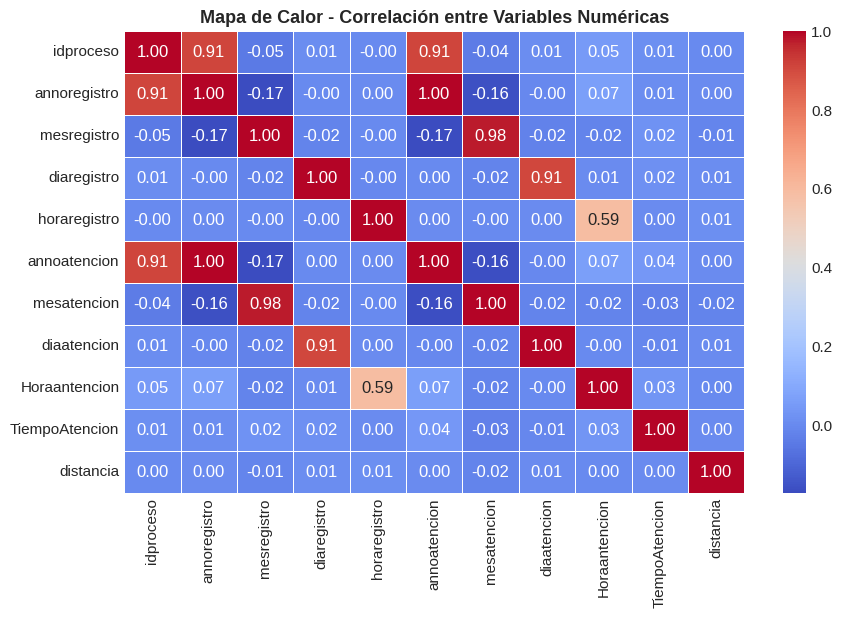

PARES DE VARIABLES ALTAMENTE CORRELACIONADAS (REDUNDANCIA DETECTADA):

Variable_1    Variable_2  Correlación
2  annoatencion  annoregistro     0.999179
3   mesatencion   mesregistro     0.976631
1  annoatencion     idproceso     0.912668
0  annoregistro     idproceso     0.912496
4   diaatencion   diaregistro     0.906643

Columnas eliminadas por alta correlación: ['diaregistro', 'idproceso', 'annoregistro', 'mesregistro']

Dimensiones finales tras eliminación: (8040, 24)

In [24]:
# =====================================================
# ANÁLISIS Y TRATAMIENTO AUTOMÁTICO DE CORRELACIÓN Y REDUNDANCIA
# =====================================================

def analizar_correlacion(df, umbral_corr=0.85, visualizar=True, eliminar=True):
    """
    Analiza la correlación entre variables numéricas y elimina redundancias.

    Parámetros:
    ------------
    df : pd.DataFrame
        Dataset de entrada (limpio o parcialmente procesado)
    umbral_corr : float
        Valor de correlación (absoluto) a partir del cual se considera redundancia.
    visualizar : bool
        Si True, muestra el mapa de calor de correlaciones.
    eliminar : bool
        Si True, elimina automáticamente variables redundantes.

    Retorna:
    --------
    df_correl : DataFrame limpio sin variables redundantes (si eliminar=True)
    correl_table : DataFrame con pares de variables altamente correlacionadas
    """

    # Copiar el DataFrame original
    df_correl = df.copy()

    # Seleccionar solo variables numéricas
    num_cols = df_correl.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) < 2:
        print(" No hay suficientes variables numéricas para analizar correlación.")
        return df_correl, pd.DataFrame()

    # Calcular matriz de correlación (Pearson)
    corr_matrix = df_correl[num_cols].corr(method='pearson')

    # Visualización del mapa de calor
    if visualizar:
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
        plt.title("Mapa de Calor - Correlación entre Variables Numéricas", fontsize=13, fontweight='bold')
        plt.show()

    # Detectar variables altamente correlacionadas
    correlaciones_altas = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > umbral_corr:
                correlaciones_altas.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    correl_table = pd.DataFrame(correlaciones_altas, columns=['Variable_1', 'Variable_2', 'Correlación'])
    correl_table = correl_table.sort_values(by='Correlación', ascending=False)

    # Mostrar resultados
    if correl_table.empty:
        print("\n No se encontraron correlaciones altas entre variables numéricas.")
        return df_correl, correl_table
    else:
        print("\n PARES DE VARIABLES ALTAMENTE CORRELACIONADAS (REDUNDANCIA DETECTADA):")
        display(correl_table)

    # Eliminar variables redundantes si se indica
    if eliminar:
        cols_eliminar_corr = list(set(correl_table['Variable_2']))
        df_correl.drop(columns=cols_eliminar_corr, inplace=True, errors='ignore')
        print(f"\n Columnas eliminadas por alta correlación: {cols_eliminar_corr}")
        print(f" Dimensiones finales tras eliminación: {df_correl.shape}")
    else:
        print("\n No se eliminaron columnas. Solo se detectaron correlaciones.")

    return df_correl, correl_table


# =====================================================
# 🔧 EJEMPLO DE USO
# =====================================================

# Aplicar análisis de correlación sobre el dataset limpio
df_final, correlaciones_detectadas = analizar_correlacion(
    df=df_limpio,
    umbral_corr=0.85,
    visualizar=True,
    eliminar=True
)


## **6.6. Transformación de variables  (Escalado- Normalización)**

In [25]:
# =====================================================
# TRANSFORMACIÓN DE VARIABLES: ESCALADO Y NORMALIZACIÓN
# =====================================================

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import pandas as pd
import numpy as np

def transformar_variables(df, metodo='standard', visualizar=True):
    """
    Aplica transformación (escalado o normalización) a las variables numéricas del dataset.

    Parámetros:
    ------------
    df : pd.DataFrame
        Dataset de entrada (sin valores nulos)
    metodo : str
        Método de transformación: 'standard', 'minmax', 'robust', 'normalizer'
    visualizar : bool
        Si True, muestra estadísticas antes y después del escalado.

    Retorna:
    --------
    df_transformado : pd.DataFrame
        Dataset con variables numéricas transformadas.
    scaler : objeto del escalador (para aplicar sobre datos nuevos)
    """

    df_transformado = df.copy()

    # Seleccionar solo las columnas numéricas
    num_cols = df_transformado.select_dtypes(include=[np.number]).columns.tolist()
    if not num_cols:
        print(" No se encontraron variables numéricas para escalar o normalizar.")
        return df_transformado, None

    # Mostrar estadísticas iniciales
    if visualizar:
        print("\n Estadísticas ANTES de la transformación:")
        display(df_transformado[num_cols].describe().T)

    # Elegir el método de escalado
    if metodo == 'standard':
        scaler = StandardScaler()   # Media = 0, Desviación = 1
        metodo_nombre = "Estandarización (StandardScaler)"
    elif metodo == 'minmax':
        scaler = MinMaxScaler()     # Escala entre 0 y 1
        metodo_nombre = "Normalización Min-Max"
    elif metodo == 'robust':
        scaler = RobustScaler()     # Basado en la mediana, resistente a outliers
        metodo_nombre = "Escalado Robusto"
    elif metodo == 'normalizer':
        scaler = Normalizer()       # Normaliza por norma (para datos vectoriales)
        metodo_nombre = "Normalización por Norma"
    else:
        raise ValueError(" Método no válido. Usa: 'standard', 'minmax', 'robust' o 'normalizer'.")

    # Aplicar la transformación
    df_transformado[num_cols] = scaler.fit_transform(df_transformado[num_cols])

    # Mostrar estadísticas después del escalado
    if visualizar:
        print(f"\n Transformación aplicada: {metodo_nombre}")
        print("\n Estadísticas DESPUÉS de la transformación:")
        display(df_transformado[num_cols].describe().T)

    return df_transformado, scaler


# =====================================================
#  EJEMPLO DE USO
# =====================================================

# Escalado estándar (útil para modelos lineales y SVM)
df_scaled, scaler_standard = transformar_variables(df_final, metodo='standard')

# Si quisieras usar normalización Min-Max:
# df_scaled, scaler_minmax = transformar_variables(df_final, metodo='minmax')


Estadísticas ANTES de la transformación:

count         mean           std          min          25%  \
horaregistro    8040.0    14.081219      4.715200     0.000000    11.000000   
annoatencion    8040.0  2020.020647      2.276523  2016.000000  2018.000000   
mesatencion     8040.0     6.803980      3.521990     1.000000     4.000000   
diaatencion     8040.0    15.817040      8.863927     1.000000     8.000000   
Horaantencion   8040.0    14.583831      5.107983     0.000000    11.000000   
TiempoAtencion  8040.0  2976.155100  27272.733760     0.000000    12.000000   
distancia       8040.0  8483.655926    299.145664  1759.926915  8482.212922   

                        50%         75%            max  
horaregistro      14.000000    18.00000      23.000000  
annoatencion    2020.000000  2022.00000    2025.000000  
mesatencion        7.000000    10.00000      12.000000  
diaatencion       16.000000    23.00000      31.000000  
Horaantencion     15.000000    19.00000      23.000000  
TiempoAtencion    28.000000   225.25000  878976.000000  
distancia       8483.506851  8486.79933   13230.957749

Transformación aplicada: Estandarización (StandardScaler)

Estadísticas DESPUÉS de la transformación:

count          mean       std        min       25%       50%  \
horaregistro    8040.0 -5.744438e-17  1.000062  -2.986532 -0.653506 -0.017226   
annoatencion    8040.0 -1.708131e-14  1.000062  -1.766245 -0.887657 -0.009070   
mesatencion     8040.0  7.070077e-17  1.000062  -1.648029 -0.796185  0.055659   
diaatencion     8040.0  4.595550e-17  1.000062  -1.671715 -0.881948  0.020642   
Horaantencion   8040.0 -4.242046e-17  1.000062  -2.855283 -0.701657  0.081479   
TiempoAtencion  8040.0 -3.535038e-18  1.000062  -0.109132 -0.108692 -0.108106   
distancia       8040.0  2.947338e-15  1.000062 -22.477836 -0.004824 -0.000498   

                     75%        max  
horaregistro    0.831147   1.891614  
annoatencion    0.869517   2.187399  
mesatencion     0.907504   1.475400  
diaatencion     0.810409   1.713000  
Horaantencion   0.864616   1.647753  
TiempoAtencion -0.100873  32.121984  
distancia       0.010509  15.870519

## **6.7. Codificación de variables categóricas**

Variable: diasemana (7 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: HoraPicoTarde (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: HoraPicoManana (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: InicioNoche (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: Amanecer (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: Municipio (5 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: Instancia (12 valores únicos)

Aplicado Target Encoding (alta cardinalidad)

Variable: clienteimportante (3 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: Acuerdo (10 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: UsuarioRegistra (7 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: LiberaVehiculo (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

Variable: ResultadoFallo (4 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: Aseguradora (8 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: RandomAbogado (8 valores únicos)

Aplicado One-Hot Encoding (baja cardinalidad)

Variable: Lluvia (2 valores únicos)

Aplicado LabelEncoder (codificación binaria)

RESUMEN DE MÉTODOS DE CODIFICACIÓN:

Variable  Valores Únicos Método Aplicado
        diasemana               7   OneHotEncoder
    HoraPicoTarde               2    LabelEncoder
   HoraPicoManana               2    LabelEncoder
      InicioNoche               2    LabelEncoder
         Amanecer               2    LabelEncoder
        Municipio               5   OneHotEncoder
        Instancia              12  TargetEncoding
clienteimportante               3   OneHotEncoder
          Acuerdo              10   OneHotEncoder
  UsuarioRegistra               7   OneHotEncoder
   LiberaVehiculo               2    LabelEncoder
   ResultadoFallo               4   OneHotEncoder
      Aseguradora               8   OneHotEncoder
    RandomAbogado               8   OneHotEncoder
           Lluvia               2    LabelEncoder

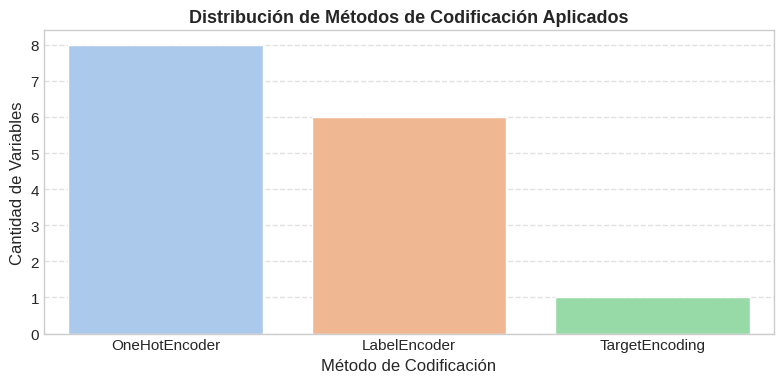

Codificadores guardados en 'codificadores_categoricos.pkl'

Codificación completada correctamente.

In [27]:
# ============================================================
#  CODIFICACIÓN ADAPTATIVA DE VARIABLES CATEGÓRICAS
#  (Optimizada para predicción del tiempo de llegada)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

def codificar_variables_categoricas(df, variable_objetivo='TiempoAtencion', umbral_cardinalidad=10, guardar=False):
    """
    Codifica automáticamente todas las variables categóricas según su cardinalidad:
      - LabelEncoder → Variables binarias (2 categorías)
      - OneHotEncoder → Baja cardinalidad (≤ umbral_cardinalidad)
      - Target Encoding → Alta cardinalidad (> umbral_cardinalidad)

    Además:
      - Muestra tabla resumen con el método aplicado a cada variable
      - Genera visualización de distribución de métodos
      - Devuelve dataset codificado y mapeo de codificadores
    """

    df_codificado = df.copy()
    codificadores = {}
    resumen_codificacion = []

    cat_cols = df_codificado.select_dtypes(include=['object', 'category']).columns.tolist()

    if not cat_cols:
        print(" No se encontraron variables categóricas para codificar.")
        return df_codificado, codificadores, None

    for col in cat_cols:
        n_unicos = df_codificado[col].nunique()
        metodo = ""

        print(f"\nVariable: {col} ({n_unicos} valores únicos)")

        # ===== 1️ Label Encoding: variables binarias =====
        if n_unicos == 2:
            metodo = "LabelEncoder"
            le = LabelEncoder()
            df_codificado[col] = le.fit_transform(df_codificado[col].astype(str))
            codificadores[col] = ('LabelEncoder', le)
            print(f"Aplicado LabelEncoder (codificación binaria)")

        # ===== 2️ One-Hot Encoding: baja cardinalidad =====
        elif n_unicos <= umbral_cardinalidad:
            metodo = "OneHotEncoder"
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            ohe_array = ohe.fit_transform(df_codificado[[col]].astype(str))
            ohe_df = pd.DataFrame(ohe_array, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]])
            ohe_df.index = df_codificado.index
            df_codificado = pd.concat([df_codificado.drop(columns=[col]), ohe_df], axis=1)
            codificadores[col] = ('OneHotEncoder', ohe)
            print(f"Aplicado One-Hot Encoding (baja cardinalidad)")

        # ===== 3️ Target Encoding: alta cardinalidad =====
        else:
            metodo = "TargetEncoding"
            media_global = df_codificado[variable_objetivo].mean()
            encoding_map = df_codificado.groupby(col)[variable_objetivo].mean()
            df_codificado[col] = df_codificado[col].map(encoding_map).fillna(media_global)
            codificadores[col] = ('TargetEncoding', encoding_map.to_dict())
            print(f"Aplicado Target Encoding (alta cardinalidad)")

        resumen_codificacion.append({
            'Variable': col,
            'Valores Únicos': n_unicos,
            'Método Aplicado': metodo
        })

    # ===== Tabla resumen =====
    resumen_df = pd.DataFrame(resumen_codificacion)
    print("\n\n RESUMEN DE MÉTODOS DE CODIFICACIÓN:\n\n")
    print(resumen_df.to_string(index=False))

    # ===== Visualización =====
    plt.figure(figsize=(8, 4))
    sns.countplot(data=resumen_df, x='Método Aplicado', palette='pastel')
    plt.title("Distribución de Métodos de Codificación Aplicados", fontsize=13, fontweight='bold')
    plt.xlabel("Método de Codificación")
    plt.ylabel("Cantidad de Variables")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # ===== Guardar codificadores =====
    if guardar:
        joblib.dump(codificadores, "codificadores_categoricos.pkl")
        print("\n Codificadores guardados en 'codificadores_categoricos.pkl'")

    print("\n Codificación completada correctamente.")
    return df_codificado, codificadores, resumen_df


df_codificado, codificadores, resumen_cod = codificar_variables_categoricas(
    df,
    variable_objetivo='TiempoAtencion',  # o tu variable de predicción
    umbral_cardinalidad=10,
    guardar=True
)


### **6.7.1. Detección y Eliminación de Registros Duplicados**

In [29]:
#Verificación y eliminación de registros duplicados

# Contar registros totales antes de eliminar
total_registros = len(df)

# Contar cuántos registros están duplicados
duplicados = df.duplicated().sum()

print("\n\n [bold]===== REVISIÓN DE DUPLICADOS =====[/bold]")
print(f"Total de registros: {total_registros}")
print(f"Registros duplicados encontrados: {duplicados}")

# Mostrar ejemplos de duplicados (si existen)
if duplicados > 0:
    print("\n Ejemplos de registros duplicados:")
    display(df[df.duplicated()].head())
else:
    print("\n\n  No se encontraron registros duplicados.")

# Eliminar duplicados y resetear el índice
df = df.drop_duplicates().reset_index(drop=True)

# 5. Confirmar resultado
print("\n\n [bold]RESULTADO FINAL[/bold]")
print(f"Registros después de eliminar duplicados: {len(df)}")
print(f"Duplicados restantes: {df.duplicated().sum()}")


===== REVISIÓN DE DUPLICADOS =====

Total de registros: 8040

Registros duplicados encontrados: 0

No se encontraron registros duplicados.

RESULTADO FINAL

Registros después de eliminar duplicados: 8040

Duplicados restantes: 0

### **6.7.2. Corrección Tipo de Datos**

In [32]:
# ============================================================
# CORRECCIÓN DE TIPOS DE DATOS
# ============================================================

print("\n\n [bold]REVISIÓN DE TIPOS DE DATOS[/bold] \n")
print(df.dtypes)
print("\nTotal de columnas:", len(df.columns))

# ------------------------------------------------------------
# Convertir fechas a tipo datetime
# ------------------------------------------------------------
fecha_cols = [col for col in df.columns if 'fecha' in col.lower()]
for col in fecha_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    print(f"[bold] Columna '{col}' convertida a datetime. [/bold]")

# ------------------------------------------------------------
# Convertir columnas categóricas (tipo 'object') a 'category'
# ------------------------------------------------------------
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    df[col] = df[col].astype('category')
    print(f"[bold]  Columna '{col}' convertida a tipo 'category'.[/bold]")

# ------------------------------------------------------------
# Convertir columnas numéricas mal tipadas (ej. strings con números)
# ------------------------------------------------------------
num_like_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.replace('.', '', 1).str.isnumeric().any()]
for col in num_like_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"[bold] Columna '{col}' convertida a tipo numérico. [/bold] ")

# ------------------------------------------------------------
# Validar resultado final
# ------------------------------------------------------------
print("\n\n [bold]TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN[/bold] \n")
print(df.dtypes)


REVISIÓN DE TIPOS DE DATOS

annoregistro                  int64
mesregistro                   int64
diaregistro                   int64
horaregistro                  int64
diasemana                  category
annoatencion                float64
mesatencion                 float64
diaatencion                 float64
Horaantencion               float64
TiempoAtencion              float64
HoraPicoTarde              category
HoraPicoManana             category
InicioNoche                category
Amanecer                   category
Municipio                  category
Instancia                  category
clienteimportante          category
Acuerdo                    category
UsuarioRegistra            category
LiberaVehiculo             category
ResultadoFallo             category
Aseguradora                category
RandomAbogado              category
Lluvia                     category
distancia                   float64
fecha_anio           datetime64[ns]
fecha_mes            datetime64[ns]
fecha_dia            datetime64[ns]
fecha_hora           datetime64[ns]
fechallegada_anio    datetime64[ns]
fechallegada_mes     datetime64[ns]
fechallegada_dia     datetime64[ns]
fechallegada_hora    datetime64[ns]
Abogadounico_freq           float64
dtype: object

Total de columnas: 34

 Columna 'fecha_anio' convertida a datetime. 

 Columna 'fecha_mes' convertida a datetime. 

 Columna 'fecha_dia' convertida a datetime. 

 Columna 'fecha_hora' convertida a datetime. 

 Columna 'fechallegada_anio' convertida a datetime. 

 Columna 'fechallegada_mes' convertida a datetime. 

 Columna 'fechallegada_dia' convertida a datetime. 

 Columna 'fechallegada_hora' convertida a datetime. 

TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN

annoregistro                  int64
mesregistro                   int64
diaregistro                   int64
horaregistro                  int64
diasemana                  category
annoatencion                float64
mesatencion                 float64
diaatencion                 float64
Horaantencion               float64
TiempoAtencion              float64
HoraPicoTarde              category
HoraPicoManana             category
InicioNoche                category
Amanecer                   category
Municipio                  category
Instancia                  category
clienteimportante          category
Acuerdo                    category
UsuarioRegistra            category
LiberaVehiculo             category
ResultadoFallo             category
Aseguradora                category
RandomAbogado              category
Lluvia                     category
distancia                   float64
fecha_anio           datetime64[ns]
fecha_mes            datetime64[ns]
fecha_dia            datetime64[ns]
fecha_hora           datetime64[ns]
fechallegada_anio    datetime64[ns]
fechallegada_mes     datetime64[ns]
fechallegada_dia     datetime64[ns]
fechallegada_hora    datetime64[ns]
Abogadounico_freq           float64
dtype: object

### **6.7.3. Eliminación de Categorías Pequeñas Variable Instancia**

In [33]:
#Eliminación de categorias pequeñas para la variables categóricas relacionadas con la variable Instancia
df['Instancia'].value_counts().sort_values(ascending=False)



Instancia
SIMPLE                                  5870
PRELIMINAR LESIONES                     1078
TELEFÓNICA                               553
AUDIENCIA                                278
PRELIMINAR DESISTIMIENTO                 137
RECOBRO                                   69
PRELIMINAR HOMICIDIO                      33
AUDIENCIA PREJUDICIAL                     11
DEMANDA CIVIL                              4
PRELIMINAR DESISTIMIENTO pasa SIMPLE       3
PRELIMINAR CONCURSO                        3
PARTICULAR                                 1
Name: count, dtype: int64

### **6.7.4. Reemplazo de Valores Para Agrupacion Por Categoría Instancia**

In [34]:
#Reemplazo de valores para la agrupación de categorías

#Diccionario con los reemplazos a realizar
reemplazos = {  "PRELIMINAR DESISTIMIENTO": "OTROS"
              , "RECOBRO": "OTROS"
              , "PRELIMINAR HOMICIDIO": "OTROS"
              , "AUDIENCIA PREJUDICIAL": "OTROS"
              , "DEMANDA CIVIL": "OTROS"
              , "PRELIMINAR CONCURSO": "OTROS"
              , "PARTICULAR": "OTROS"
              , "PRELIMINAR DESISTIMIENTO pasa SIMPLE": "OTROS"}

#Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
df['Instancia'] = df['Instancia'].map(reemplazos).fillna(df['Instancia'])


#Visualización de las nuevos valores agrupados para la categoria 'Instancia'
df['Instancia'].value_counts().sort_values(ascending=False)

Instancia
SIMPLE                 5870
PRELIMINAR LESIONES    1078
TELEFÓNICA              553
AUDIENCIA               278
OTROS                   261
Name: count, dtype: int64

### **6.7.5. Eliminación de Categorias Municipios**

Procedemos a eliminar todos los municipios debido a que nuestro análisis lo vamos a enfocar en la ciudad de Medellín y alrededores.

In [35]:
# conteo de los municipios
conteo_municipios = df['Municipio'].value_counts()
# Seleccionar los municipios más comunes
top_municipios = conteo_municipios.nlargest(6).index
print(f"\nLos municipios más frecuentes: {list(top_municipios)}")

Los municipios más frecuentes: ['Medellín', 'Envigado', 'Itagüí', 'Bello', 'La Estrella']

In [36]:
#Eliminación de categorias pequeñas para la variables categoricas - Municipios
df['Municipio'].value_counts().sort_values(ascending=False).head(20)

Municipio
Medellín       6088
Envigado        739
Itagüí          569
Bello           496
La Estrella     148
Name: count, dtype: int64

### **6.7.6. Eliminación de Categorias Aseguradora**

In [38]:
# conteo de las Aseguradoras
conteo_aseguradora = df['Aseguradora'].value_counts()
# Seleccionar las Aseguradoras más comunes
top_aseguradora = conteo_aseguradora.nlargest(2).index

# Add the new category 'Otras Aseguradora' to the categorical column
if 'Otras Aseguradora' not in df['Aseguradora'].cat.categories:
    df['Aseguradora'] = df['Aseguradora'].cat.add_categories('Otras Aseguradora')

df['Aseguradora'] = df['Aseguradora'].where(
    df['Aseguradora'].isin(top_aseguradora),
    other='Otras Aseguradora'
)

df['Aseguradora'].value_counts().sort_values(ascending=False).head(20)

Aseguradora
Liberty Seguros SA    6417
IKE ASIST             1524
Otras Aseguradora       99
ALC SAS - Penales        0
Andi Asistencia SA       0
HDI SEGUR                0
Asegurado                0
Ariza y Gomez - Re       0
MUNDIAL D                0
Name: count, dtype: int64

### **6.7.7. Eliminación de Categorias Acuerdo**

In [39]:
# conteo de los Acuerdos
conteo_Acuerdo = df['Acuerdo'].value_counts()
# Seleccionar los Acuerdos más comunes
top_Acuerdo = conteo_Acuerdo.nlargest(2).index

# Add the new category 'Otros Acuerdo' to the categorical column
if 'Otros Acuerdo' not in df['Acuerdo'].cat.categories:
    df['Acuerdo'] = df['Acuerdo'].cat.add_categories('Otros Acuerdo')

df['Acuerdo'] = df['Acuerdo'].where(
    df['Acuerdo'].isin(top_Acuerdo),
    other='Otros Acuerdo'
)

df['Acuerdo'].value_counts().sort_values(ascending=False).head(20)

Acuerdo
Otros Acuerdo               4623
Tránsito                    2846
Acuerdo entre las partes     571
Cancelado                      0
Cada uno asume su daño         0
Carta Entregada                0
Carta Recibida                 0
Fuga sin tránsito              0
Fuga con tránsito              0
Otros                          0
No transito                    0
Name: count, dtype: int64

### **6.7.8. Escalado robusto (RobustScaler) Variables Numéricas**

 Columnas numéricas a escalar: 

Index(['annoregistro', 'mesregistro', 'diaregistro', 'horaregistro',
       'annoatencion', 'mesatencion', 'diaatencion', 'Horaantencion',
       'TiempoAtencion', 'distancia', 'Abogadounico_freq',
       'TiempoAtencion_wins', 'TiempoAtencion_log', 'TiempoAtencion_scaled'],
      dtype='object')

Escalado robusto aplicado correctamente a las variables numéricas.

Las variables se escalaron reduciendo el impacto de outliers.

===== COMPARACIÓN ESTADÍSTICAS DE ESCALADO (Antes vs Después) =====

Media (Antes)  Desv.Std (Antes)  Mín (Antes)  \
annoregistro                2019.604             2.221     2016.000   
mesregistro                    6.821             3.536        1.000   
diaregistro                   15.834             8.849        1.000   
horaregistro                  14.106             4.598        0.000   
annoatencion                2019.604             2.221     2016.000   
mesatencion                    6.821             3.536        1.000   
diaatencion                   15.838             8.849        1.000   
Horaantencion                 14.556             4.957        0.000   
TiempoAtencion                52.025            93.327        0.000   
distancia                   8483.480           284.994     1759.927   
Abogadounico_freq              0.061             0.060        0.000   
TiempoAtencion_wins           52.025            93.327        0.000   
TiempoAtencion_log             2.937             1.530        0.000   
TiempoAtencion_scaled          0.912             2.745       -0.618   

                       Máx (Antes)  Media (Después)  Desv.Std (Después)  \
annoregistro              2025.000           -0.132               0.740   
mesregistro                 12.000           -0.030               0.589   
diaregistro                 31.000           -0.011               0.590   
horaregistro                23.000            0.015               0.657   
annoatencion              2025.000           -0.132               0.740   
mesatencion                 12.000           -0.030               0.589   
diaatencion                 31.000           -0.011               0.590   
Horaantencion               23.000           -0.063               0.708   
TiempoAtencion             545.000            0.912               2.745   
distancia                13230.588           -0.006              63.069   
Abogadounico_freq            0.200            0.382               1.306   
TiempoAtencion_wins        545.000            0.912               2.745   
TiempoAtencion_log           6.303           -0.098               0.978   
TiempoAtencion_scaled       15.412            0.912               2.745   

                       Mín (Después)  Máx (Después)  
annoregistro                  -1.333          1.667  
mesregistro                   -1.000          0.833  
diaregistro                   -1.000          1.000  
horaregistro                  -2.000          1.286  
annoatencion                  -1.333          1.667  
mesatencion                   -1.000          0.833  
diaatencion                   -1.000          1.000  
Horaantencion                 -2.143          1.143  
TiempoAtencion                -0.618         15.412  
distancia                  -1487.923       1050.525  
Abogadounico_freq             -0.932          3.386  
TiempoAtencion_wins           -0.618         15.412  
TiempoAtencion_log            -1.976          2.053  
TiempoAtencion_scaled         -0.618         15.412

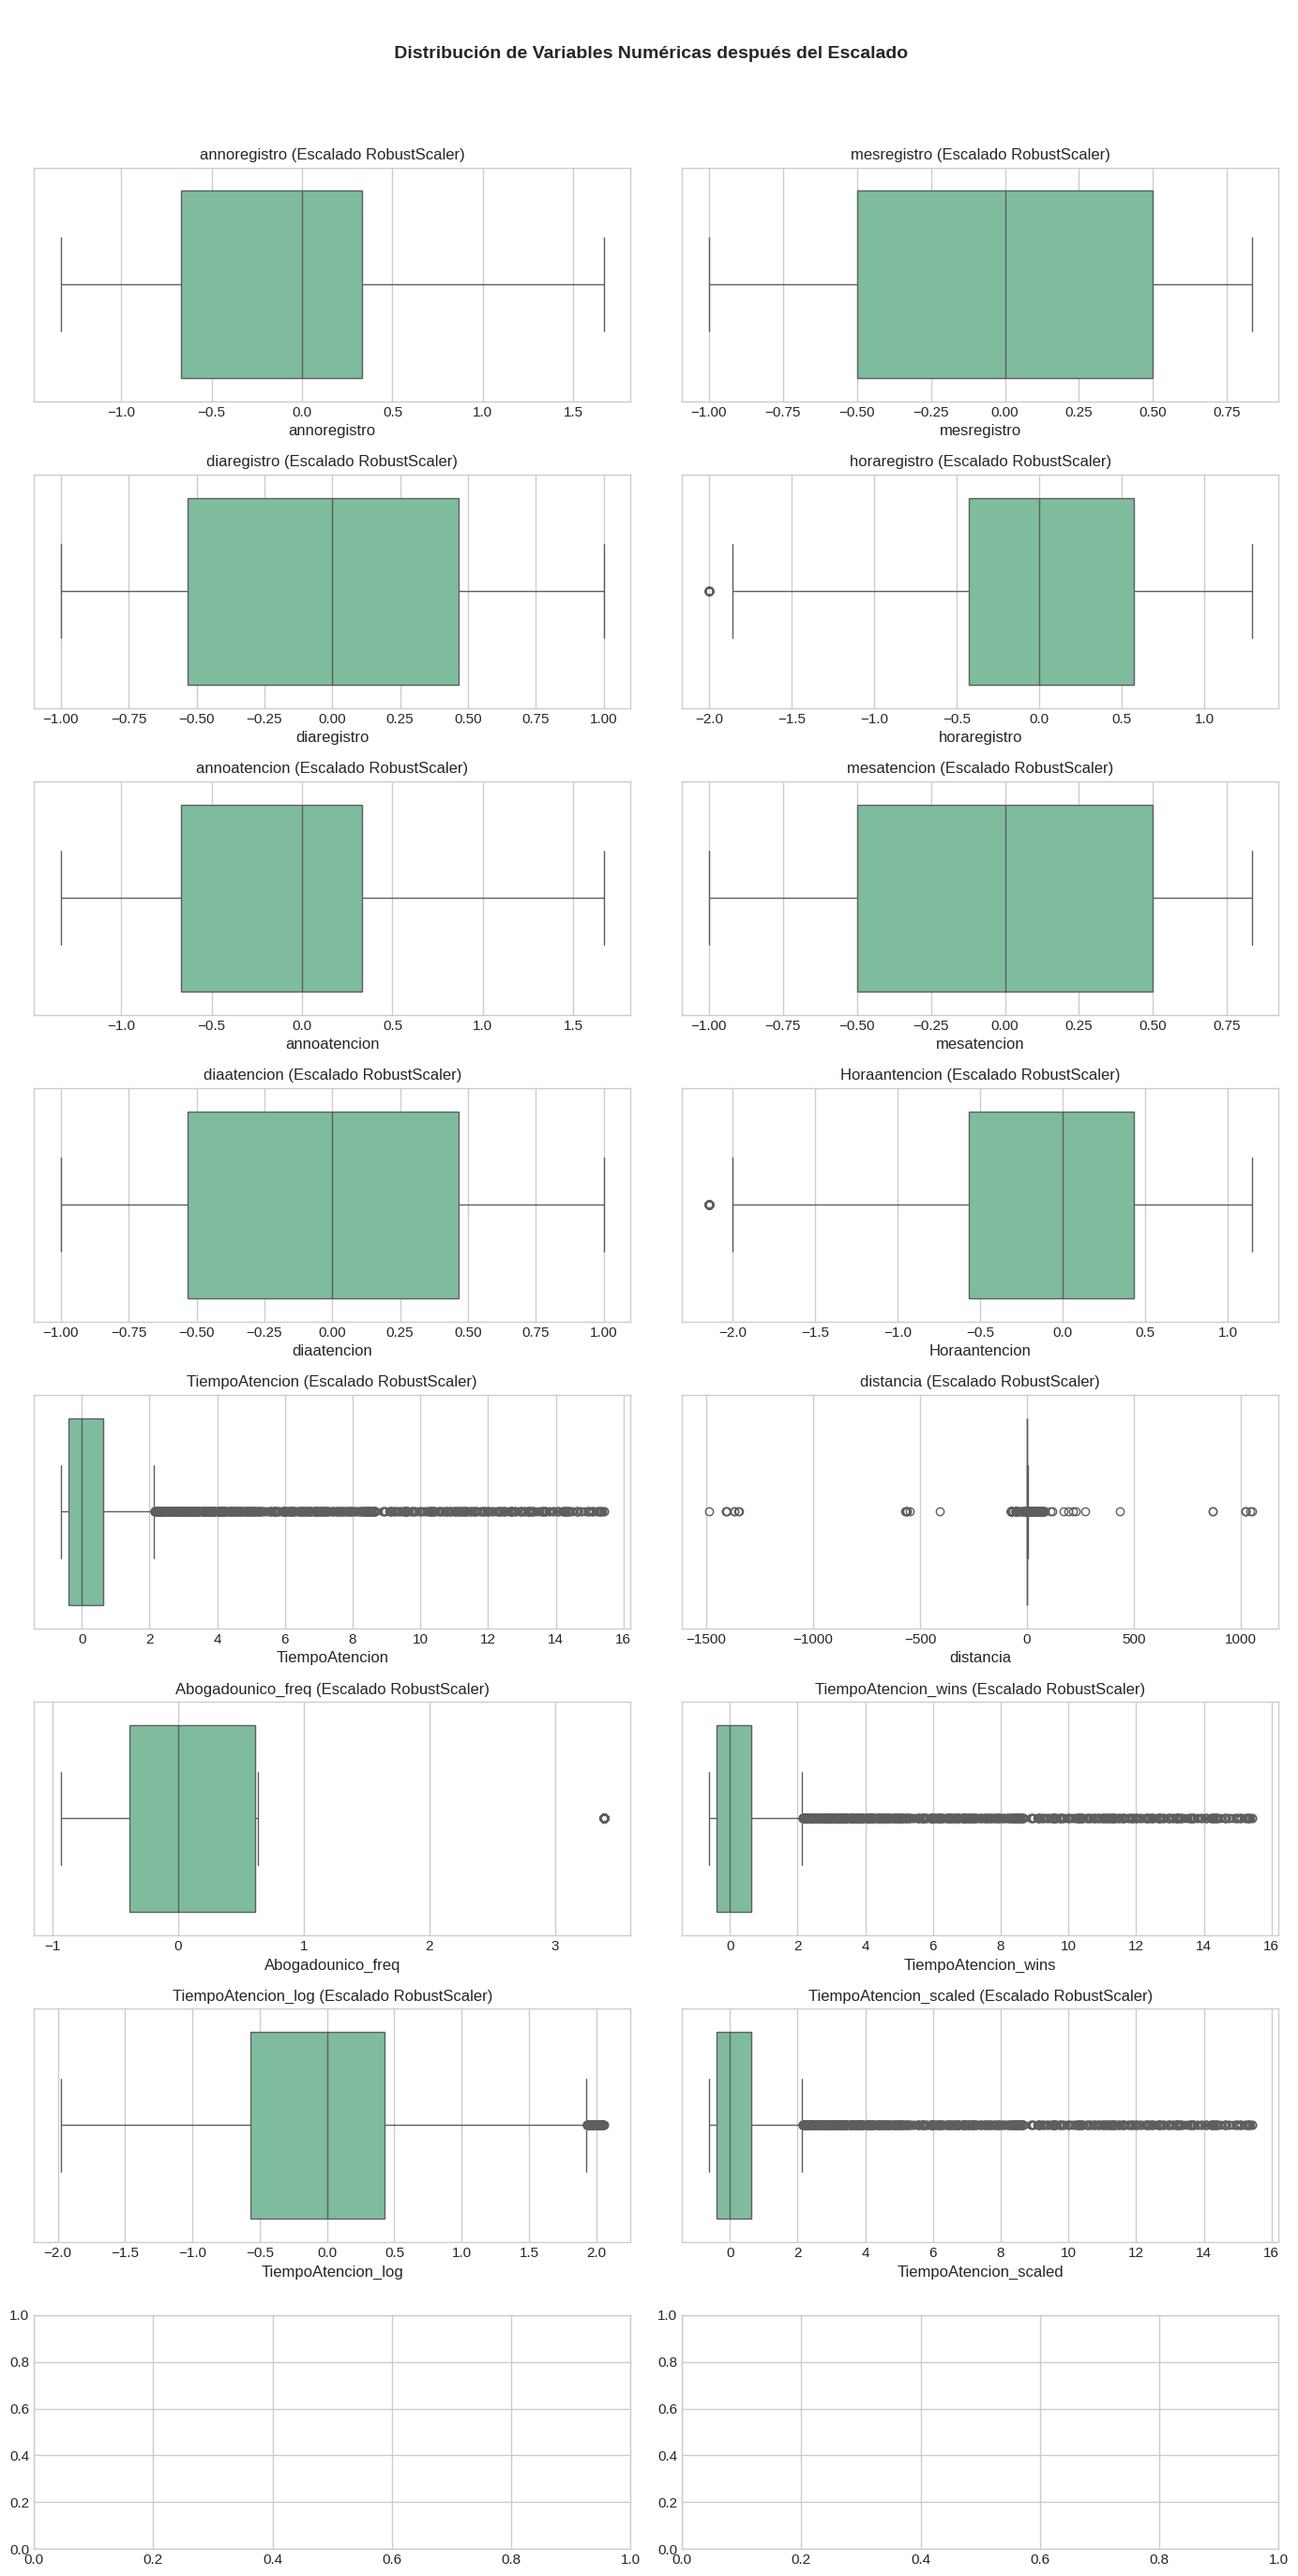

In [40]:
# ============================================================
# ESCALADO DE VARIABLES NUMÉRICAS CON ROBUSTSCALER
# ============================================================

from sklearn.preprocessing import RobustScaler

# --- 1.Identificar columnas numéricas ---
numeric_cols = df_filtrado.select_dtypes(include=['int64', 'float64']).columns
print("\n\n [bold] Columnas numéricas a escalar: [/bold]")
display(numeric_cols)

# --- 2️.Aplicar RobustScaler ---
scaler = RobustScaler()
df_scaled = df_filtrado.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_filtrado[numeric_cols])

print("\n\n Escalado robusto aplicado correctamente a las variables numéricas.")
print("\n\n Las variables se escalaron reduciendo el impacto de outliers.\n")

# --- 3️.Verificación estadística antes y después ---
before = df_filtrado[numeric_cols].describe().T
after = pd.DataFrame(df_scaled[numeric_cols]).describe().T

comparacion = pd.concat([before[['mean', 'std', 'min', 'max']],
                         after[['mean', 'std', 'min', 'max']]],
                        axis=1)
comparacion.columns = ['Media (Antes)', 'Desv.Std (Antes)', 'Mín (Antes)', 'Máx (Antes)',
                       'Media (Después)', 'Desv.Std (Después)', 'Mín (Después)', 'Máx (Después)']

print("\n\n [bold]===== COMPARACIÓN ESTADÍSTICAS DE ESCALADO (Antes vs Después) =====[/bold]\n")
display(comparacion.round(3))

# --- 4️.Boxplots de verificación ---
fig, axes = plt.subplots(nrows=int(len(numeric_cols)/2) + 1, ncols=2, figsize=(14, 4 * (len(numeric_cols)//2)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_scaled[col], color="#74C69D", ax=axes[i])
    axes[i].set_title(f"{col} (Escalado RobustScaler)")
    axes[i].set_xlabel(col)

plt.suptitle("\n\n Distribución de Variables Numéricas después del Escalado", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **6.7.9. Codificación de Variables Categóricas (One-Hot / Label Encoding)**

In [42]:
# ============================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# ============================================================

from sklearn.preprocessing import LabelEncoder

# --- 1️ Identificar columnas categóricas ---
cat_cols = df_scaled.select_dtypes(include=['object', 'category']).columns
print("\n\n Columnas categóricas detectadas:")
display(cat_cols)

# --- 2️ Analizar cardinalidad (número de categorías únicas) ---
cardinalidad = df_scaled[cat_cols].nunique().sort_values(ascending=False)
print("\n\n [bold]CARDINALIDAD DE VARIABLES CATEGÓRICAS[/bold]")
display(cardinalidad)

# --- 3️ Decidir tipo de codificación ---
# One-Hot Encoding -> variables con baja cardinalidad (<= 10 categorías)
# Label Encoding -> variables con alta cardinalidad (> 10 categorías)

onehot_cols = [col for col in cat_cols if df_scaled[col].nunique() <= 10]
label_cols = [col for col in cat_cols if df_scaled[col].nunique() > 10]

print(f"\n\n Columnas para One-Hot Encoding ({len(onehot_cols)}):")
print(onehot_cols)
print(f"\n\n Columnas para Label Encoding ({len(label_cols)}):")
print(label_cols)

# --- 4️ Aplicar One-Hot Encoding ---
if onehot_cols:
    df_encoded = pd.get_dummies(df_scaled, columns=onehot_cols, drop_first=True)
else:
    df_encoded = df_scaled.copy()

# --- 5️ Aplicar Label Encoding ---
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    print(f"\n\n Label Encoding aplicado a '{col}'.")

# --- 6️ Verificación final ---
print("\n\n [bold]DIMENSIONES DESPUÉS DE LA CODIFICACIÓN[/bold]")
print(f"Filas: {df_encoded.shape[0]}  |  Columnas: {df_encoded.shape[1]}")

print("\n\n Ejemplo de variables codificadas:")
display(df_encoded.head())

# --- 7️ Confirmar tipos de datos ---
print("\n\n [bold]TIPOS DE DATOS FINALES[/bold]")
print(df_encoded.dtypes.value_counts())


Columnas categóricas detectadas:

Index(['diasemana', 'HoraPicoTarde', 'HoraPicoManana', 'InicioNoche',
       'Amanecer', 'Municipio', 'Instancia', 'clienteimportante', 'Acuerdo',
       'UsuarioRegistra', 'LiberaVehiculo', 'ResultadoFallo', 'Aseguradora',
       'RandomAbogado', 'Lluvia'],
      dtype='object')

CARDINALIDAD DE VARIABLES CATEGÓRICAS

Instancia            11
Acuerdo              10
Aseguradora           8
RandomAbogado         8
UsuarioRegistra       7
diasemana             7
Municipio             5
ResultadoFallo        4
clienteimportante     3
HoraPicoTarde         2
HoraPicoManana        2
InicioNoche           2
Amanecer              2
LiberaVehiculo        2
Lluvia                2
dtype: int64

Columnas para One-Hot Encoding (14):

[
    'diasemana',
    'HoraPicoTarde',
    'HoraPicoManana',
    'InicioNoche',
    'Amanecer',
    'Municipio',
    'clienteimportante',
    'Acuerdo',
    'UsuarioRegistra',
    'LiberaVehiculo',
    'ResultadoFallo',
    'Aseguradora',
    'RandomAbogado',
    'Lluvia'
]

Columnas para Label Encoding (1):

['Instancia']

Label Encoding aplicado a 'Instancia'.

DIMENSIONES DESPUÉS DE LA CODIFICACIÓN

Filas: 6450  |  Columnas: 73

Ejemplo de variables codificadas:

annoregistro  mesregistro  diaregistro  horaregistro  annoatencion  \
0     -1.333333    -0.166667    -0.533333     -0.714286     -1.333333   
1     -1.333333    -0.166667    -0.533333     -0.428571     -1.333333   
2     -1.333333    -0.166667    -0.533333      0.000000     -1.333333   
3     -1.333333    -0.166667    -0.533333      0.571429     -1.333333   
4     -1.333333    -0.166667    -0.533333      0.714286     -1.333333   

   mesatencion  diaatencion  Horaantencion  TiempoAtencion  Instancia  ...  \
0    -0.166667    -0.533333      -0.857143       -0.617647          7  ...   
1    -0.166667    -0.533333      -0.571429       -0.617647          7  ...   
2    -0.166667    -0.533333      -0.142857       -0.617647          9  ...   
3    -0.166667    -0.533333       0.428571       -0.617647          9  ...   
4    -0.166667    -0.533333       0.571429       -0.617647          9  ...   

   Aseguradora_Liberty Seguros SA  Aseguradora_MUNDIAL D  \
0                            True                  False   
1                           False                  False   
2                           False                  False   
3                           False                  False   
4                           False                  False   

   RandomAbogado_ELSA ROSA VEGA LOPEZ  RandomAbogado_Elkin Lezcano  \
0                                True                        False   
1                               False                        False   
2                                True                        False   
3                               False                        False   
4                               False                        False   

   RandomAbogado_JOHAN ALEXANDER MESA RIVERA  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   RandomAbogado_John Jairo Tabares Chavarriaga  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   RandomAbogado_Juan Felipe Hoyos Botero  \
0                                   False   
1                                    True   
2                                   False   
3                                   False   
4                                   False   

   RandomAbogado_Luis Fernando Saldarriaga Rodriguez  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   RandomAbogado_SEBASTIAN LOPEZ GOMEZ  Lluvia_Si  
0                                False      False  
1                                False      False  
2                                False      False  
3                                False      False  
4                                 True      False  

[5 rows x 73 columns]

TIPOS DE DATOS FINALES

bool       50
float64    14
int32       8
int64       1
Name: count, dtype: int64

### **6.7.10. Mostrar cuántos valores extremos hay (mayores a 1 hora = 3600 segundos)**

In [43]:
# Mostrar cuántos valores extremos hay (mayores a 1 hora = 3600 segundos)
outliers = df[df["TiempoAtencion"] > 3600]
print(f"[bold]Registros con TiempoAtencion > 1 hora: {len(outliers)} de {len(df)} totales [/bold]")

#obtener el promedio de atención sin tener encuenta los outliers para mejor asignación
promedioatencion = df[~df.index.isin(outliers.index)]['TiempoAtencion'].mean()
promedioatencion

Registros con TiempoAtencion > 1 hora: 572 de 8040 totales 

np.float64(262.52570969469735)

### **6.7.11. Cálculo Promedio Tiempo Atención**

Generar valores aleatorios sólo para los registros outliers de la variable TiempoAtencion

In [44]:
# Generar valores aleatorios sólo para los registros outliers
# Obtener los índices de los outliers
indices_outliers = df.index.isin(outliers.index)

# Contar cuántos outliers hay
num_outliers = indices_outliers.sum()

# Asignar valores aleatorios SOLO a los outliers usando loc
df.loc[indices_outliers, 'TiempoAtencion'] = np.random.randint(1, promedioatencion, size=num_outliers)

# Calcular el nuevo promedio
nuevo_promedio = df['TiempoAtencion'].mean()
print(f"[bold] Nuevo promedio de TiempoAtencion: {nuevo_promedio:.2f} [/bold]")

 Nuevo promedio de TiempoAtencion: 253.12 

## **6.8. Cálculo Promedio Atención**

In [ ]:
# Ensure dias_espanol dictionary is defined
dias_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miercoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sabado',
    'Sunday': 'Domingo'
}

# Calculate max time attention (handle potential NaNs)
maximo = df['TiempoAtencion'].max()
if pd.isna(maximo):
    # If max is NaN (e.g., all TiempoAtencion are NaN), use a default or calculate from non-nulls
    print("Warning: Max TiempoAtencion is NaN. Using median for imputation range.")
    median_tiempo = df['TiempoAtencion'].median()
    maximo = median_tiempo if pd.notna(median_tiempo) else 60 # Use median or a default like 60 minutes


df_nulos = df[df['TiempoAtencion'].isna()]
# Obtener los índices de los null
indices_null = df.index.isin(df_nulos.index)
# Contar cuántos valores nulos hay
total_nulos = indices_null.sum()

if total_nulos > 0:
    # Asignar valores aleatorios solo a los valores null de la fecha tiempo de atención
    # Ensure the upper bound for randint is valid (>= lower bound)
    upper_bound = max(1, int(maximo)) # Ensure upper bound is at least 1
    df.loc[indices_null, 'TiempoAtencion'] = np.random.randint(1, upper_bound + 1, size=total_nulos) # Use 1 to upper_bound inclusive

    #actualizar la fecha de llegada teniendo encuenta el valor calculado aleatoriamente de tiempo de atención
    # Ensure 'fecha' column is datetime type before adding timedelta
    df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
    df.loc[indices_null, 'fechallegada'] = df.loc[indices_null, 'fecha'] + pd.to_timedelta(df.loc[indices_null, 'TiempoAtencion'], unit='minutes')

    # Update date and time components from the new fechallegada
    df.loc[indices_null, 'annoatencion'] = df.loc[indices_null, 'fechallegada'].dt.year
    df.loc[indices_null, 'mesatencion'] = df.loc[indices_null, 'fechallegada'].dt.month
    df.loc[indices_null, 'diaatencion'] = df.loc[indices_null, 'fechallegada'].dt.day
    df.loc[indices_null, 'Horaantencion'] = df.loc[indices_null, 'fechallegada'].dt.hour

    # Add all possible Spanish day names to the 'diasemana' categories before assigning
    spanish_day_names = list(dias_espanol.values())
    # Convert 'diasemana' to category if it's not already
    if not pd.api.types.is_categorical_dtype(df['diasemana']):
         df['diasemana'] = df['diasemana'].astype('category')

    # Add categories if they are not already present
    new_categories_to_add = [day for day in spanish_day_names if day not in df['diasemana'].cat.categories]
    if new_categories_to_add:
        df['diasemana'] = df['diasemana'].cat.add_categories(new_categories_to_add)

    # Map and assign the Spanish day names
    df.loc[indices_null, 'diasemana'] = df.loc[indices_null, 'fechallegada'].dt.day_name().map(dias_espanol)

    print(f"✅ Se imputaron {total_nulos} valores nulos en TiempoAtencion y se actualizaron fechas/horas relacionadas.")

else:
    print("ℹ️ No se encontraron valores nulos en TiempoAtencion para imputar.")


# Calcular el nuevo promedio
nuevo_promedio = df['TiempoAtencion'].mean()
print(f"[bold] Nuevo promedio de TiempoAtencion: {nuevo_promedio:.2f} [/bold]")

#df.loc[indices_null, ['Horaantencion', 'diasemana', 'diaatencion', 'mesatencion', 'annoatencion', 'fecha','TiempoAtencion' ,'fechallegada']]

ℹ️ No se encontraron valores nulos en TiempoAtencion para imputar.

 Nuevo promedio de TiempoAtencion: 253.20 

## **6.9. Creación de Nuevas Variables (Feature Engineering)**

El siguiente paso lógico tras la limpieza, imputación y escalado es la creación de nuevas variables (feature engineering), que mejora el poder predictivo del modelo y permite capturar mejor las relaciones entre los datos.

### **6.9.1. Creación de Nuevas Variables Feature Engineering**



Iniciando creación de nuevas variables...

Generando visualizaciones de nuevas variables...

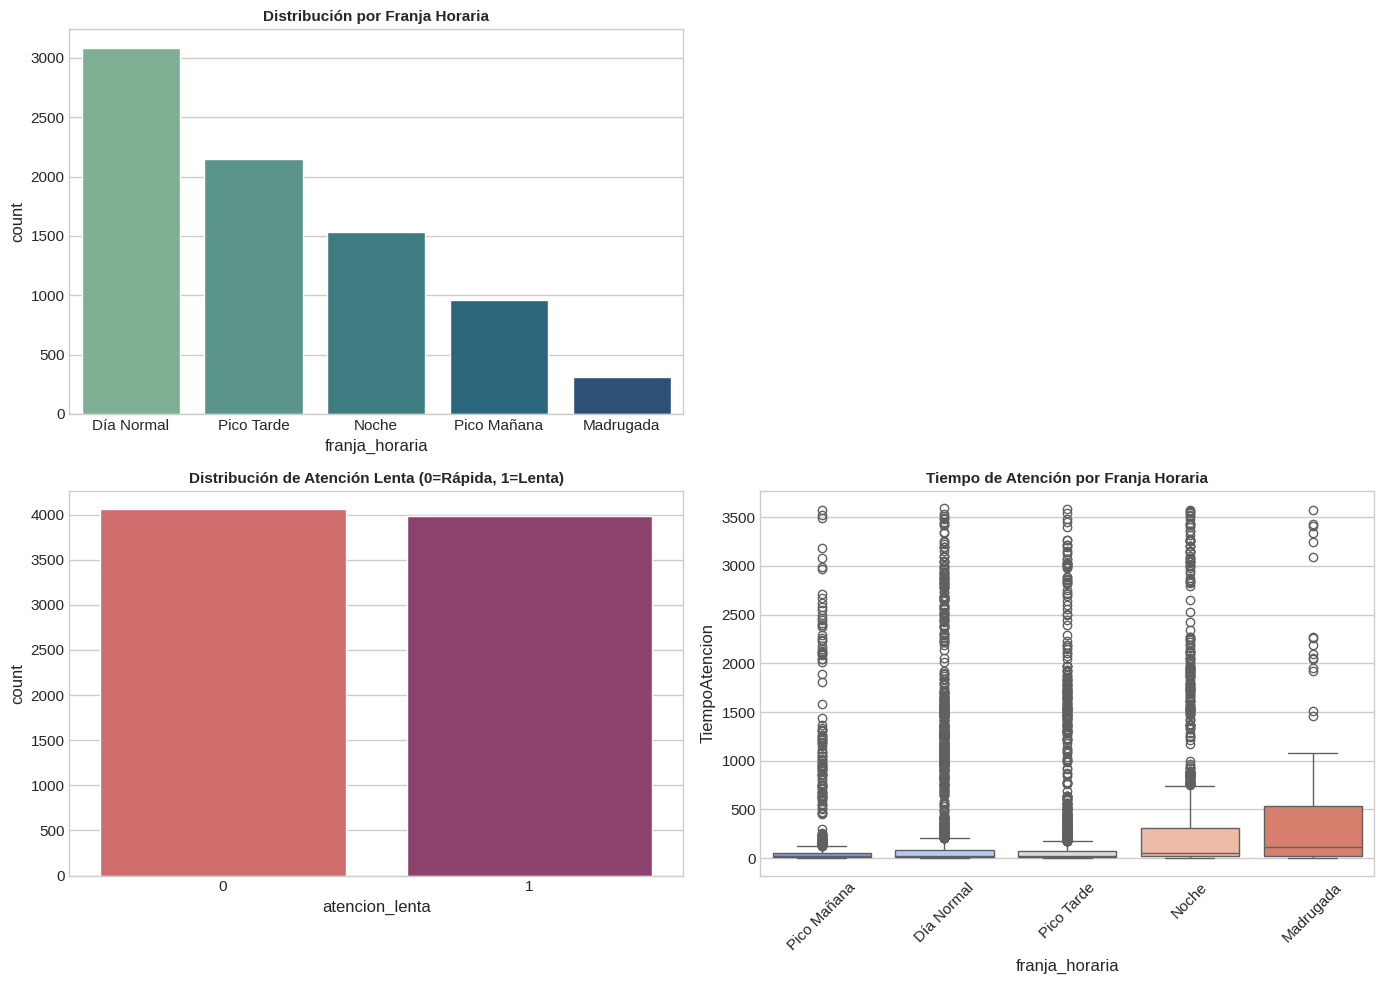

Se han creado 6 nuevas variables:

→ franja_horaria

→ hora_sin

→ hora_cos

→ atencion_lenta

→ condicion_lluvia

→ Municipio_top

✨ Feature Engineering completado exitosamente.

annoregistro  mesregistro  diaregistro  horaregistro  diasemana  \
0          2016            6            8             9  Miercoles   
1          2016            6            8            11  Miercoles   
2          2016            6            8            14  Miercoles   
3          2016            6            8            18  Miercoles   
4          2016            6            8            19  Miercoles   

   annoatencion  mesatencion  diaatencion  Horaantencion  TiempoAtencion  ...  \
0        2016.0          6.0          8.0            9.0             0.0  ...   
1        2016.0          6.0          8.0           11.0             0.0  ...   
2        2016.0          6.0          8.0           14.0             0.0  ...   
3        2016.0          6.0          8.0           18.0             0.0  ...   
4        2016.0          6.0          8.0           19.0             0.0  ...   

               fechallegada_mes              fechallegada_dia  \
0 1970-01-01 00:00:00.000000006 1970-01-01 00:00:00.000000008   
1 1970-01-01 00:00:00.000000006 1970-01-01 00:00:00.000000008   
2 1970-01-01 00:00:00.000000006 1970-01-01 00:00:00.000000008   
3 1970-01-01 00:00:00.000000006 1970-01-01 00:00:00.000000008   
4 1970-01-01 00:00:00.000000006 1970-01-01 00:00:00.000000008   

              fechallegada_hora Abogadounico_freq franja_horaria  hora_sin  \
0 1970-01-01 00:00:00.000000009          0.041471    Pico Mañana  0.707107   
1 1970-01-01 00:00:00.000000011          0.041471     Día Normal  0.258819   
2 1970-01-01 00:00:00.000000014          0.041471     Día Normal -0.500000   
3 1970-01-01 00:00:00.000000018          0.041471     Pico Tarde -1.000000   
4 1970-01-01 00:00:00.000000019          0.041471     Pico Tarde -0.965926   

       hora_cos atencion_lenta condicion_lluvia Municipio_top  
0 -7.071068e-01              0               No      Medellín  
1 -9.659258e-01              0               No      Medellín  
2 -8.660254e-01              0               No      Medellín  
3 -1.836970e-16              0               No      Medellín  
4  2.588190e-01              0               No      Medellín  

[5 rows x 40 columns]

In [45]:
# =========================================================
# CREACIÓN DE NUEVAS VARIABLES (Feature Engineering)
# =========================================================

def crear_variables_feature_engineering(df):
    """
    Crea nuevas variables derivadas del dataset para análisis y modelado predictivo.
    Incluye variables temporales, cíclicas, contextuales y de comportamiento.
    """

    df_feat = df.copy()
    print(" Iniciando creación de nuevas variables...\n")

    # ---------------------------------------------------------
    # Conversión de fechas (validación robusta)
    # ---------------------------------------------------------
    for col in ['fecha', 'fechallegada']:
        if col in df_feat.columns:
            df_feat[col] = pd.to_datetime(df_feat[col], errors='coerce')

    # ---------------------------------------------------------
    # Variables derivadas de la fecha de registro
    # ---------------------------------------------------------
    if 'fecha' in df_feat.columns:
        df_feat['anio_registro'] = df_feat['fecha'].dt.year
        df_feat['mes_registro'] = df_feat['fecha'].dt.month
        df_feat['dia_registro'] = df_feat['fecha'].dt.day
        df_feat['dia_semana_registro'] = df_feat['fecha'].dt.day_name()
        df_feat['es_fin_semana_registro'] = df_feat['dia_semana_registro'].isin(['Saturday', 'Sunday']).astype(int)
        df_feat['es_dia_pico_registro'] = df_feat['dia_semana_registro'].isin(['Monday', 'Friday']).astype(int)

    # ---------------------------------------------------------
    # Variables derivadas de la fecha de atención
    # ---------------------------------------------------------
    if 'fechallegada' in df_feat.columns:
        df_feat['anio_atencion'] = df_feat['fechallegada'].dt.year
        df_feat['mes_atencion'] = df_feat['fechallegada'].dt.month
        df_feat['dia_atencion'] = df_feat['fechallegada'].dt.day
        df_feat['dia_semana_atencion'] = df_feat['fechallegada'].dt.day_name()
        df_feat['es_fin_semana_atencion'] = df_feat['dia_semana_atencion'].isin(['Saturday', 'Sunday']).astype(int)
        df_feat['es_dia_pico_atencion'] = df_feat['dia_semana_atencion'].isin(['Monday', 'Friday']).astype(int)

    # ---------------------------------------------------------
    # Diferencia de tiempo entre registro y atención
    # ---------------------------------------------------------
    if {'fecha', 'fechallegada'}.issubset(df_feat.columns):
        df_feat['dias_diferencia_reg_atencion'] = (
            (df_feat['fechallegada'] - df_feat['fecha']).dt.total_seconds() / (3600 * 24)
        ).round(2)

    # ---------------------------------------------------------
    # Franja horaria (según hora de atención)
    # ---------------------------------------------------------
    if 'Horaantencion' in df_feat.columns:
        def franja_horaria(hora):
            if pd.isna(hora): return np.nan
            if 0 <= hora < 6: return 'Madrugada'
            elif 6 <= hora < 10: return 'Pico Mañana'
            elif 10 <= hora < 16: return 'Día Normal'
            elif 16 <= hora < 20: return 'Pico Tarde'
            else: return 'Noche'

        df_feat['franja_horaria'] = df_feat['Horaantencion'].apply(franja_horaria)

        # Variables cíclicas
        df_feat['hora_sin'] = np.sin(2 * np.pi * df_feat['Horaantencion'] / 24)
        df_feat['hora_cos'] = np.cos(2 * np.pi * df_feat['Horaantencion'] / 24)

    # ---------------------------------------------------------
    # Indicador de atención lenta
    # ---------------------------------------------------------
    if 'TiempoAtencion' in df_feat.columns:
        mediana_tiempo = df_feat['TiempoAtencion'].median()
        df_feat['atencion_lenta'] = (df_feat['TiempoAtencion'] > mediana_tiempo).astype(int)

    # ---------------------------------------------------------
    # Condición de lluvia simplificada
    # ---------------------------------------------------------
    if 'Lluvia' in df_feat.columns:
        df_feat['Lluvia'] = df_feat['Lluvia'].astype(str).str.strip().str.lower()
        df_feat['condicion_lluvia'] = df_feat['Lluvia'].apply(
            lambda x: 'Sí' if x in ['si', 'sí', '1', 'true', 't'] else 'No'
        )

    # ---------------------------------------------------------
    # Municipios agrupados por frecuencia
    # ---------------------------------------------------------
    if 'Municipio' in df_feat.columns:
        df_feat['Municipio'] = df_feat['Municipio'].astype(str).str.strip().str.title()
        top_muns = df_feat['Municipio'].value_counts().nlargest(10).index
        df_feat['Municipio_top'] = df_feat['Municipio'].apply(lambda x: x if x in top_muns else 'Otros')

    # ---------------------------------------------------------
    # Visualizaciones automáticas
    # ---------------------------------------------------------
    print("\n Generando visualizaciones de nuevas variables...\n")
    plt.figure(figsize=(14, 10))

    # 1️ Franja horaria
    if 'franja_horaria' in df_feat.columns:
        plt.subplot(2, 2, 1)
        sns.countplot(data=df_feat, x='franja_horaria', order=df_feat['franja_horaria'].value_counts().index, palette='crest')
        plt.title('Distribución por Franja Horaria', fontsize=11, fontweight='bold')

    # 2️ Día de la semana (atención)
    if 'dia_semana_atencion' in df_feat.columns:
        plt.subplot(2, 2, 2)
        order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
        sns.countplot(data=df_feat, x='dia_semana_atencion', order=order, palette='mako')
        plt.title('Distribución por Día de Atención', fontsize=11, fontweight='bold')
        plt.xticks(rotation=45)

    # 3️ Atención lenta
    if 'atencion_lenta' in df_feat.columns:
        plt.subplot(2, 2, 3)
        sns.countplot(data=df_feat, x='atencion_lenta', palette='flare')
        plt.title('Distribución de Atención Lenta (0=Rápida, 1=Lenta)', fontsize=11, fontweight='bold')

    # 4️ Boxplot TiempoAtencion vs Franja Horaria
    if {'TiempoAtencion', 'franja_horaria'}.issubset(df_feat.columns):
        plt.subplot(2, 2, 4)
        sns.boxplot(data=df_feat, x='franja_horaria', y='TiempoAtencion', palette='coolwarm')
        plt.title('Tiempo de Atención por Franja Horaria', fontsize=11, fontweight='bold')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # Resumen final
    # ---------------------------------------------------------
    nuevas_cols = [c for c in df_feat.columns if c not in df.columns]
    print(f"\n Se han creado {len(nuevas_cols)} nuevas variables:\n")
    for col in nuevas_cols:
        print(f"   → {col}")

    print("\n✨ Feature Engineering completado exitosamente.")
    return df_feat


# =========================================================
# LLAMADO DIRECTO
# =========================================================
df_feat_engineered = crear_variables_feature_engineering(df)
display(df_feat_engineered.head())


### **6.9.2. Nueva Variable Indicador Binario Fin de semana**

El tiempo de atención varía drásticamente entre la semana laboral y el fin de semana. Es más útil un indicador binario que el nombre del día (diasemana) en sí.

In [46]:
# Crear una nueva columna binaria (0 o 1)
df['fin_de_semana'] = df['diasemana'].apply(
    lambda x: 1 if x in ['Sábado', 'Domingo'] else 0
)

In [47]:
# Ver estructura básica
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head(3))

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

Dimensiones del dataset:
(8040, 35)

Primeras filas:

annoregistro  mesregistro  diaregistro  horaregistro  diasemana  \
0          2016            6            8             9  Miercoles   
1          2016            6            8            11  Miercoles   
2          2016            6            8            14  Miercoles   

   annoatencion  mesatencion  diaatencion  Horaantencion  TiempoAtencion  ...  \
0        2016.0          6.0          8.0            9.0             0.0  ...   
1        2016.0          6.0          8.0           11.0             0.0  ...   
2        2016.0          6.0          8.0           14.0             0.0  ...   

                     fecha_anio                     fecha_mes  \
0 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
1 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
2 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   

                      fecha_dia                    fecha_hora  \
0 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000009   
1 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000011   
2 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000014   

              fechallegada_anio              fechallegada_mes  \
0 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
1 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
2 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   

               fechallegada_dia             fechallegada_hora  \
0 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000009   
1 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000011   
2 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000014   

  Abogadounico_freq fin_de_semana  
0          0.041471             0  
1          0.041471             0  
2          0.041471             0  

[3 rows x 35 columns]

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

## **6.10. Exportar resultado**

In [48]:
from datetime import datetime
import pandas as pd

# =========================================================
# Exportar resultado
# =========================================================
exportar = True     # Cambia a False si no quieres guardar el archivo
formato = 'xlsx'    # Opciones: 'csv' o 'xlsx'

if exportar:
    fecha_actual = datetime.now().strftime('%Y%m%d_%H%M')
    nombre_archivo = f"df_feature_engineering_{fecha_actual}"

    if formato == 'csv':
        ruta = f"{nombre_archivo}.csv"
        df.to_csv(ruta, index=False, encoding='utf-8-sig')
    elif formato == 'xlsx':
        ruta = f"{nombre_archivo}.xlsx"
        df.to_excel(ruta, index=False)
    else:
        print("Formato no reconocido. Usa 'csv' o 'xlsx'.")
    print(f"\n Archivo exportado correctamente: {ruta}")

print("\n Feature Engineering completado exitosamente.\n")

Archivo exportado correctamente: df_feature_engineering_20251125_2216.xlsx

Feature Engineering completado exitosamente.

## **6.11. Aplicar One-Hot Encoding**

Después de haber creado la variable categórica **FranjaHoraria** a partir de la hora numérica, el paso siguiente y necesario es la Codificación **One-Hot** para que los algoritmos de Machine Learning puedan interpretarla.

La codificación One-Hot convierte una columna de texto ejemplo,  "Pico Mañana" en múltiples columnas binarias (0s y 1s).

In [49]:
df.head()

annoregistro  mesregistro  diaregistro  horaregistro  diasemana  \
0          2016            6            8             9  Miercoles   
1          2016            6            8            11  Miercoles   
2          2016            6            8            14  Miercoles   
3          2016            6            8            18  Miercoles   
4          2016            6            8            19  Miercoles   

   annoatencion  mesatencion  diaatencion  Horaantencion  TiempoAtencion  ...  \
0        2016.0          6.0          8.0            9.0             0.0  ...   
1        2016.0          6.0          8.0           11.0             0.0  ...   
2        2016.0          6.0          8.0           14.0             0.0  ...   
3        2016.0          6.0          8.0           18.0             0.0  ...   
4        2016.0          6.0          8.0           19.0             0.0  ...   

                     fecha_anio                     fecha_mes  \
0 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
1 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
2 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
3 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
4 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   

                      fecha_dia                    fecha_hora  \
0 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000009   
1 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000011   
2 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000014   
3 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000018   
4 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000019   

              fechallegada_anio              fechallegada_mes  \
0 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
1 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
2 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
3 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   
4 1970-01-01 00:00:00.000002016 1970-01-01 00:00:00.000000006   

               fechallegada_dia             fechallegada_hora  \
0 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000009   
1 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000011   
2 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000014   
3 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000018   
4 1970-01-01 00:00:00.000000008 1970-01-01 00:00:00.000000019   

  Abogadounico_freq fin_de_semana  
0          0.041471             0  
1          0.041471             0  
2          0.041471             0  
3          0.041471             0  
4          0.041471             0  

[5 rows x 35 columns]

In [50]:
print(df.columns.tolist())

[
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'horaregistro',
    'diasemana',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'Horaantencion',
    'TiempoAtencion',
    'HoraPicoTarde',
    'HoraPicoManana',
    'InicioNoche',
    'Amanecer',
    'Municipio',
    'Instancia',
    'clienteimportante',
    'Acuerdo',
    'UsuarioRegistra',
    'LiberaVehiculo',
    'ResultadoFallo',
    'Aseguradora',
    'RandomAbogado',
    'Lluvia',
    'distancia',
    'fecha_anio',
    'fecha_mes',
    'fecha_dia',
    'fecha_hora',
    'fechallegada_anio',
    'fechallegada_mes',
    'fechallegada_dia',
    'fechallegada_hora',
    'Abogadounico_freq',
    'fin_de_semana'
]

✅ 'franja_horaria' creada a partir de: horaregistro

Columnas de franja creadas:
[
    'franja_horaria',
    'franja_Día_Normal',
    'franja_Madrugada',
    'franja_Noche',
    'franja_Pico_Mañana',
    'franja_Pico_Tarde'
]

Distribución de franjas (conteo):

franja_horaria  count
0     Día_Normal   3268
1     Pico_Tarde   2239
2    Pico_Mañana   1247
3          Noche   1072
4      Madrugada    214

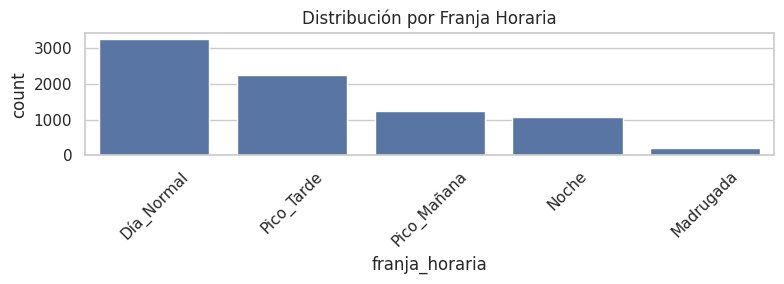

In [51]:
# ============================
# CREAR 'franja_horaria' Y ONE-HOT ENCODING
# ============================

def crear_franca_y_onehot(df,
                          hora_col='horaregistro',
                          esquema='sugerido',
                          drop_original_hour=False,
                          drop_franca_after=False):
    """
    Crea columna 'franja_horaria' a partir de una columna de hora (0-23)
    y realiza One-Hot Encoding sobre ella.

    Parámetros:
    - df: DataFrame
    - hora_col: 'horaregistro' o 'Horaantencion' (columna fuente)
    - esquema: 'sugerido' o dict personalizado tipo { 'Nombre': (start,end), ... }
              los intervalos son inclusivos en start y end en horas enteras 0-23.
    - drop_original_hour: si True elimina la columna de hora original
    - drop_franca_after: si True elimina la columna franja original tras get_dummies
    """
    df = df.copy()

    # 1) Validar columna hora
    if hora_col not in df.columns:
        raise KeyError(f"La columna de hora '{hora_col}' no existe en el DataFrame.")

    # 2) Normalizar la columna hora (numérica y en rango 0-23)
    df[hora_col] = pd.to_numeric(df[hora_col], errors='coerce')
    # Si hay NaNs, mantendremos 'Missing_Franja'

    # 3) Definir esquema por defecto si se solicita
    if esquema == 'sugerido':
        # Intervalos [start, end] en horas enteras
        esquema_map = {
            'Madrugada': (0, 5),         # 00:00 - 05:59
            'Pico_Mañana': (6, 9),       # 06:00 - 09:59
            'Día_Normal': (10, 15),      # 10:00 - 15:59
            'Pico_Tarde': (16, 19),      # 16:00 - 19:59
            'Noche': (20, 23)            # 20:00 - 23:59
        }
    elif isinstance(esquema, dict):
        esquema_map = esquema
    else:
        raise ValueError("El parámetro 'esquema' debe ser 'sugerido' o un dict personalizado.")

    # 4) Función para asignar la franja
    def asignar_franja(h):
        if pd.isna(h):
            return 'Missing_Franja'
        try:
            h_int = int(h) % 24
        except Exception:
            return 'Missing_Franja'
        for name, (start, end) in esquema_map.items():
            # Soportar intervalos que no crucen medianoche (start <= end)
            if start <= end:
                if start <= h_int <= end:
                    return name
            else:
                # caso intervalo que cruza medianoche, ej (22, 3)
                if h_int >= start or h_int <= end:
                    return name
        return 'Other_Franja'

    # 5) Crear columna
    df['franja_horaria'] = df[hora_col].apply(asignar_franja).astype(str)
    # Normalizar nombres (opcional)
    df['franja_horaria'] = df['franja_horaria'].str.replace(" ", "_", regex=False)

    # 6) One-Hot Encoding
    dummies = pd.get_dummies(df['franja_horaria'], prefix='franja', dtype=int)
    df = pd.concat([df.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)

    # 7) Limpiezas opcionales
    if drop_original_hour:
        df.drop(columns=[hora_col], inplace=True)
    if drop_franca_after:
        df.drop(columns=['franja_horaria'], inplace=True)

    # 8) Resumen y visualización ligera
    print("✅ 'franja_horaria' creada a partir de:", hora_col)
    print("Columnas de franja creadas:", [c for c in df.columns if c.startswith('franja_')])
    print("\nDistribución de franjas (conteo):")
    display(df[['franja_horaria']].value_counts().rename_axis(['franja_horaria']).reset_index(name='count'))

    # Gráfica rápida
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x='franja_horaria', order=df['franja_horaria'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Distribución por Franja Horaria")
    plt.tight_layout()
    plt.show()

    return df

# ============================
# EJEMPLO DE USO
# ============================
# Usar horaregistro como fuente; si prefieres Horaantencion, pon hora_col='Horaantencion'
df = crear_franca_y_onehot(df, hora_col='horaregistro', esquema='sugerido', drop_original_hour=False, drop_franca_after=False)


## **6.12. Escalado y normalización de Varibles Numéricas con RobustScaler**



Columnas numéricas detectadas: ['annoregistro', 'mesregistro', 'diaregistro', 'horaregistro', 'annoatencion', 
'mesatencion', 'diaatencion', 'Horaantencion', 'TiempoAtencion', 'distancia', 'Abogadounico_freq', 'fin_de_semana',
'franja_Día_Normal', 'franja_Madrugada', 'franja_Noche', 'franja_Pico_Mañana', 'franja_Pico_Tarde']

⚙️ Aplicando RobustScaler (robusto a outliers)...

Escalado completado para 17 columnas:

→ annoregistro, mesregistro, diaregistro, horaregistro, annoatencion, mesatencion, diaatencion, Horaantencion, 
TiempoAtencion, distancia, Abogadounico_freq, fin_de_semana, franja_Día_Normal, franja_Madrugada, franja_Noche, 
franja_Pico_Mañana, franja_Pico_Tarde

**Resumen comparativo (Antes vs Después del escalado):**

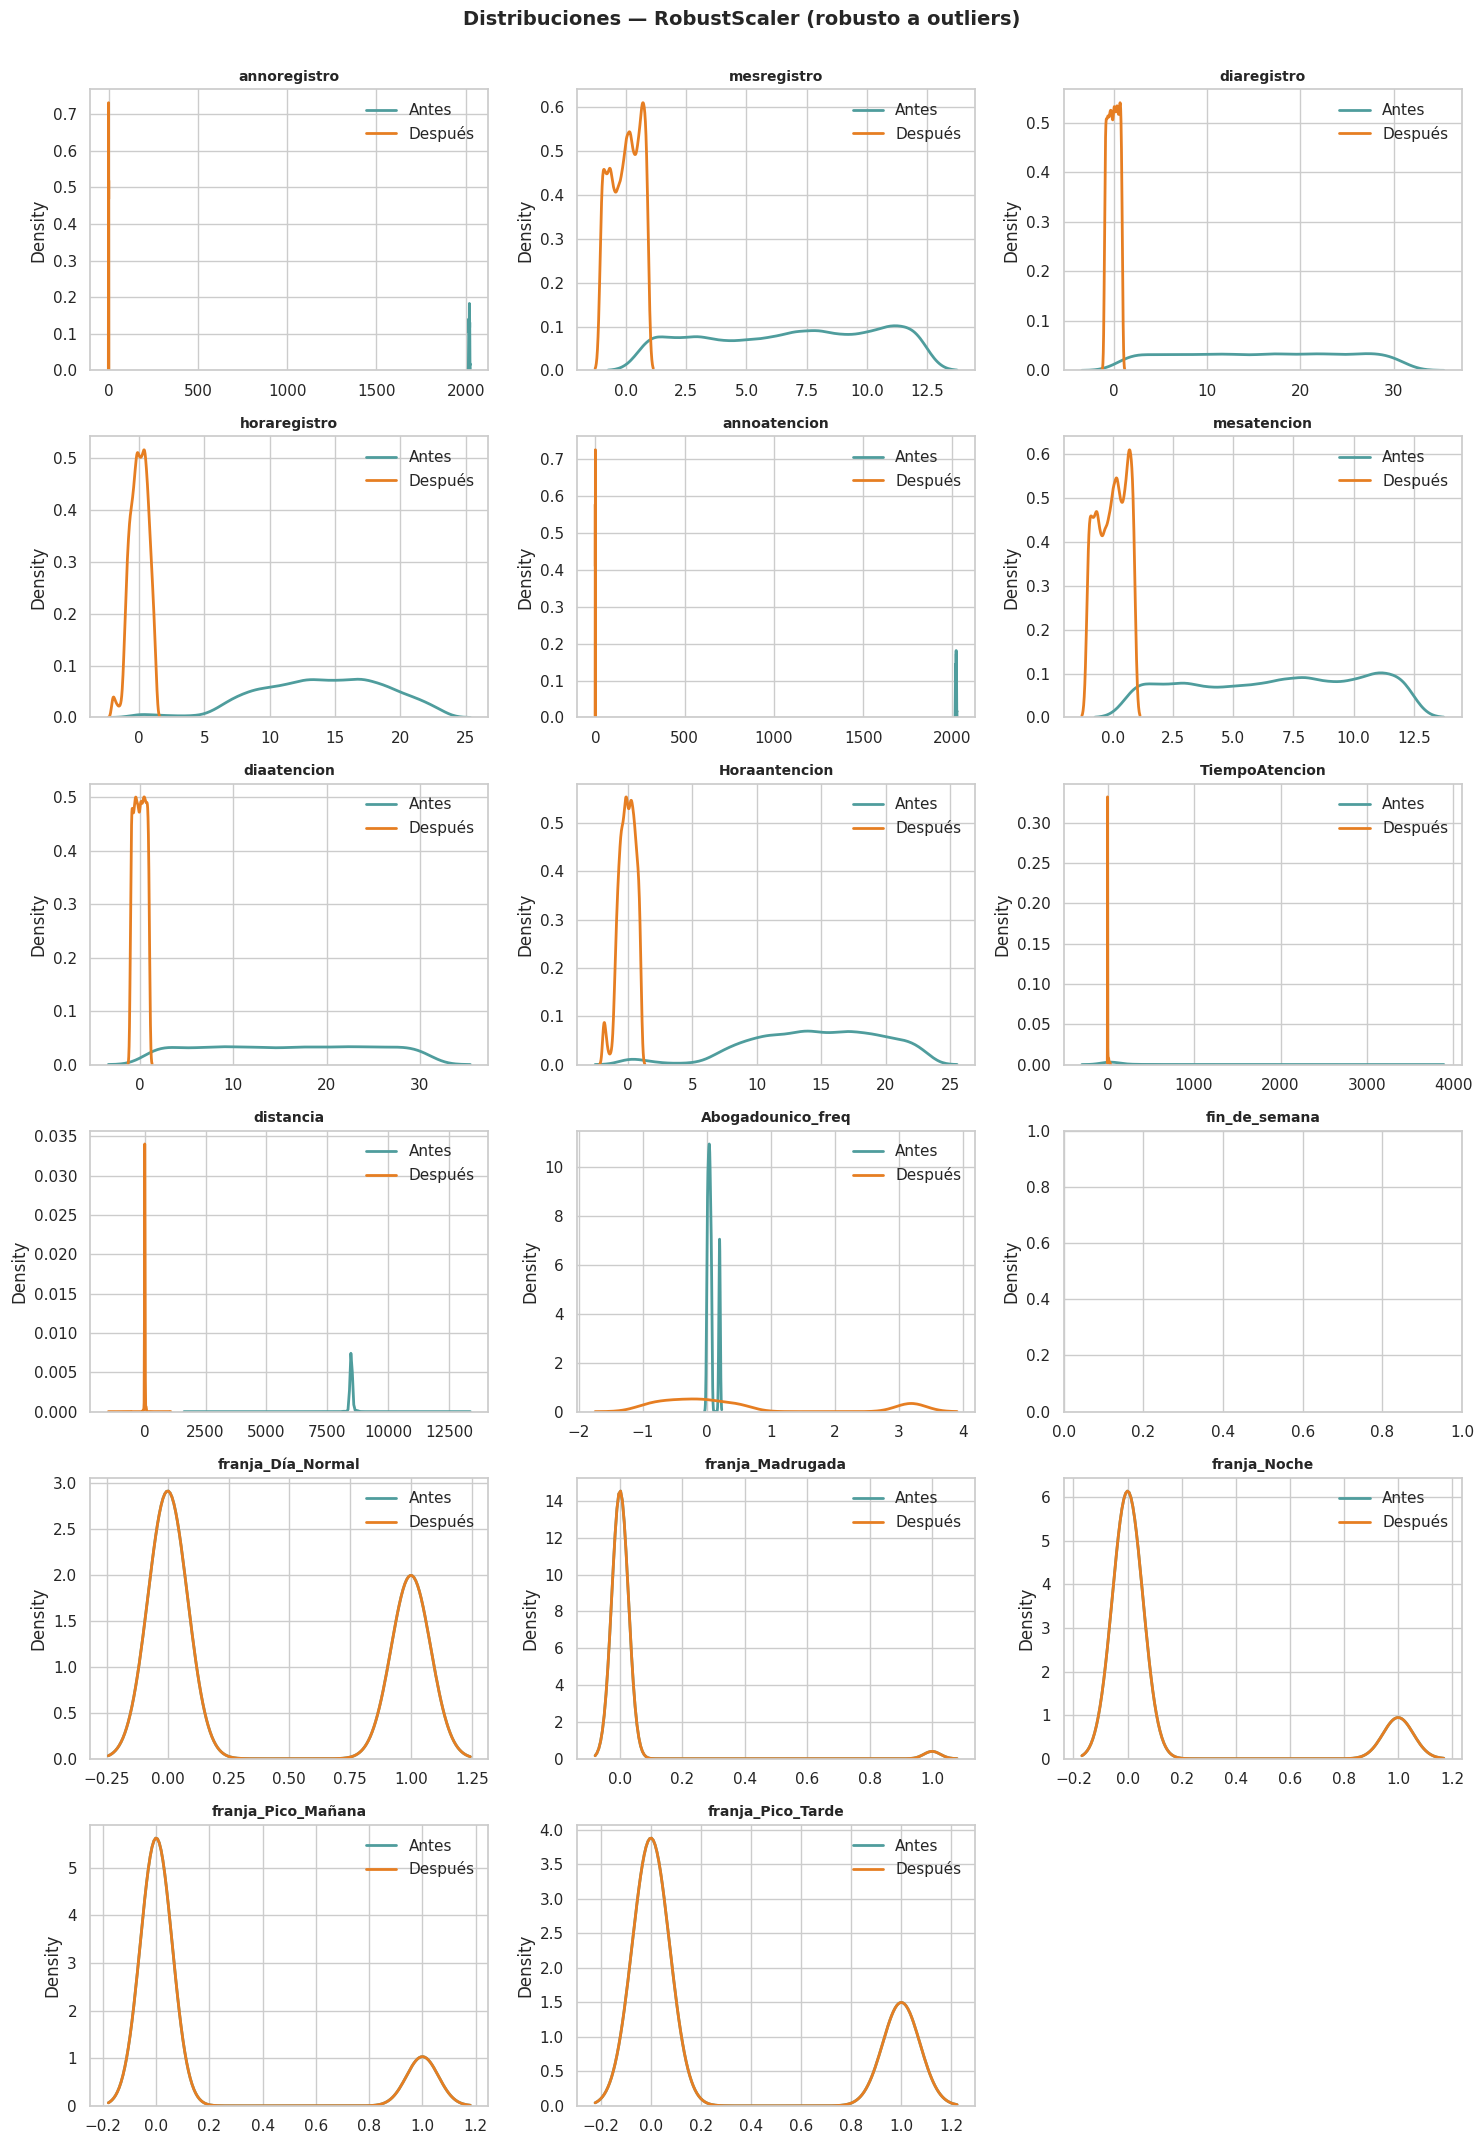

Vista previa de las variables escaladas:

annoregistro  mesregistro  diaregistro  horaregistro  annoatencion  \
0          -1.0    -0.166667         -0.5     -0.714286          -1.0   
1          -1.0    -0.166667         -0.5     -0.428571          -1.0   
2          -1.0    -0.166667         -0.5      0.000000          -1.0   
3          -1.0    -0.166667         -0.5      0.571429          -1.0   
4          -1.0    -0.166667         -0.5      0.714286          -1.0   

   mesatencion  diaatencion  Horaantencion  TiempoAtencion  distancia  \
0    -0.166667    -0.533333         -0.750       -0.245455  -0.194405   
1    -0.166667    -0.533333         -0.500       -0.245455   0.670323   
2    -0.166667    -0.533333         -0.125       -0.245455  -0.147002   
3    -0.166667    -0.533333          0.375       -0.245455  33.945465   
4    -0.166667    -0.533333          0.500       -0.245455  -0.237897   

   Abogadounico_freq  fin_de_semana  franja_Día_Normal  franja_Madrugada  \
0           -0.15427            0.0                0.0               0.0   
1           -0.15427            0.0                1.0               0.0   
2           -0.15427            0.0                1.0               0.0   
3           -0.15427            0.0                0.0               0.0   
4           -0.15427            0.0                0.0               0.0   

   franja_Noche  franja_Pico_Mañana  franja_Pico_Tarde  
0           0.0                 1.0                0.0  
1           0.0                 0.0                0.0  
2           0.0                 0.0                0.0  
3           0.0                 0.0                1.0  
4           0.0                 0.0                1.0

In [52]:
# =========================================================
# ESCALADO Y NORMALIZACIÓN DE VARIABLES NUMÉRICAS
# =========================================================

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def escalar_variables(df, num_cols_list=None, metodo='robust', mostrar_graficos=True):
    """
    Aplica escalado o normalización a las columnas numéricas del DataFrame,
    mostrando una tabla comparativa antes y después, y gráficos de distribución.
    Incluye cambio porcentual en media y desviación estándar.

    Parámetros:
    -----------
    df : pd.DataFrame
        Dataset de entrada
    num_cols_list : list
        Lista de columnas numéricas a escalar (si None, se detectan automáticamente)
    metodo : str
        Tipo de escalado ('standard', 'minmax', 'robust', 'normalize')
    mostrar_graficos : bool
        Si True, genera visualizaciones KDE antes y después del escalado
    """

    df_escalado = df.copy()

    # ======================
    # Selección de columnas numéricas
    # ======================
    if num_cols_list is None:
        num_cols_list = df_escalado.select_dtypes(include=[np.number]).columns.tolist()

    if not num_cols_list:
        print(" No se detectaron columnas numéricas para escalar.")
        return df_escalado

    # ======================
    # Selección del método
    # ======================
    if metodo == 'standard':
        scaler = StandardScaler()
        titulo = "StandardScaler (media=0, desviación=1)"
    elif metodo == 'minmax':
        scaler = MinMaxScaler()
        titulo = "MinMaxScaler (rango [0,1])"
    elif metodo == 'robust':
        scaler = RobustScaler()
        titulo = "RobustScaler (robusto a outliers)"
    elif metodo == 'normalize':
        scaler = Normalizer()
        titulo = "Normalizer (norma unitaria por fila)"
    else:
        raise ValueError("Método no válido. Usa: 'standard', 'minmax', 'robust' o 'normalize'.")

    print(f"⚙️ Aplicando {titulo}...\n")

    # ======================
    # Aplicar escalado
    # ======================
    df_escalado[num_cols_list] = scaler.fit_transform(df_escalado[num_cols_list])

    print(f" Escalado completado para {len(num_cols_list)} columnas:")
    print("   →", ", ".join(num_cols_list))

    # =========================================================
    # TABLA COMPARATIVA ANTES vs DESPUÉS DEL ESCALADO
    # =========================================================
    resumen_antes = df[num_cols_list].describe().T
    resumen_despues = df_escalado[num_cols_list].describe().T

    comparativo = pd.DataFrame({
        'Media Antes': resumen_antes['mean'],
        'Media Después': resumen_despues['mean'],
        '% Cambio Media': ((resumen_despues['mean'] - resumen_antes['mean']) / resumen_antes['mean'] * 100),
        'Desv.Std Antes': resumen_antes['std'],
        'Desv.Std Después': resumen_despues['std'],
        '% Cambio Desv.Std': ((resumen_despues['std'] - resumen_antes['std']) / resumen_antes['std'] * 100),
        'Mín Antes': resumen_antes['min'],
        'Mín Después': resumen_despues['min'],
        'Máx Antes': resumen_antes['max'],
        'Máx Después': resumen_despues['max']
    }).round(3)

    print("\n **Resumen comparativo (Antes vs Después del escalado):**")
    display(
        comparativo.style
        .background_gradient(cmap="YlGnBu", axis=None)
        .format({'% Cambio Media': "{:.2f}%", '% Cambio Desv.Std': "{:.2f}%"})
    )

    # =========================================================
    # VISUALIZACIÓN COMPARATIVA (KDE)
    # =========================================================
    if mostrar_graficos:
        n = len(num_cols_list)
        n_cols_plot = 3
        n_rows_plot = (n // n_cols_plot) + (n % n_cols_plot > 0)

        plt.figure(figsize=(5 * n_cols_plot, 3.5 * n_rows_plot))
        sns.set_style("whitegrid")

        for i, col in enumerate(num_cols_list, start=1):
            plt.subplot(n_rows_plot, n_cols_plot, i)
            sns.kdeplot(df[col], label='Antes', color='#4F9D9D', lw=2)
            sns.kdeplot(df_escalado[col], label='Después', color='#E67E22', lw=2)
            plt.title(col, fontsize=10, fontweight='bold')
            plt.legend()
            plt.xlabel('')
            plt.tight_layout()

        plt.suptitle(f"Distribuciones — {titulo}", fontsize=14, fontweight='bold', y=1.02)
        plt.show()

    return df_escalado


# =========================================================
# LLAMADO AUTOMÁTICO A LA FUNCIÓN (ADAPTADO A TU NOTEBOOK)
# =========================================================
# Usar el DataFrame actual (puede ser df, df_limpio, df_imputado, etc.)
if 'df' in locals() or 'df' in globals():
    num_cols_current = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f" Columnas numéricas detectadas: {num_cols_current}\n")

    df_escalado = escalar_variables(
        df=df,
        num_cols_list=num_cols_current,
        metodo='robust',        # Cambia a 'standard', 'minmax' o 'normalize' si deseas
        mostrar_graficos=True
    )

    print("\n Vista previa de las variables escaladas:")
    display(df_escalado[num_cols_current].head())
else:
    print("❌ Error: el DataFrame 'df' no está definido.")
    df_escalado = pd.DataFrame()


## **6.13. Validación Final del Dataset Limpio**

In [53]:
# =========================================================
# VALIDACIÓN FINAL DEL DATASET LIMPIO
# =========================================================

print("\n [VALIDACIÓN FINAL DEL DATASET LIMPIO]\n")

# ---------------------------------------------------------
# 1️ Revisión general del dataframe
# ---------------------------------------------------------
print("📋 Dimensiones del dataset:")
print(f"→ Filas: {df_feat_engineered.shape[0]} | Columnas: {df_feat_engineered.shape[1]}")

print("\n Tipos de datos por columna:")
display(df_feat_engineered.dtypes.value_counts())

# ---------------------------------------------------------
# 2️ Revisión de valores nulos
# ---------------------------------------------------------
print("\nValores nulos totales por columna:")
missing = df_feat_engineered.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if missing.empty:
    print(" No hay valores nulos en el dataset.")
else:
    display(pd.DataFrame({
        "Valores Nulos": missing,
        "Porcentaje (%)": (missing / len(df_feat_engineered) * 100).round(2)
    }))

# ---------------------------------------------------------
# 3️ Duplicados
# ---------------------------------------------------------
duplicates = df_feat_engineered.duplicated().sum()
if duplicates == 0:
    print("\n No se encontraron registros duplicados.")
else:
    print(f"\n Se encontraron {duplicates} registros duplicados. Considera eliminarlos.")

# ---------------------------------------------------------
# 4️ Validación de valores numéricos
# ---------------------------------------------------------
numeric_cols = df_feat_engineered.select_dtypes(include=['int64','float64']).columns

print("\n Estadísticas descriptivas de variables numéricas:")
display(df_feat_engineered[numeric_cols].describe().T)

# ---------------------------------------------------------
# 5️ Validación de variables categóricas
# ---------------------------------------------------------
cat_cols = df_feat_engineered.select_dtypes(include=['object','category']).columns

print("\n Resumen de variables categóricas:")
cat_summary = pd.DataFrame({
    'Tipo': df_feat_engineered[cat_cols].dtypes,
    'Valores únicos': [df_feat_engineered[c].nunique() for c in cat_cols],
    'Valores más frecuentes': [df_feat_engineered[c].value_counts().index[0] if df_feat_engineered[c].nunique() > 0 else None for c in cat_cols]
})
display(cat_summary.sort_values(by='Valores únicos', ascending=False))

# ---------------------------------------------------------

# ---------------------------------------------------------
# 6 Confirmación final
# ---------------------------------------------------------
print("\n VALIDACIÓN COMPLETADA")
print("El dataset está listo para las etapas de análisis exploratorio o modelado predictivo.")


[VALIDACIÓN FINAL DEL DATASET LIMPIO]

📋 Dimensiones del dataset:

→ Filas: 8040 | Columnas: 40

Tipos de datos por columna:

float64           9
datetime64[ns]    8
object            6
int64             5
category          4
category          1
category          1
category          1
category          1
category          1
category          1
category          1
category          1
Name: count, dtype: int64

Valores nulos totales por columna:

Valores Nulos  Porcentaje (%)
ResultadoFallo              7995           99.44
LiberaVehiculo              7897           98.22
clienteimportante           7674           95.45
Abogadounico_freq            372            4.63

No se encontraron registros duplicados.

Estadísticas descriptivas de variables numéricas:

count         mean         std          min          25%  \
annoregistro       8040.0  2020.012562    2.277538  2016.000000  2018.000000   
mesregistro        8040.0     6.831965    3.531987     1.000000     4.000000   
diaregistro        8040.0    15.869900    8.846973     1.000000     8.000000   
horaregistro       8040.0    14.081219    4.715200     0.000000    11.000000   
annoatencion       8040.0  2020.020647    2.276523  2016.000000  2018.000000   
mesatencion        8040.0     6.803980    3.521990     1.000000     4.000000   
diaatencion        8040.0    15.817040    8.863927     1.000000     8.000000   
Horaantencion      8040.0    14.583831    5.107983     0.000000    11.000000   
TiempoAtencion     8040.0   253.115423  597.176264     0.000000    12.000000   
distancia          8040.0  8483.655926  299.145664  1759.926915  8482.212922   
Abogadounico_freq  7668.0     0.070626    0.067753     0.000130     0.025300   
hora_sin           8040.0    -0.317894    0.623604    -1.000000    -0.866025   
hora_cos           8040.0    -0.264547    0.663460    -1.000000    -0.866025   
atencion_lenta     8040.0     0.495025    0.500006     0.000000     0.000000   

                           50%          75%           max  
annoregistro       2020.000000  2022.000000   2025.000000  
mesregistro           7.000000    10.000000     12.000000  
diaregistro          16.000000    24.000000     31.000000  
horaregistro         14.000000    18.000000     23.000000  
annoatencion       2020.000000  2022.000000   2025.000000  
mesatencion           7.000000    10.000000     12.000000  
diaatencion          16.000000    23.000000     31.000000  
Horaantencion        15.000000    19.000000     23.000000  
TiempoAtencion       27.000000   122.000000   3592.000000  
distancia          8483.506851  8486.799330  13230.957749  
Abogadounico_freq     0.048774     0.072640      0.200052  
hora_sin             -0.500000     0.258819      1.000000  
hora_cos             -0.500000     0.258819      1.000000  
atencion_lenta        0.000000     1.000000      1.000000

Resumen de variables categóricas:

Tipo  Valores únicos       Valores más frecuentes
RandomAbogado      category               8  JOHAN ALEXANDER MESA RIVERA
diasemana          category               7                      Viernes
UsuarioRegistra    category               7                Elkin Lezcano
franja_horaria       object               5                   Día Normal
Instancia            object               5                       SIMPLE
Municipio            object               5                     Medellín
Municipio_top        object               5                     Medellín
ResultadoFallo     category               4              FALLO EN CONTRA
Lluvia               object               3                           no
clienteimportante  category               3         LIBERTY SEGUROS S.A.
Acuerdo            category               3                Otros Acuerdo
Aseguradora        category               3           Liberty Seguros SA
HoraPicoTarde      category               2                           No
Amanecer           category               2                           No
InicioNoche        category               2                           No
HoraPicoManana     category               2                           No
LiberaVehiculo     category               2                     LIBERADO
condicion_lluvia     object               2                           No

VALIDACIÓN COMPLETADA

El dataset está listo para las etapas de análisis exploratorio o modelado predictivo.

# **7. SEGMENTACIÓN DE LOS DATOS**

## **7.1. División del DataSet en Entrenamiento, Validación y Prueba**



División consistente completada:

Conjunto  Registros  Porcentaje (%)
0  Entrenamiento       5145       63.992537
1     Validación       1287       16.007463
2         Prueba       1608       20.000000

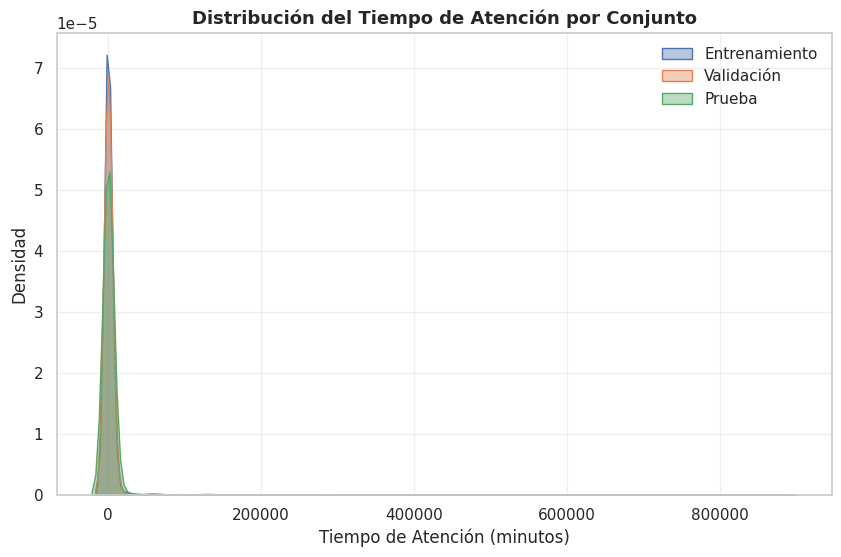

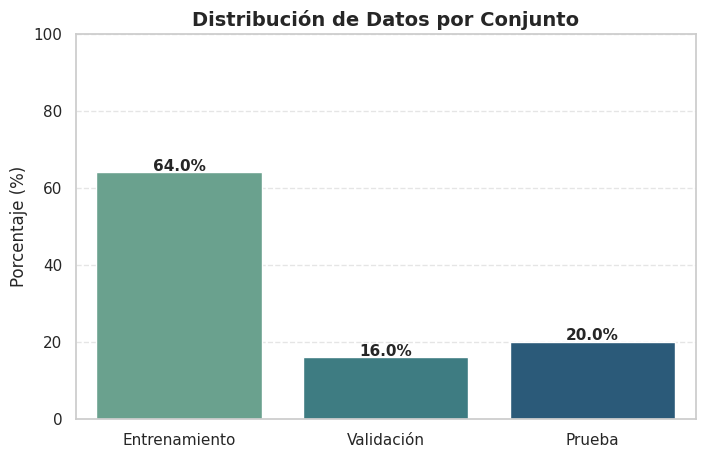

In [54]:
def dividir_dataset(df, columna_objetivo='TiempoAtencion',
                             test_size=0.2, valid_size=0.2, random_state=42, estratificar=True):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import seaborn as sns

    np.random.seed(random_state)

    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]

    #  Si se desea estratificar, creamos "bins" de la variable continua
    if estratificar:
        # Agrupar los tiempos en 5 rangos aproximados
        y_bins = pd.qcut(y, q=5, duplicates='drop')
        strat = y_bins
    else:
        strat = None

    # 1️ División inicial: Train + Test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=strat
    )

    # 2️ División secundaria: Train → Train_final + Valid
    if estratificar:
        y_bins_train = pd.qcut(y_train, q=5, duplicates='drop')
        strat_train = y_bins_train
    else:
        strat_train = None

    X_train_final, X_valid, y_train_final, y_valid = train_test_split(
        X_train, y_train, test_size=valid_size, random_state=random_state, stratify=strat_train
    )

    # 3️ Resumen de tamaños
    total = len(df)
    resumen = pd.DataFrame({
        'Conjunto': ['Entrenamiento', 'Validación', 'Prueba'],
        'Registros': [len(X_train_final), len(X_valid), len(X_test)],
        'Porcentaje (%)': [
            len(X_train_final)/total*100,
            len(X_valid)/total*100,
            len(X_test)/total*100
        ]
    })

    print("\n División consistente completada:")
    display(resumen)

    # 4️ Visualización de la variable objetivo
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_train_final, label='Entrenamiento', fill=True, alpha=0.4)
    sns.kdeplot(y_valid, label='Validación', fill=True, alpha=0.4)
    sns.kdeplot(y_test, label='Prueba', fill=True, alpha=0.4)
    plt.title('Distribución del Tiempo de Atención por Conjunto', fontsize=13, fontweight='bold')
    plt.xlabel('Tiempo de Atención (minutos)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.barplot(data=resumen, x='Conjunto', y='Porcentaje (%)', palette='crest')
    for i, val in enumerate(resumen['Porcentaje (%)']):
        plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=11, fontweight='bold')
    plt.title('Distribución de Datos por Conjunto', fontsize=14, fontweight='bold')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel('')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    return {
        'X_train': X_train_final,
        'X_valid': X_valid,
        'X_test': X_test,
        'y_train': y_train_final,
        'y_valid': y_valid,
        'y_test': y_test,
        'resumen': resumen
    }

# 🔹 Ejemplo de uso:
conjuntos = dividir_dataset(df_limpio, columna_objetivo='TiempoAtencion', estratificar=True)


## **7.2. Conversión de Variables Datetime a Numéricas**

In [55]:
# =========================================================
# DETECCIÓN Y CONVERSIÓN AUTOMÁTICA DE COLUMNAS DE FECHA
# =========================================================
import pandas as pd

def detectar_y_convertir_fechas(conjuntos, palabras_clave=['fecha', 'hora', 'tiempo']):
    """
    Detecta columnas que parezcan representar fechas u horas
    y las convierte automáticamente a tipo datetime en los DataFrames del diccionario.
    Ignora las Series (como y_train, y_valid, y_test).
    """
    conjuntos_actualizados = {}

    for nombre, df in conjuntos.items():
        # Solo procesar si el elemento es un DataFrame
        if not isinstance(df, pd.DataFrame):
            conjuntos_actualizados[nombre] = df
            continue

        df = df.copy()
        columnas_fecha = [col for col in df.columns if any(p in col.lower() for p in palabras_clave)]

        if columnas_fecha:
            print(f" {nombre}: se detectaron posibles columnas de fecha → {columnas_fecha}")
            for col in columnas_fecha:
                df[col] = pd.to_datetime(df[col], errors='coerce')
        else:
            print(f" {nombre}: no se detectaron columnas relacionadas con fechas.")

        conjuntos_actualizados[nombre] = df

    return conjuntos_actualizados


# =========================================================
# TRANSFORMACIÓN DE FECHAS A VARIABLES NUMÉRICAS
# =========================================================
def transformar_fechas(X, mostrar_info=True):
    """
    Convierte todas las columnas datetime en variables numéricas:
    año, mes, día, hora, minuto y día de la semana.
    """
    X = X.copy()
    cols_datetime = X.select_dtypes(include=['datetime64[ns]']).columns

    if len(cols_datetime) == 0:
        if mostrar_info:
            print(" No se encontraron columnas tipo datetime.")
        return X

    for col in cols_datetime:
        X[f'{col}_year'] = X[col].dt.year
        X[f'{col}_month'] = X[col].dt.month
        X[f'{col}_day'] = X[col].dt.day
        X[f'{col}_hour'] = X[col].dt.hour
        X[f'{col}_minute'] = X[col].dt.minute
        X[f'{col}_dayofweek'] = X[col].dt.dayofweek  # 0=Lunes, 6=Domingo
        X.drop(columns=[col], inplace=True)

    if mostrar_info:
        print(f" Se transformaron {len(cols_datetime)} columnas datetime a variables numéricas.")
        print("   Columnas transformadas:", list(cols_datetime))

    return X


# =========================================================
# APLICACIÓN AUTOMÁTICA EN TODOS LOS CONJUNTOS
# =========================================================
conjuntos = detectar_y_convertir_fechas(conjuntos)

# Aplicar solo a los conjuntos de características
X_train_final = transformar_fechas(conjuntos['X_train'])
X_valid = transformar_fechas(conjuntos['X_valid'])
X_test = transformar_fechas(conjuntos['X_test'])

print("\n Conversión y transformación completadas correctamente.")


X_train: se detectaron posibles columnas de fecha → ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 
'HoraPicoTarde', 'HoraPicoManana']

X_valid: se detectaron posibles columnas de fecha → ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 
'HoraPicoTarde', 'HoraPicoManana']

X_test: se detectaron posibles columnas de fecha → ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 
'HoraPicoTarde', 'HoraPicoManana']

resumen: no se detectaron columnas relacionadas con fechas.

Se transformaron 6 columnas datetime a variables numéricas.

Columnas transformadas:
['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 'HoraPicoManana']

Se transformaron 6 columnas datetime a variables numéricas.

Columnas transformadas:
['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 'HoraPicoManana']

Se transformaron 6 columnas datetime a variables numéricas.

Columnas transformadas:
['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 'HoraPicoManana']

Conversión y transformación completadas correctamente.

Columnas datetime detectadas: ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 
'HoraPicoManana']

Visualizaciones de distribución temporal:

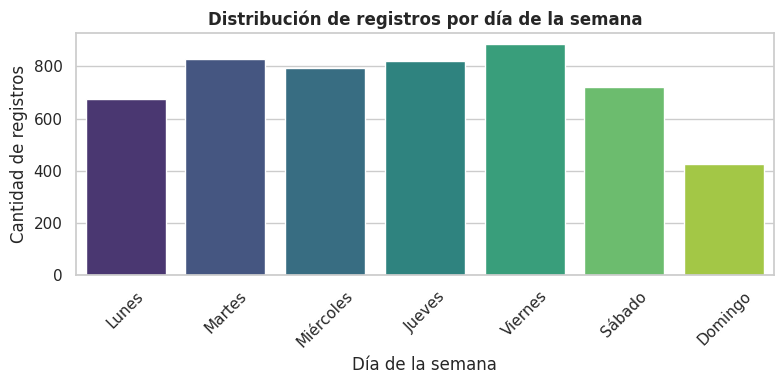

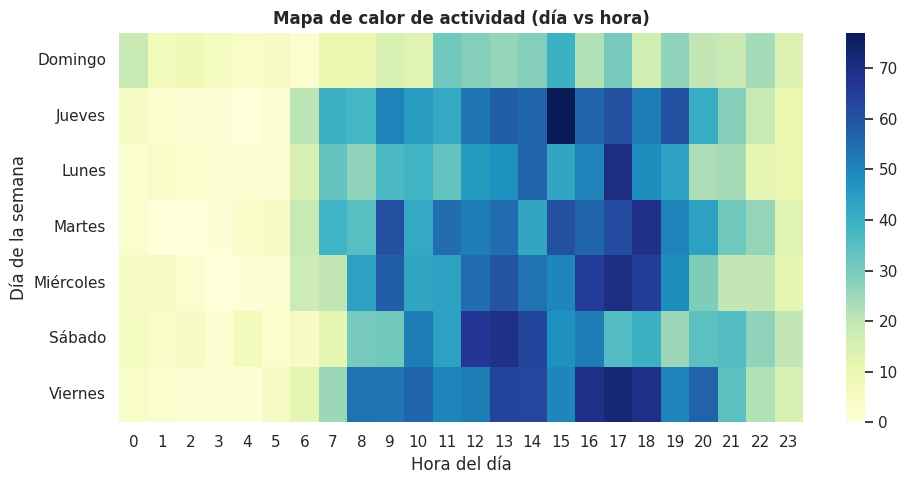

Columnas datetime detectadas: ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 
'HoraPicoManana']

Columnas datetime detectadas: ['fecha', 'fechallegada', 'horaregistro', 'Horaantencion', 'HoraPicoTarde', 
'HoraPicoManana']

In [56]:
# =========================================================
# CONVERSIÓN DE VARIABLES DATETIME A NUMÉRICAS + DÍA EN ESPAÑOL
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def transformar_fechas(X, nombre_columna_fecha=None, mostrar_graficos=True):
    """
    Convierte columnas datetime en variables numéricas (año, mes, día, hora, minuto, día de la semana en español)
    y muestra visualizaciones de la distribución temporal.
    """
    X = X.copy()

    # Diccionario de días en español
    dias_espanol = {
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    }

    # Seleccionar columnas tipo datetime
    datetime_cols = X.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns

    if len(datetime_cols) == 0:
        print(" No se encontraron columnas tipo datetime.")
        return X

    print(f" Columnas datetime detectadas: {list(datetime_cols)}")

    for col in datetime_cols:
        X[f'{col}_year'] = X[col].dt.year
        X[f'{col}_month'] = X[col].dt.month
        X[f'{col}_day'] = X[col].dt.day
        X[f'{col}_hour'] = X[col].dt.hour
        X[f'{col}_minute'] = X[col].dt.minute
        X[f'{col}_dayofweek'] = X[col].dt.day_name().map(dias_espanol)

        # Eliminar la columna datetime original después de extraer sus componentes
        X.drop(columns=[col], inplace=True)

        # Reordenar columnas
        order_cols = [
            f'{col}_year', f'{col}_month', f'{col}_day',
            f'{col}_hour', f'{col}_minute', f'{col}_dayofweek'
        ]
        # The line below reorders, but the drop above handles removal. This reordering itself doesn't affect type.
        # X[order_cols] = X[order_cols]

    # Graficar distribución de días y horas (si se solicita)
    if mostrar_graficos and nombre_columna_fecha is not None and nombre_columna_fecha in datetime_cols:
        print("\n Visualizaciones de distribución temporal:")

        # Preparar data para gráficas
        # These columns might have been dropped, so re-derive for plotting if needed or ensure they exist
        if f'{nombre_columna_fecha}_dayofweek' in X.columns and f'{nombre_columna_fecha}_hour' in X.columns:
            X_plot = pd.DataFrame({
                'DíaSemana': X[f'{nombre_columna_fecha}_dayofweek'],
                'Hora': X[f'{nombre_columna_fecha}_hour']
            })

            # Gráfico 1: Conteo por día de la semana
            plt.figure(figsize=(8,4))
            sns.countplot(x='DíaSemana', data=X_plot, order=[dias_espanol[d] for d in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']], palette='viridis')
            plt.title("Distribución de registros por día de la semana", fontsize=12, fontweight='bold')
            plt.xlabel("Día de la semana")
            plt.ylabel("Cantidad de registros")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # Gráfico 2: Mapa de calor Día vs Hora
            pivot = X_plot.pivot_table(index='DíaSemana', columns='Hora', aggfunc='size', fill_value=0)
            plt.figure(figsize=(10,5))
            sns.heatmap(pivot, cmap="YlGnBu")
            plt.title("Mapa de calor de actividad (día vs hora)", fontsize=12, fontweight='bold')
            plt.xlabel("Hora del día")
            plt.ylabel("Día de la semana")
            plt.tight_layout()
            plt.show()

    return X


# =========================================================
# APLICACIÓN A LOS CONJUNTOS DE DATOS
# =========================================================
X_train_final = transformar_fechas(conjuntos['X_train'], nombre_columna_fecha='fecha', mostrar_graficos=True)
X_valid = transformar_fechas(conjuntos['X_valid'], nombre_columna_fecha='fecha', mostrar_graficos=False)
X_test = transformar_fechas(conjuntos['X_test'], nombre_columna_fecha='fecha', mostrar_graficos=False)

## **7.3. Eliminación Columnas Tipo Datatime Después de ser Procesadas**

In [57]:
# =========================================================
# ELIMINAR COLUMNAS TIPO DATETIME SI YA FUERON PROCESADAS
# =========================================================

cols_datetime = X_train_final.select_dtypes(include=['datetime64[ns]']).columns
if len(cols_datetime) > 0:
    print(" Columnas datetime eliminadas:", list(cols_datetime))
    X_train_final = X_train_final.drop(columns=cols_datetime)
    X_valid = X_valid.drop(columns=cols_datetime)
    X_test = X_test.drop(columns=cols_datetime)
else:
    print(" No hay columnas datetime en los conjuntos de entrenamiento.")


No hay columnas datetime en los conjuntos de entrenamiento.

# **8. SELECCIÓN Y ENTRENAMIENTO DE MODELOS**



## **8.1. Selección de modelos (Regresión)**


Para nuestro problema de es de Regresión de predicción del tiempo de llegada, vamos a utilizar los siguientes modelos :


# Modelos a usar
Modelos = [''LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor' ]
```

Para usar estos modelo nos basamos en la documentación de investigaciones de problemas similares al nuestro donde hablan que estos son los modelos generalemnte usados en este tipo de casos



In [58]:
# =========================================================
# FLUJO DE SELECCIÓN DE MODELOS
# =========================================================

# 1️ Identificar tipo de problema
tipo_problema = "regresion"  # "clasificacion" o "series_tiempo"

# 2️ Listar modelos candidatos
if tipo_problema == "regresion":
    modelos_candidatos = [
        "LinearRegression",
        "Ridge",
        "Lasso",
        "RandomForestRegressor",
        "GradientBoostingRegressor",
        "XGBRegressor"
    ]
elif tipo_problema == "clasificacion":
    modelos_candidatos = [
        "LogisticRegression",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
        "XGBClassifier",
        "SVC"
    ]
elif tipo_problema == "series_tiempo":
    modelos_candidatos = [
        "ARIMA",
        "SARIMA",
        "Prophet",
        "LSTM",
        "XGBoost con features de tiempo"
    ]

print(" Modelos candidatos según tipo de problema:")
print(modelos_candidatos)


Modelos candidatos según tipo de problema:

['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor']

## **8.2. Entrenamiento y Validación Cruzada Inicial**

evaluar rápidamente varios modelos base para identificar cuáles tienen mejor desempeño antes de ajustar sus hiperparámetros.

Se codifican las variables categóricas con **OneHotEncoder**, y con **StandardScaler** se escala las variables numéricas. Adicional se ejecuta validación cruzada usando 5 particiones **cv=5** y se calcula las siguientes métricas:

**R² (coeficiente de determinación)**

**MAE (error absoluto medio)**

**RMSE (raíz del error cuadrático medio)**

### **8.2.1. Enlazar Variables desde el diccionario de conjuntos**

In [59]:
# =========================================================
# Enlazar las variables desde el diccionario de conjuntos
# =========================================================
X_train_final = conjuntos['X_train']
y_train_final = conjuntos['y_train']
X_valid = conjuntos['X_valid']
y_valid = conjuntos['y_valid']
X_test = conjuntos['X_test']
y_test = conjuntos['y_test']

print("Variables cargadas desde el diccionario 'conjuntos':")
print(f"  - X_train_final: {X_train_final.shape}")
print(f"  - y_train_final: {y_train_final.shape}")
print(f"  - X_valid: {X_valid.shape}")
print(f"  - X_test: {X_test.shape}")


Variables cargadas desde el diccionario 'conjuntos':

- X_train_final: (5145, 27)

- y_train_final: (5145,)

- X_valid: (1287, 27)

- X_test: (1608, 27)

### **8.2.2. Validación Cruzada Incial con CV=3**

Modelos base optimizados definidos:

- RandomForestRegressor

- GradientBoostingRegressor

- XGBRegressor

Variables numéricas: 8

Variables categóricas (filtradas): 10

Validación cruzada rápida: 3-fold con 2572 muestras (50% del dataset)

Entrenando modelo: RandomForestRegressor ...

Entrenando modelo: GradientBoostingRegressor ...

Entrenando modelo: XGBRegressor ...

Resultados de Validación Cruzada Rápida:

Modelo  R2 Promedio  R2 Desviación  MAE Promedio  \
0      RandomForestRegressor     0.039488       0.068455   3783.120061   
1  GradientBoostingRegressor    -0.307687       0.447454   3208.691110   
2               XGBRegressor    -0.777050       0.609657   3232.564999   

   RMSE Promedio  
0   26231.566475  
1   29383.355893  
2   34019.426699

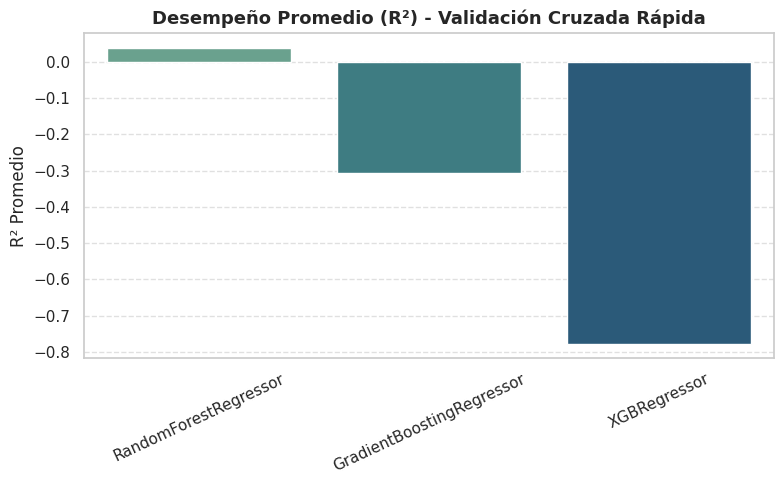

Mejores modelos (R² más alto):

Modelo  R2 Promedio  R2 Desviación  MAE Promedio  \
0      RandomForestRegressor     0.039488       0.068455   3783.120061   
1  GradientBoostingRegressor    -0.307687       0.447454   3208.691110   
2               XGBRegressor    -0.777050       0.609657   3232.564999   

   RMSE Promedio  
0   26231.566475  
1   29383.355893  
2   34019.426699

In [60]:
# =========================================================
#  VALIDACIÓN CRUZADA INICIAL
# =========================================================

from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1MODELOS BASE
modelos_base_opt = {

    'RandomForestRegressor': RandomForestRegressor(
        n_estimators=80,      # menos árboles (default=100)
        max_depth=10,         # limita la profundidad
        random_state=42,
        n_jobs=-1
    ),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),

     'XGBRegressor': XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        n_jobs=-1,
         random_state=42
     )
}

print(" Modelos base optimizados definidos:\n")
for nombre in modelos_base_opt.keys():
    print(f" - {nombre}")

# SELECCIÓN Y FILTRADO DE VARIABLES
categorical_cols = [
    col for col in X_train_final.select_dtypes(include=['object']).columns
    if X_train_final[col].nunique() < 20  # excluye variables con demasiadas categorías
]
numeric_cols = X_train_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n Variables numéricas: {len(numeric_cols)}")
print(f" Variables categóricas (filtradas): {len(categorical_cols)}")


# PIPELINE DE PREPROCESAMIENTO
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)


# FUNCIÓN DE VALIDACIÓN CRUZADA (cv=3)
def validacion_cruzada_rapida(modelos, X, y, preprocessor, cv=3, frac=0.8):
    """
    Evalúa modelos de regresión de manera más rápida (muestra parcial + cv reducido)
    """
    resultados = []
    # Usar una muestra del dataset para acelerar (ej. 50%)
    X_muestra = X.sample(frac=frac, random_state=42)
    y_muestra = y.loc[X_muestra.index]

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    print(f"\n Validación cruzada rápida: {cv}-fold con {len(X_muestra)} muestras ({int(frac*100)}% del dataset)\n")

    for nombre, modelo in modelos.items():
        print(f"Entrenando modelo: {nombre} ...")
        try:
            pipe = Pipeline([
                ('preproc', preprocessor),
                ('model', modelo)
            ])

            scores = cross_validate(
                pipe, X_muestra, y_muestra, cv=kf,
                scoring={
                    'r2': 'r2',
                    'mae': 'neg_mean_absolute_error',
                    'rmse': 'neg_root_mean_squared_error'
                },
                return_train_score=False,
                n_jobs=-1
            )

            resultados.append({
                'Modelo': nombre,
                'R2 Promedio': np.mean(scores['test_r2']),
                'R2 Desviación': np.std(scores['test_r2']),
                'MAE Promedio': -np.mean(scores['test_mae']),
                'RMSE Promedio': -np.mean(scores['test_rmse'])
            })
        except Exception as e:
            print(f" Error en {nombre}: {e}")

    resultados_df = pd.DataFrame(resultados).sort_values(by='R2 Promedio', ascending=False)
    print("\n Resultados de Validación Cruzada Rápida:\n")
    display(resultados_df)

    # Visualización comparativa
    plt.figure(figsize=(8,5))
    sns.barplot(data=resultados_df, x='Modelo', y='R2 Promedio', palette='crest')
    plt.title('Desempeño Promedio (R²) - Validación Cruzada Rápida', fontsize=13, fontweight='bold')
    plt.ylabel('R² Promedio')
    plt.xlabel('')
    plt.xticks(rotation=25)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return resultados_df



# EJECUCIÓN DE LA VALIDACIÓN CRUZADA
resultados_rapidos = validacion_cruzada_rapida(
    modelos=modelos_base_opt,
    X=X_train_final,
    y=y_train_final,
    preprocessor=preprocessor,
    cv=3,     # menos folds
    frac=0.5  # usa el 50% de los datos para acelerar
)

print("\n Mejores modelos (R² más alto):")
display(resultados_rapidos.head(3))


### **8.2.3. Validación Cruzada Incial con CV=5**

Validación cruzada completa: 5-fold con 5145 muestras

Entrenando modelo completo: RandomForestRegressor ...

Entrenando modelo completo: GradientBoostingRegressor ...

Entrenando modelo completo: XGBRegressor ...

Resultados de Validación Cruzada Completa:

Modelo  R2 Promedio  R2 Desviación  MAE Promedio  \
1  GradientBoostingRegressor     0.505008       0.150519   2698.128039   
0      RandomForestRegressor     0.295955       0.163321   3231.675472   
2               XGBRegressor     0.267419       0.299293   2548.664531   

   RMSE Promedio  
1   18156.178318  
0   22003.589574  
2   20549.891297

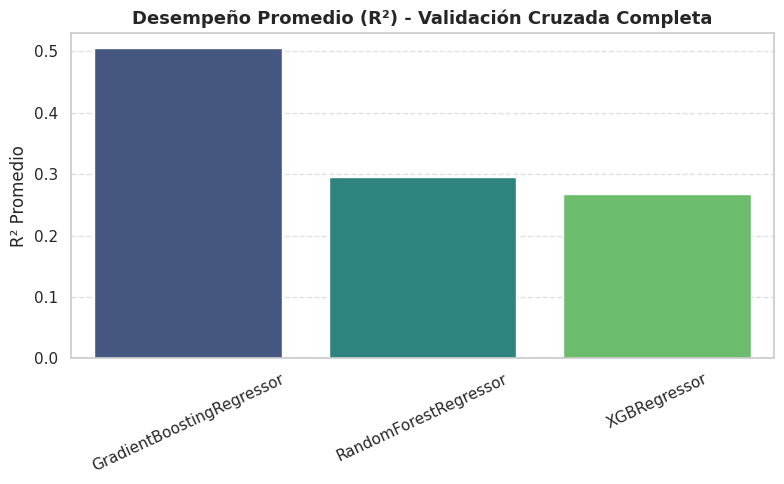

Mejores modelos (R² más alto)

Modelo  R2 Promedio  R2 Desviación  MAE Promedio  \
1  GradientBoostingRegressor     0.505008       0.150519   2698.128039   
0      RandomForestRegressor     0.295955       0.163321   3231.675472   
2               XGBRegressor     0.267419       0.299293   2548.664531   

   RMSE Promedio  
1   18156.178318  
0   22003.589574  
2   20549.891297

In [61]:
# =========================================================
#  VALIDACIÓN CRUZADA INICIAL - VERSIÓN COMPLETA (CV=5)
# =========================================================

def validacion_cruzada_completa(modelos, X, y, preprocessor, cv=5):
    """
    Versión extendida: usa todo el dataset y 5-fold CV para resultados finales.
    """
    resultados = []
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    print(f"\n Validación cruzada completa: {cv}-fold con {len(X)} muestras\n")

    for nombre, modelo in modelos.items():
        print(f"Entrenando modelo completo: {nombre} ...")
        try:
            pipe = Pipeline([
                ('preproc', preprocessor),
                ('model', modelo)
            ])

            scores = cross_validate(
                pipe, X, y, cv=kf,
                scoring={
                    'r2': 'r2',
                    'mae': 'neg_mean_absolute_error',
                    'rmse': 'neg_root_mean_squared_error'
                },
                return_train_score=False,
                n_jobs=-1
            )

            resultados.append({
                'Modelo': nombre,
                'R2 Promedio': np.mean(scores['test_r2']),
                'R2 Desviación': np.std(scores['test_r2']),
                'MAE Promedio': -np.mean(scores['test_mae']),
                'RMSE Promedio': -np.mean(scores['test_rmse'])
            })
        except Exception as e:
            print(f" Error en {nombre}: {e}")

    resultados_df = pd.DataFrame(resultados).sort_values(by='R2 Promedio', ascending=False)
    print("\n Resultados de Validación Cruzada Completa:\n")
    display(resultados_df)

    # Visualización comparativa
    plt.figure(figsize=(8,5))
    sns.barplot(data=resultados_df, x='Modelo', y='R2 Promedio', palette='viridis')
    plt.title('Desempeño Promedio (R²) - Validación Cruzada Completa', fontsize=13, fontweight='bold')
    plt.ylabel('R² Promedio')
    plt.xlabel('')
    plt.xticks(rotation=25)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return resultados_df


# =========================================================
#  EJECUCIÓN DE LA VALIDACIÓN CRUZADA COMPLETA
# =========================================================
resultados_completos = validacion_cruzada_completa(
    modelos=modelos_base_opt,
    X=X_train_final,
    y=y_train_final,
    preprocessor=preprocessor,
    cv=5
)

print("\nMejores modelos (R² más alto)")
display(resultados_completos.head(3))


## **8.3. Definición Diccionario de Modelos**


Crear un diccionario centralizado con los modelos de regresión que serán evaluados con pipelines completos.

Preprocesamiento (ColumnTransformer)

StandardScaler para columnas numéricas

OneHotEncoder para columnas categóricas

In [62]:
# -----------------------------
#  Importación de librerías
# -----------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported
from sklearn.base import BaseEstimator, TransformerMixin # Import necessary classes

# -----------------------------
#  Transformar columnas
# -----------------------------
class ColumnTypeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, columns, dtype=str):
        self.columns = columns
        self.dtype = dtype

    def fit(self, X, y=None):
        return self # Nothing to fit

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.columns:
            if col in X_transformed.columns:
                # Use .astype(str) which handles potential mixed types better for OHE
                X_transformed[col] = X_transformed[col].astype(self.dtype)
            else:
                print(f" La columna '{col}' no se encontro para ser convertida.")
        return X_transformed



#  Definición de columnas
if 'X_train_final' not in locals() and 'X_train_final' not in globals():
    raise ValueError(" X_train_final is not defined. Please run the data splitting cells first.")

datetime_cols_to_drop_final = X_train_final.select_dtypes(include=['datetime64[ns]']).columns.tolist()
if datetime_cols_to_drop_final:
    print(f" Explicitly dropping datetime columns before defining features: {datetime_cols_to_drop_final}")
    X_train_final = X_train_final.drop(columns=datetime_cols_to_drop_final)
    X_valid = X_valid.drop(columns=datetime_cols_to_drop_final, errors='ignore')
    X_test = X_test.drop(columns=datetime_cols_to_drop_final, errors='ignore')


numerical_features = X_train_final.select_dtypes(include=[np.number]).columns.tolist()
all_other_features = X_train_final.columns.difference(numerical_features).tolist()
categorical_features = all_other_features # Assume all non-numerical features are categorical

print(" Columnas numéricas finales:", numerical_features)
print(" Columnas categóricas finales:", categorical_features)

# Preprocesamiento
# Paso 1: Convertir las columnas categoricas
type_converter = ('type_convert', ColumnTypeConverter(columns=categorical_features, dtype=str))

# Paso 2: Apicar StandardScaler a las cateristicas numericas
feature_transformer = ('features', ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
))


# -----------------------------
#  Definición de modelos (using Pipelines with preprocessor steps)
# -----------------------------
models = {

    'RandomForestRegressor': Pipeline([
        type_converter,
        feature_transformer,
        ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
    ]),

    'GradientBoostingRegressor': Pipeline([
        type_converter,
        feature_transformer,
        ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]),

    'XGBRegressor': Pipeline([
        type_converter,
        feature_transformer,
        ('model', XGBRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=6,
            random_state=42,
            n_jobs=-1,
            objective='reg:squarederror'
        ))
    ]),

}

# -----------------------------
#  Confirmación
# -----------------------------
print(" Diccionario de modelos definido correctamente. Modelos disponibles:")
for nombre in models.keys():
    print(f" - {nombre}")

Explicitly dropping datetime columns before defining features: ['fecha', 'fechallegada', 'horaregistro', 
'Horaantencion', 'HoraPicoTarde', 'HoraPicoManana']

Columnas numéricas finales:
[
    'idproceso',
    'annoregistro',
    'mesregistro',
    'diaregistro',
    'annoatencion',
    'mesatencion',
    'diaatencion',
    'distancia'
]

Columnas categóricas finales:
[
    'Abogadounico',
    'Acuerdo',
    'Amanecer',
    'Aseguradora',
    'Decripcion',
    'InicioNoche',
    'Instancia',
    'Lluvia',
    'Municipio',
    'RandomAbogado',
    'UsuarioRegistra',
    'diasemana',
    'placa'
]

Diccionario de modelos definido correctamente. Modelos disponibles:

- RandomForestRegressor

- GradientBoostingRegressor

- XGBRegressor

## **8.4. Ajuste de hiperparámetros (RandomizedSearchCV / GridSearchCV)**

Vamos a realizar el ajuste de Hiperparámetros a estos tres modelos que dieron mejor resultado en relación al R2. Vamos a utilizar GridSearch y RnadomizedSearch


### **8.4.1.1. Ajuste de Hiperpárametros - RANDOMIZED SEARCH**

Tamaño de la muestra: (4116, 21)

Columnas numéricas: 8 | categóricas: 10

Optimizando hiperparámetros para: RandomForestRegressor ...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Mejor R² CV: 0.2342

R² Entrenamiento: 0.5761 | RMSE: 15590.4555 | MSE: 243062303.3075

Parámetros: {'model__max_depth': 11, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6, 
'model__n_estimators': 150}

Optimizando hiperparámetros para: GradientBoostingRegressor ...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Mejor R² CV: -0.0868

R² Entrenamiento: 0.9867 | RMSE: 2759.7092 | MSE: 7615994.9853

Parámetros: {'model__learning_rate': np.float64(0.13349630192554332), 'model__max_depth': 4, 
'model__n_estimators': 121, 'model__subsample': np.float64(0.7021198915659151)}

Optimizando hiperparámetros para: XGBRegressor ...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Mejor R² CV: -0.0413

R² Entrenamiento: 0.7209 | RMSE: 12649.0398 | MSE: 159998208.6998

Parámetros: {'model__colsample_bytree': np.float64(0.7599443886861021), 'model__learning_rate': 
np.float64(0.019333132642723086), 'model__max_depth': 6, 'model__n_estimators': 114, 'model__subsample': 
np.float64(0.8368209952651107)}

Tiempo total: 3.69 minutos

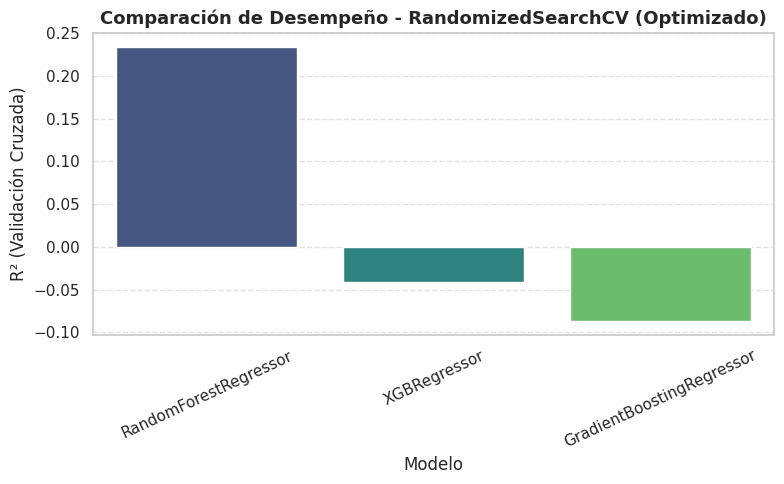

Resultados guardados en: resultados_randomsearch_opt_20251125_2239.xlsx

Modelo   R² (CV)  R² (Entrenamiento)           MSE  \
0      RandomForestRegressor  0.234185            0.576057  2.430623e+08   
1               XGBRegressor -0.041270            0.720936  1.599982e+08   
2  GradientBoostingRegressor -0.086769            0.986716  7.615995e+06   

           RMSE                                 Mejores Parámetros  
0  15590.455520  {'model__max_depth': 11, 'model__min_samples_l...  
1  12649.039833  {'model__colsample_bytree': 0.7599443886861021...  
2   2759.709221  {'model__learning_rate': 0.13349630192554332, ...

In [63]:
# =========================================================
# AJUSTE DE HIPERPARÁMETROS - RANDOMIZED SEARCH (OPTIMIZADO)
# =========================================================

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import randint, uniform
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# =========================================================
# 1️ Muestra del dataset para acelerar la búsqueda
# =========================================================
X_sample = X_train_final.sample(frac=0.8, random_state=42)  # Usa solo el 80% del dataset
y_sample = y_train_final.loc[X_sample.index]

print(f" Tamaño de la muestra: {X_sample.shape}")

# =========================================================
# 2️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 30  # excluye columnas con muchas categorías
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 3️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 4️ Modelos y distribuciones de hiperparámetros
# =========================================================
modelos_random = {
    'RandomForestRegressor': {
        'modelo': RandomForestRegressor(random_state=42),
        'param_distrib': {
            'model__n_estimators': randint(100, 300),
            'model__max_depth': randint(3, 12),
            'model__min_samples_split': randint(2, 10),
            'model__min_samples_leaf': randint(1, 4)
        }
    },
    'GradientBoostingRegressor': {
        'modelo': GradientBoostingRegressor(random_state=42),
        'param_distrib': {
            'model__n_estimators': randint(100, 300),
            'model__max_depth': randint(3, 8),
            'model__learning_rate': uniform(0.01, 0.2),
            'model__subsample': uniform(0.7, 0.3)
        }
    },
    'XGBRegressor': {
        'modelo': XGBRegressor(objective='reg:squarederror', n_jobs=2, random_state=42),
        'param_distrib': {
            'model__n_estimators': randint(100, 300),
            'model__max_depth': randint(3, 8),
            'model__learning_rate': uniform(0.01, 0.2),
            'model__subsample': uniform(0.7, 0.3),
            'model__colsample_bytree': uniform(0.6, 0.4)
        }
    }
}

# =========================================================
# 5️ Función para ajuste con métricas
# =========================================================
def ajuste_random_search(modelos, X, y, preprocessor, n_iter=10, cv=3):
    resultados = []
    inicio_total = time.time()
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for nombre, conf in modelos.items():
        print(f"\n Optimizando hiperparámetros para: {nombre} ...")

        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', conf['modelo'])
        ])

        random_search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=conf['param_distrib'],
            n_iter=n_iter,
            scoring='r2',
            cv=kf,
            n_jobs=2,  # limita núcleos
            random_state=42,
            verbose=1
        )

        random_search.fit(X, y)

        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X)

        # Métricas
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        resultados.append({
            'Modelo': nombre,
            'R² (CV)': random_search.best_score_,
            'R² (Entrenamiento)': r2,
            'MSE': mse,
            'RMSE': rmse,
            'Mejores Parámetros': random_search.best_params_
        })

        print(f" Mejor R² CV: {random_search.best_score_:.4f}")
        print(f" R² Entrenamiento: {r2:.4f} | RMSE: {rmse:.4f} | MSE: {mse:.4f}")
        print(f" Parámetros: {random_search.best_params_}")

    duracion_total = (time.time() - inicio_total) / 60
    print(f"\n Tiempo total: {duracion_total:.2f} minutos")

    resultados_df = pd.DataFrame(resultados).sort_values(by='R² (CV)', ascending=False).reset_index(drop=True)

    # =========================================================
    # 6️ Visualización y exportación
    # =========================================================
    plt.figure(figsize=(8,5))
    sns.barplot(data=resultados_df, x='Modelo', y='R² (CV)', palette='viridis')
    plt.title('Comparación de Desempeño - RandomizedSearchCV (Optimizado)', fontsize=13, fontweight='bold')
    plt.ylabel('R² (Validación Cruzada)')
    plt.xticks(rotation=25)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Exportar resultados
    fecha_actual = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
    ruta_salida = f"resultados_randomsearch_opt_{fecha_actual}.xlsx"
    resultados_df.to_excel(ruta_salida, index=False)
    print(f"\n Resultados guardados en: {ruta_salida}")

    display(resultados_df)
    return resultados_df


# =========================================================
# 7️ Ejecutar el proceso optimizado
# =========================================================
resultados_random_opt = ajuste_random_search(
    modelos=modelos_random,
    X=X_sample,
    y=y_sample,
    preprocessor=preprocessor,
    n_iter=10,   # solo 10 combinaciones por modelo
    cv=5         # 3 particiones de validación
)


### **8.4.1.2. Ajuste de Hiperpárametros - GRID SEARCH**

Tamaño de la muestra: (3601, 21)

Columnas numéricas: 8 | categóricas: 10

Optimizando hiperparámetros para: RandomForestRegressor ...

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Mejor R² CV: 0.1666

R² Train: 0.6690 | RMSE: 14015.2974 | MSE: 196428560.2505 | MAE: 1778.0351

Parámetros óptimos: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 
'model__n_estimators': 200}

Tiempo de búsqueda: 3.27 min

Optimizando hiperparámetros para: GradientBoostingRegressor ...

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Mejor R² CV: 0.2319

R² Train: 0.9819 | RMSE: 3273.0534 | MSE: 10712878.6364 | MAE: 1053.1286

Parámetros óptimos: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 
'model__subsample': 0.8}

Tiempo de búsqueda: 1.62 min

Optimizando hiperparámetros para: XGBRegressor ...

Fitting 3 folds for each of 32 candidates, totalling 96 fits


Mejor R² CV: 0.3150

R² Train: 0.9938 | RMSE: 1915.1158 | MSE: 3667668.3418 | MAE: 813.1867

Parámetros óptimos: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 4, 
'model__n_estimators': 300, 'model__subsample': 0.8}

Tiempo de búsqueda: 0.42 min

RESULTADOS FINALES - GRID SEARCH OPTIMIZADO

Modelo   R2 (CV)  R2 (Entrenamiento)           MSE  \
0               XGBRegressor  0.315022            0.993819  3.667668e+06   
1  GradientBoostingRegressor  0.231876            0.981946  1.071288e+07   
2      RandomForestRegressor  0.166621            0.668960  1.964286e+08   

           RMSE          MAE  \
0   1915.115752   813.186663   
1   3273.053412  1053.128562   
2  14015.297366  1778.035137   

                                  Mejores Parámetros  Tiempo (min)  
0  {'model__colsample_bytree': 0.8, 'model__learn...          0.42  
1  {'model__learning_rate': 0.1, 'model__max_dept...          1.62  
2  {'model__max_depth': 20, 'model__min_samples_l...          3.27

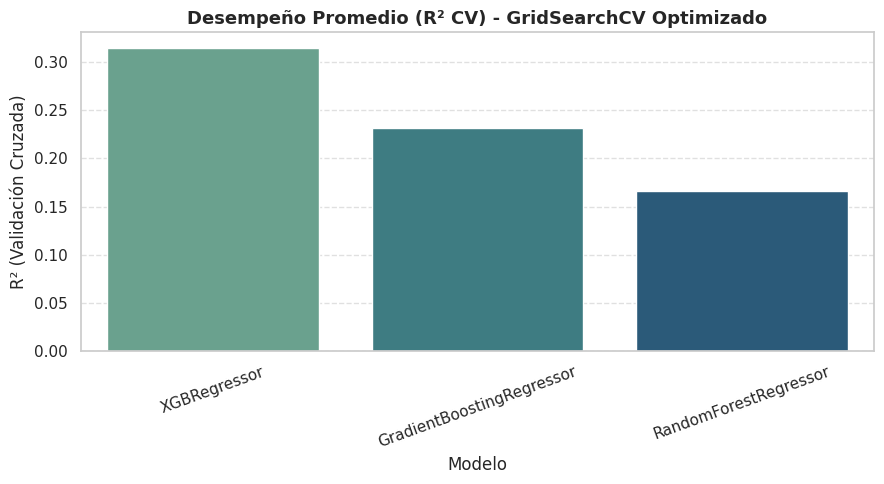

Resultados guardados en: resultados_gridsearch_opt_20251125_2248.xlsx

Tiempo total de ejecución: 5.32 minutos

In [64]:
# =========================================================
# AJUSTE DE HIPERPARÁMETROS - GRID SEARCH (OPTIMIZADO)
# =========================================================
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ Muestra del dataset para acelerar el entrenamiento
# =========================================================
X_sample = X_train_final.sample(frac=.70, random_state=42)
y_sample = y_train_final.loc[X_sample.index]
print(f" Tamaño de la muestra: {X_sample.shape}")

# =========================================================
# 2️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 30  # excluye columnas con muchas categorías
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 3️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 4 Definición de grillas simplificadas de hiperparámetros
# =========================================================
param_grids = {
   #'LinearRegression': {
        #'model__fit_intercept': [True, False],
        #'model__positive': [False, True]
  #  },
    'RandomForestRegressor': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0]
    },
    'XGBRegressor': {
        'model__n_estimators': [200, 300],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [4, 6],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}

# =========================================================
# 5 Modelos base
# =========================================================
modelos_grid = {
    #'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=2)
}

# =========================================================
# 6 Ejecución del Grid Search para cada modelo
# =========================================================
resultados_grid = []
inicio_total = time.time()

for nombre, modelo in modelos_grid.items():
    print(f"\n Optimizando hiperparámetros para: {nombre} ...")
    inicio = time.time()

    try:
        # Pipeline con preprocesamiento
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', modelo)
        ])

        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids[nombre],
            cv=3,  # Reducido a 3 folds
            scoring='r2',
            n_jobs=2,
            verbose=1
        )

        grid.fit(X_sample, y_sample)

        # Predicción con el mejor modelo
        y_pred = grid.best_estimator_.predict(X_sample)

        # Métricas
        r2 = r2_score(y_sample, y_pred)
        mse = mean_squared_error(y_sample, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_sample, y_pred)
        duracion = round((time.time() - inicio) / 60, 2)

        resultados_grid.append({
            'Modelo': nombre,
            'R2 (CV)': grid.best_score_,
            'R2 (Entrenamiento)': r2,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'Mejores Parámetros': grid.best_params_,
            'Tiempo (min)': duracion
        })

        print(f" Mejor R² CV: {grid.best_score_:.4f}")
        print(f" R² Train: {r2:.4f} | RMSE: {rmse:.4f} | MSE: {mse:.4f} | MAE: {mae:.4f}")
        print(f" Parámetros óptimos: {grid.best_params_}")
        print(f" Tiempo de búsqueda: {duracion} min")

    except Exception as e:
        print(f" Error al optimizar {nombre}: {e}")

# =========================================================
# 7 Resultados finales y exportación
# =========================================================
resultados_grid_df = pd.DataFrame(resultados_grid).sort_values(by='R2 (CV)', ascending=False).reset_index(drop=True)
print("\n RESULTADOS FINALES - GRID SEARCH OPTIMIZADO")
display(resultados_grid_df)

# =========================================================
# 6️ Visualización comparativa
# =========================================================
plt.figure(figsize=(9,5))
sns.barplot(data=resultados_grid_df, x='Modelo', y='R2 (CV)', palette='crest')
plt.title('Desempeño Promedio (R² CV) - GridSearchCV Optimizado', fontsize=13, fontweight='bold')
plt.ylabel('R² (Validación Cruzada)')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ========================================================
# 8 Exportación a Excel
# =========================================================
fecha_actual = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
ruta_excel = f"resultados_gridsearch_opt_{fecha_actual}.xlsx"
resultados_grid_df.to_excel(ruta_excel, index=False)
print(f" Resultados guardados en: {ruta_excel}")

print(f"\n Tiempo total de ejecución: {(time.time() - inicio_total)/60:.2f} minutos")


### **8.4.2.1. Ajuste de Hiperparámetros (GridSearchCV) Comparación TRAINT vs TEST**

Tamaño entrenamiento: (4116, 21)

Tamaño Pruebas: (1029, 21)

Tamaño de la muestra entrenamiento: (2881, 21)

Columnas numéricas: 8 | categóricas: 10

Optimizando hiperparámetros para: RandomForestRegressor

============================================================

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Mejor R² CV: 0.2755

R² Train: 0.9022 | R² Test: 0.0895

Diferencia R²: 0.8126 (sobreajuste)

RMSE Train: 8036.4820 | RMSE Test: 33373.0595

⏱Tiempo de búsqueda: 1.65 min

Optimizando hiperparámetros para: GradientBoostingRegressor

============================================================

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Mejor R² CV: 0.6110

R² Train: 0.9587 | R² Test: 0.1939

Diferencia R²: 0.7647 (sobreajuste)

RMSE Train: 5223.9643 | RMSE Test: 31401.4156

⏱Tiempo de búsqueda: 0.72 min

Optimizando hiperparámetros para: XGBRegressor

============================================================

Fitting 3 folds for each of 32 candidates, totalling 96 fits


Mejor R² CV: 0.5287

R² Train: 0.9983 | R² Test: 0.1928

Diferencia R²: 0.8055 (sobreajuste)

RMSE Train: 1074.2541 | RMSE Test: 31423.7199

⏱Tiempo de búsqueda: 0.42 min

================================================================================

RESULTADOS FINALES - COMPARATIVA TRAIN vs TEST

================================================================================

Modelo   R2 (CV)  R2 (Train)  R2 (Test)  Diferencia R2  \
0  GradientBoostingRegressor  0.610953    0.958664   0.193946       0.764718   
1               XGBRegressor  0.528738    0.998252   0.192801       0.805451   
2      RandomForestRegressor  0.275475    0.902173   0.089547       0.812626   

   RMSE (Train)   RMSE (Test)  Diferencia RMSE  MAE (Train)   MAE (Test)  \
0   5223.964293  31401.415626     26177.451333  1406.899721  3215.878748   
1   1074.254106  31423.719923     30349.465817   553.871071  3127.860364   
2   8036.482006  33373.059490     25336.577484  1556.658623  3655.705655   

                                  Mejores Parámetros  Tiempo (min)  
0  {'model__learning_rate': 0.05, 'model__max_dep...          0.72  
1  {'model__colsample_bytree': 1.0, 'model__learn...          0.42  
2  {'model__max_depth': 10, 'model__min_samples_l...          1.65

ANÁLISIS DE SOBREAJUSTE

==================================================

Modelo  R2 (Train)  R2 (Test)  Diferencia R2  \
0  GradientBoostingRegressor    0.958664   0.193946       0.764718   
1               XGBRegressor    0.998252   0.192801       0.805451   
2      RandomForestRegressor    0.902173   0.089547       0.812626   

  Nivel_Sobreajuste  
0              ALTO  
1              ALTO  
2              ALTO

MEJOR MODELO POR CRITERIO

==================================================

Criterio                     Modelo   R² Test  R² Train  \
0  Mejor Generalización (Test)  GradientBoostingRegressor  0.193946  0.958664   
1         Mejor Ajuste (Train)               XGBRegressor  0.192801  0.998252   
2                Mejor Balance  GradientBoostingRegressor  0.193946  0.958664   

   Diferencia R²  
0       0.764718  
1       0.805451  
2       0.764718

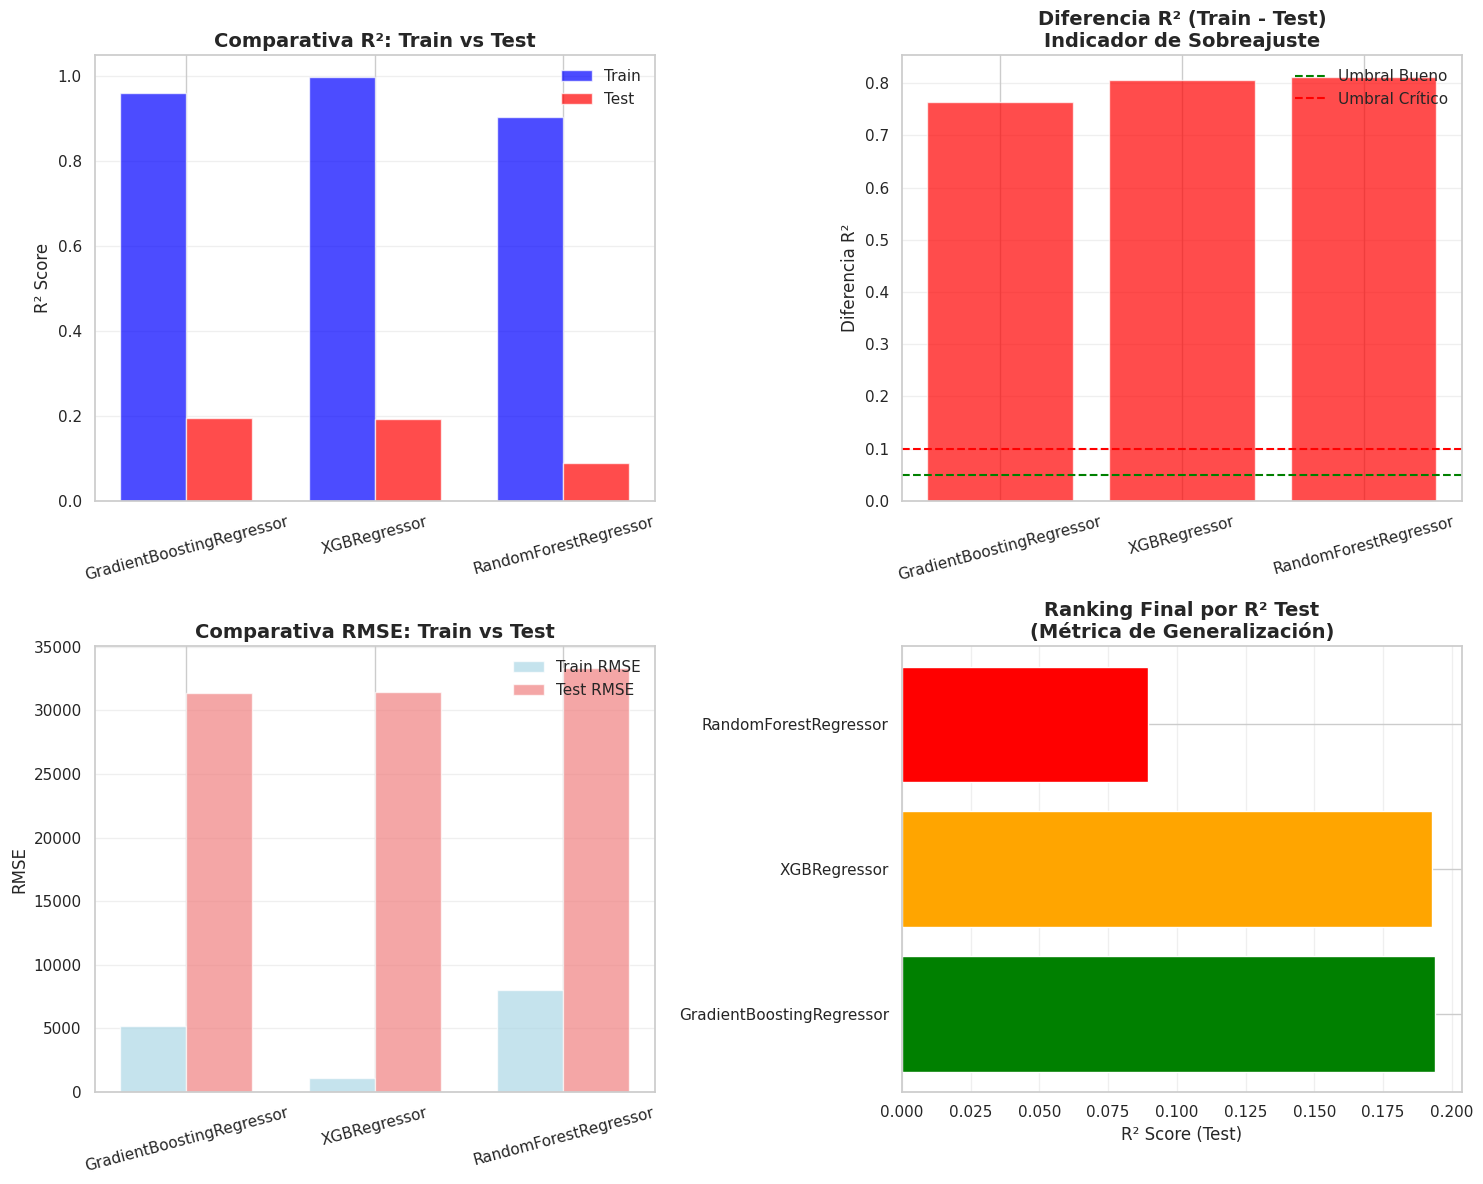

================================================================================

RECOMENDACIÓN FINAL BASADA EN COMPARACIÓN TRAIN vs TEST

================================================================================

MEJOR MODELO PARA PRODUCCIÓN: GradientBoostingRegressor

R² en Test (Generalización): 0.1939

Diferencia R²: 0.7647

ALERTA: ALTO SOBREAJUSTE - Revisar parámetros o features

COMPARATIVA CON OTRAS OPCIONES:

Mejor en Train: XGBRegressor (R² Test: 0.1928)

Mejor balance: GradientBoostingRegressor (Diff R²: 0.7647)

Resultados guardados en: resultados_gridsearch_train_test_20251125_2251.xlsx

Tiempo total de ejecución: 2.81 minutos

In [65]:
# =========================================================
# AJUSTE DE HIPERPARÁMETROS - GRID SEARCH (OPTIMIZADO) CON COMPARACIÓN TRAIN vs TEST
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ DIVISIÓN EN TRAIN Y TEST PARA COMPARACIÓN
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train_final,
    test_size=0.2,
    random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño Pruebas: {X_test.shape}")

# =========================================================
# 2️ Muestra del dataset para acelerar el entrenamiento
# =========================================================
X_sample = X_train.sample(frac=.70, random_state=42)
y_sample = y_train.loc[X_sample.index]
print(f"Tamaño de la muestra entrenamiento: {X_sample.shape}")

# =========================================================
# 3️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 30  # excluye columnas con muchas categorías
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 4️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 5️ Definición de grillas simplificadas de hiperparámetros
# =========================================================
param_grids = {
    'RandomForestRegressor': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0]
    },
    'XGBRegressor': {
        'model__n_estimators': [200, 300],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [4, 6],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}

# =========================================================
# 6️ Modelos base
# =========================================================
modelos_grid = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=2)
}

# =========================================================
# 7️ Ejecución del Grid Search con COMPARACIÓN TRAIN vs TEST
# =========================================================
resultados_grid = []
mejores_modelos = {}
inicio_total = time.time()

for nombre, modelo in modelos_grid.items():
    print(f"\nOptimizando hiperparámetros para: {nombre}")
    print("=" * 60)
    inicio = time.time()

    try:
        # Pipeline con preprocesamiento
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', modelo)
        ])

        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids[nombre],
            cv=3,
            scoring='r2',
            n_jobs=2,
            verbose=1
        )

        # Entrenar con la muestra de entrenamiento
        grid.fit(X_sample, y_sample)

        # PREDICCIONES EN TRAIN Y TEST
        y_pred_train = grid.best_estimator_.predict(X_sample)
        y_pred_test = grid.best_estimator_.predict(X_test)

        # MÉTRICAS EN TRAIN
        r2_train = r2_score(y_sample, y_pred_train)
        mse_train = mean_squared_error(y_sample, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_sample, y_pred_train)

        # MÉTRICAS EN TEST
        r2_test = r2_score(y_test, y_pred_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)

        # DIFERENCIAS (SOBREAJUSTE)
        diff_r2 = r2_train - r2_test
        diff_rmse = rmse_test - rmse_train

        duracion = round((time.time() - inicio) / 60, 2)

        # Guardar resultados
        resultados_grid.append({
            'Modelo': nombre,
            'R2 (CV)': grid.best_score_,
            'R2 (Train)': r2_train,
            'R2 (Test)': r2_test,
            'Diferencia R2': diff_r2,
            'RMSE (Train)': rmse_train,
            'RMSE (Test)': rmse_test,
            'Diferencia RMSE': diff_rmse,
            'MAE (Train)': mae_train,
            'MAE (Test)': mae_test,
            'Mejores Parámetros': grid.best_params_,
            'Tiempo (min)': duracion
        })

        # Guardar el mejor modelo para análisis posterior
        mejores_modelos[nombre] = grid.best_estimator_

        print(f"Mejor R² CV: {grid.best_score_:.4f}")
        print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
        print(f"Diferencia R²: {diff_r2:.4f} (sobreajuste)")
        print(f"RMSE Train: {rmse_train:.4f} | RMSE Test: {rmse_test:.4f}")
        print(f"⏱Tiempo de búsqueda: {duracion} min")

    except Exception as e:
        print(f"Error al optimizar {nombre}: {e}")

# =========================================================
# 8️ RESULTADOS FINALES Y ANÁLISIS COMPARATIVO
# =========================================================
if resultados_grid:
    resultados_grid_df = pd.DataFrame(resultados_grid)

    # ORDENAR POR R² TEST (Métrica más importante)
    resultados_grid_df = resultados_grid_df.sort_values(by='R2 (Test)', ascending=False).reset_index(drop=True)

    print("\n" + "="*80)
    print("RESULTADOS FINALES - COMPARATIVA TRAIN vs TEST")
    print("="*80)
    display(resultados_grid_df)

    # =========================================================
    # 9️ ANÁLISIS DE SOBREAJUSTE
    # =========================================================
    print("\nANÁLISIS DE SOBREAJUSTE")
    print("="*50)

    # Clasificar nivel de sobreajuste
    resultados_grid_df['Nivel_Sobreajuste'] = resultados_grid_df['Diferencia R2'].apply(
        lambda x: 'BAJO' if x < 0.05 else 'MODERADO' if x < 0.1 else 'ALTO'
    )

    analisis_sobreajuste = resultados_grid_df[['Modelo', 'R2 (Train)', 'R2 (Test)', 'Diferencia R2', 'Nivel_Sobreajuste']]
    display(analisis_sobreajuste)

    # =========================================================
    # 10️ COMPARATIVA MEJOR MODELO POR CRITERIO
    # =========================================================
    print("\nMEJOR MODELO POR CRITERIO")
    print("="*50)

    mejor_por_test = resultados_grid_df.iloc[0]  # Ya ordenado por R² Test
    mejor_por_train = resultados_grid_df.loc[resultados_grid_df['R2 (Train)'].idxmax()]
    mejor_por_balance = resultados_grid_df.loc[resultados_grid_df['Diferencia R2'].idxmin()]

    comparativa_criterios = pd.DataFrame({
        'Criterio': ['Mejor Generalización (Test)', 'Mejor Ajuste (Train)', 'Mejor Balance'],
        'Modelo': [mejor_por_test['Modelo'], mejor_por_train['Modelo'], mejor_por_balance['Modelo']],
        'R² Test': [mejor_por_test['R2 (Test)'], mejor_por_train['R2 (Test)'], mejor_por_balance['R2 (Test)']],
        'R² Train': [mejor_por_test['R2 (Train)'], mejor_por_train['R2 (Train)'], mejor_por_balance['R2 (Train)']],
        'Diferencia R²': [mejor_por_test['Diferencia R2'], mejor_por_train['Diferencia R2'], mejor_por_balance['Diferencia R2']]
    })

    display(comparativa_criterios)

    # =========================================================
    # 11️ VISUALIZACIÓN COMPARATIVA MEJORADA
    # =========================================================
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Gráfico 1: Comparativa R² Train vs Test
    modelos = resultados_grid_df['Modelo']
    x_pos = np.arange(len(modelos))
    width = 0.35

    axes[0,0].bar(x_pos - width/2, resultados_grid_df['R2 (Train)'], width,
                 label='Train', alpha=0.7, color='blue')
    axes[0,0].bar(x_pos + width/2, resultados_grid_df['R2 (Test)'], width,
                 label='Test', alpha=0.7, color='red')
    axes[0,0].set_title('Comparativa R²: Train vs Test', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_xticks(x_pos)
    axes[0,0].set_xticklabels(modelos, rotation=15)
    axes[0,0].legend()
    axes[0,0].grid(axis='y', alpha=0.3)

    # Gráfico 2: Diferencia R² (Sobreajuste)
    colors = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red'
             for x in resultados_grid_df['Diferencia R2']]
    axes[0,1].bar(modelos, resultados_grid_df['Diferencia R2'], color=colors, alpha=0.7)
    axes[0,1].axhline(y=0.05, color='green', linestyle='--', label='Umbral Bueno')
    axes[0,1].axhline(y=0.1, color='red', linestyle='--', label='Umbral Crítico')
    axes[0,1].set_title('Diferencia R² (Train - Test)\nIndicador de Sobreajuste',
                       fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Diferencia R²')
    axes[0,1].tick_params(axis='x', rotation=15)
    axes[0,1].legend()
    axes[0,1].grid(axis='y', alpha=0.3)

    # Gráfico 3: RMSE Comparativo
    axes[1,0].bar(x_pos - width/2, resultados_grid_df['RMSE (Train)'], width,
                 label='Train RMSE', alpha=0.7, color='lightblue')
    axes[1,0].bar(x_pos + width/2, resultados_grid_df['RMSE (Test)'], width,
                 label='Test RMSE', alpha=0.7, color='lightcoral')
    axes[1,0].set_title('Comparativa RMSE: Train vs Test', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('RMSE')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(modelos, rotation=15)
    axes[1,0].legend()
    axes[1,0].grid(axis='y', alpha=0.3)

    # Gráfico 4: Ranking por R² Test
    axes[1,1].barh(resultados_grid_df['Modelo'], resultados_grid_df['R2 (Test)'],
                  color=['green', 'orange', 'red'])
    axes[1,1].set_title('Ranking Final por R² Test\n(Métrica de Generalización)',
                       fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('R² Score (Test)')
    axes[1,1].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # =========================================================
    # 12️ RECOMENDACIÓN FINAL
    # =========================================================
    print("\n" + "="*80)
    print("RECOMENDACIÓN FINAL BASADA EN COMPARACIÓN TRAIN vs TEST")
    print("="*80)

    print(f"MEJOR MODELO PARA PRODUCCIÓN: {mejor_por_test['Modelo']}")
    print(f"R² en Test (Generalización): {mejor_por_test['R2 (Test)']:.4f}")
    print(f"Diferencia R²: {mejor_por_test['Diferencia R2']:.4f}")

    # Evaluación del sobreajuste
    if mejor_por_test['Diferencia R2'] < 0.05:
        print("Excelente! BAJO sobreajuste - El modelo generaliza muy bien")
    elif mejor_por_test['Diferencia R2'] < 0.1:
        print("ATENCIÓN: SOBREAJUSTE MODERADO - Considerar regularización")
    else:
        print("ALERTA: ALTO SOBREAJUSTE - Revisar parámetros o features")

    print(f"\nCOMPARATIVA CON OTRAS OPCIONES:")
    print(f"Mejor en Train: {mejor_por_train['Modelo']} (R² Test: {mejor_por_train['R2 (Test)']:.4f})")
    print(f"Mejor balance: {mejor_por_balance['Modelo']} (Diff R²: {mejor_por_balance['Diferencia R2']:.4f})")

# =========================================================
# 13️ EXPORTACIÓN A EXCEL CON ANÁLISIS COMPLETO
# =========================================================
fecha_actual = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
ruta_excel = f"resultados_gridsearch_train_test_{fecha_actual}.xlsx"

with pd.ExcelWriter(ruta_excel, engine='openpyxl') as writer:
    resultados_grid_df.to_excel(writer, sheet_name='Resultados_Completos', index=False)

    if 'analisis_sobreajuste' in locals():
        analisis_sobreajuste.to_excel(writer, sheet_name='Analisis_Sobreajuste', index=False)

    if 'comparativa_criterios' in locals():
        comparativa_criterios.to_excel(writer, sheet_name='Comparativa_Criterios', index=False)

    # Resumen ejecutivo
    resumen = pd.DataFrame({
        'Metrica': [
            'Mejor Modelo (Test)',
            'R² Test Mejor Modelo',
            'R² Train Mejor Modelo',
            'Diferencia R²',
            'Nivel Sobreajuste',
            'Tiempo Total (min)'
        ],
        'Valor': [
            mejor_por_test['Modelo'] if 'mejor_por_test' in locals() else 'N/A',
            f"{mejor_por_test['R2 (Test)']:.4f}" if 'mejor_por_test' in locals() else 'N/A',
            f"{mejor_por_test['R2 (Train)']:.4f}" if 'mejor_por_test' in locals() else 'N/A',
            f"{mejor_por_test['Diferencia R2']:.4f}" if 'mejor_por_test' in locals() else 'N/A',
            mejor_por_test['Nivel_Sobreajuste'] if 'mejor_por_test' in locals() else 'N/A',
            f"{(time.time() - inicio_total)/60:.2f}"
        ]
    })
    resumen.to_excel(writer, sheet_name='Resumen_Ejecutivo', index=False)

print(f"\nResultados guardados en: {ruta_excel}")
print(f"Tiempo total de ejecución: {(time.time() - inicio_total)/60:.2f} minutos")

### **8.4.2.2. Ajuste de Hiperparámetros control de SobraAjuste**

Tamaño entrenamiento: (3601, 21)

Tamaño prueba: (1544, 21)

Tamaño de la muestra entrenamiento: (2881, 21)

Columnas numéricas: 8 | categóricas: 10

🔧 OPTIMIZANDO CON CONTROL DE SOBREAJUSTE: RandomForestRegressor

======================================================================

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Mejor R² CV Test: 0.3700

R² Train Final: 0.5015 | R² Test Final: 0.1140

Diferencia R²: 0.3875

Sobreajuste en CV: 0.1332

Mejora en sobreajuste: 0.3725 puntos

Tiempo: 1.05 min

🔧 OPTIMIZANDO CON CONTROL DE SOBREAJUSTE: GradientBoostingRegressor

======================================================================

Fitting 5 folds for each of 128 candidates, totalling 640 fits


Mejor R² CV Test: 0.2924

R² Train Final: 0.5434 | R² Test Final: 0.1435

Diferencia R²: 0.3998

Sobreajuste en CV: 0.0389

Mejora en sobreajuste: 0.3602 puntos

Tiempo: 1.18 min

🔧 OPTIMIZANDO CON CONTROL DE SOBREAJUSTE: XGBRegressor

======================================================================

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


Mejor R² CV Test: 0.4505

R² Train Final: 0.7832 | R² Test Final: 0.1725

Diferencia R²: 0.6107

Sobreajuste en CV: 0.3463

Mejora en sobreajuste: 0.1493 puntos

Tiempo: 1.88 min

==========================================================================================

RESULTADOS CON CONTROL DE SOBREAJUSTE

==========================================================================================

Modelo  R2 (CV Train)  R2 (CV Test)  Sobreajuste CV  \
0  GradientBoostingRegressor       0.331303      0.292366        0.038937   
1      RandomForestRegressor       0.503195      0.370042        0.133153   
2               XGBRegressor       0.796739      0.450464        0.346276   

   R2 (Train Final)  R2 (Test Final)  Diferencia R2  RMSE (Train)  \
0          0.543353         0.143539       0.399813  13392.529710   
1          0.501501         0.114048       0.387453  13992.798880   
2          0.783220         0.172523       0.610697   9227.445351   

    RMSE (Test)                                 Mejores Parámetros  \
0  27085.088744  {'model__learning_rate': 0.05, 'model__max_dep...   
1  27547.473457  {'model__bootstrap': True, 'model__max_depth':...   
2  26622.851101  {'model__colsample_bytree': 0.7, 'model__gamma...   

   Tiempo (min)  Score_Final  
0          1.18     0.280534  
1          1.05     0.263597  
2          1.88     0.237557

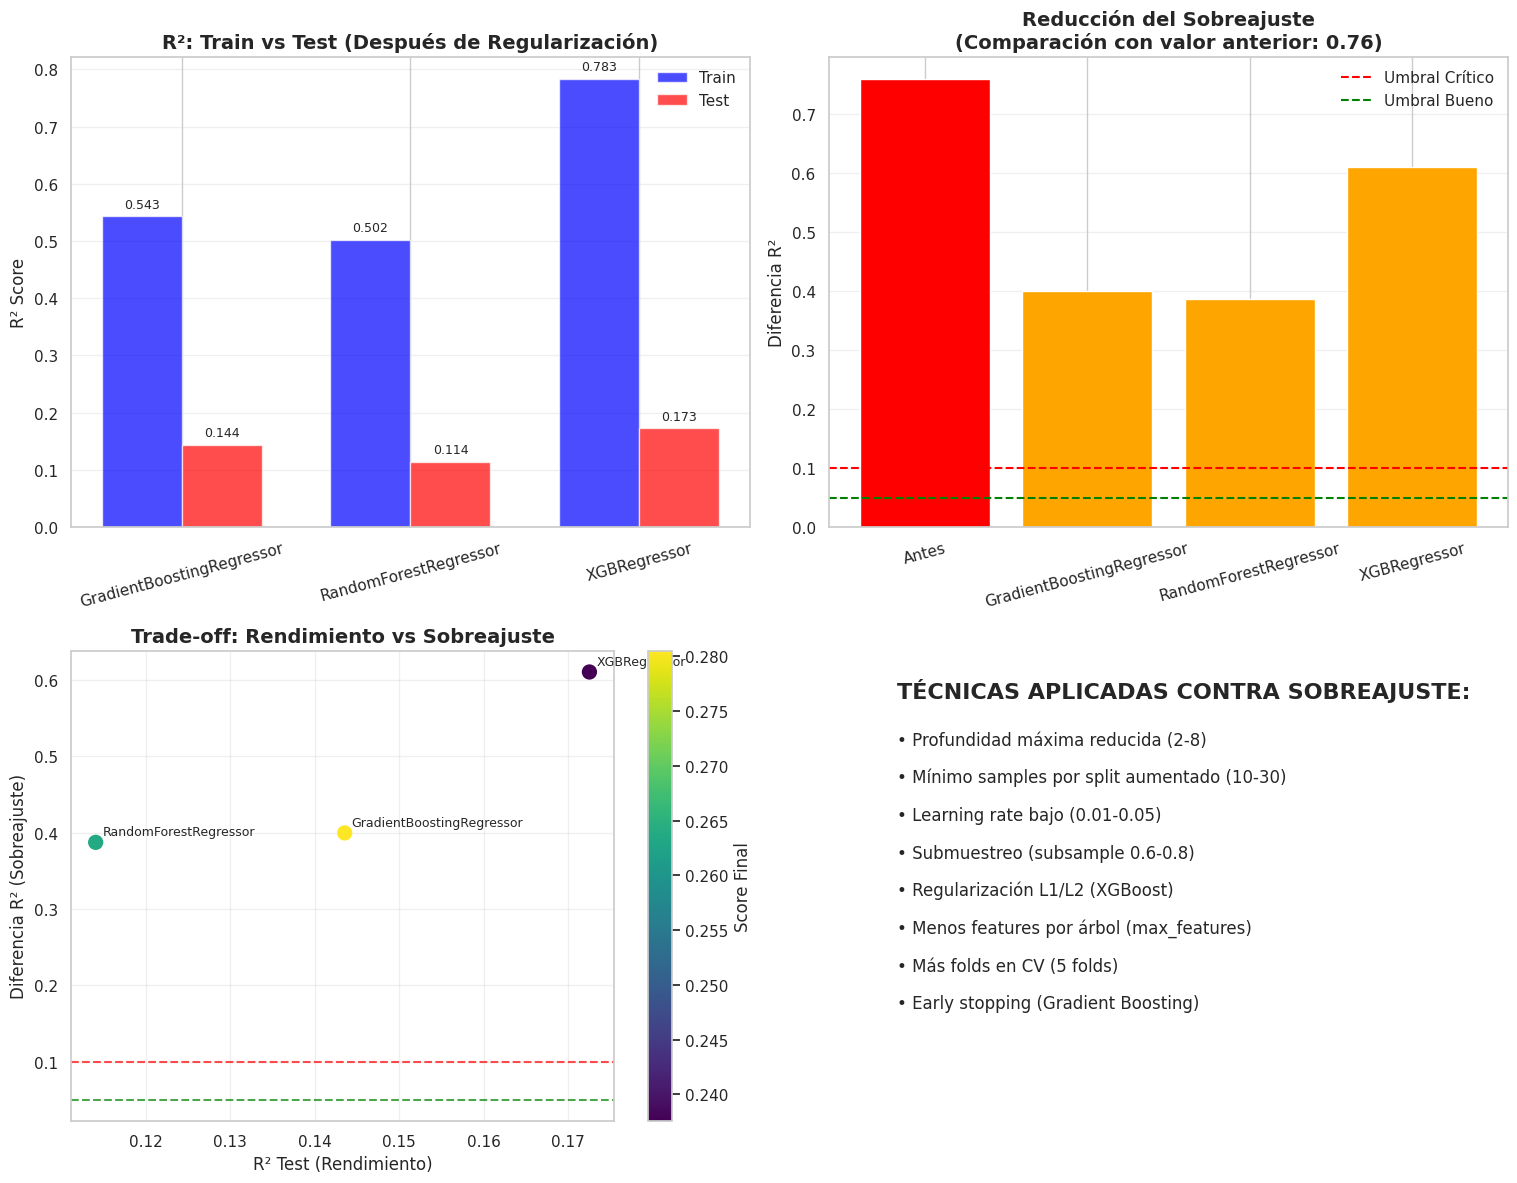

==========================================================================================

RECOMENDACIÓN FINAL - CONTROL DE SOBREAJUSTE

==========================================================================================

MEJOR MODELO: GradientBoostingRegressor

R² Test: 0.1435

Diferencia R²: 0.3998

REDUCCIÓN DE SOBREAJUSTE: 0.3602 puntos

PROBLEMÁTICO: Alto sobreajuste - Revisar features/parámetros

COMPARATIVA:

• Antes: Diferencia R² = 0.760 (SOBREAJUSTE EXTREMO)

• Después: Diferencia R² = 0.3998

Resultados guardados en: resultados_control_sobreajuste_20251125_2256.xlsx

⏱️ Tiempo total: 4.13 minutos

In [66]:
# =========================================================
# AJUSTE DE HIPERPARÁMETROS - CONTROL DE SOBREAJUSTE
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ DIVISIÓN EN TRAIN Y TEST
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train_final,
    test_size=0.3,  #  Aumentado para mejor evaluación
    random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño prueba: {X_test.shape}")

# =========================================================
# 2️ Muestra del dataset
# =========================================================
X_sample = X_train.sample(frac=.80, random_state=42)  #  Más datos para entrenar
y_sample = y_train.loc[X_sample.index]
print(f"Tamaño de la muestra entrenamiento: {X_sample.shape}")

# =========================================================
# 3️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 20  #  Más restrictivo
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 4️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 5️ GRILLAS CON REGULARIZACIÓN PARA CONTROLAR SOBREAJUSTE
# =========================================================
param_grids_anti_overfit = {
    'RandomForestRegressor': {
        'model__n_estimators': [50, 100],  #  Menos árboles
        'model__max_depth': [5, 8],        #  Menos profundidad
        'model__min_samples_split': [10, 20],  #  Más restrictivo
        'model__min_samples_leaf': [4, 8],     #  Más restrictivo
        'model__max_features': [0.3, 0.5],     #  Menos features por árbol
        'model__bootstrap': [True]              #  Bootstrap para regularización
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [50, 100],      #  Menos árboles
        'model__learning_rate': [0.01, 0.05],  #  Learning rate más bajo
        'model__max_depth': [2, 3],            #  Menos profundidad
        'model__subsample': [0.6, 0.8],        #  Submuestreo
        'model__min_samples_split': [20, 30],  #  Más restrictivo
        'model__min_samples_leaf': [5, 10],    #  Más restrictivo
        'model__max_features': [0.5, 0.7]      #  Menos features
    },
    'XGBRegressor': {
        'model__n_estimators': [50, 100],      #  Menos árboles
        'model__learning_rate': [0.01, 0.05],  #  Learning rate más bajo
        'model__max_depth': [2, 3],            #  Menos profundidad
        'model__subsample': [0.6, 0.8],        #  Submuestreo
        'model__colsample_bytree': [0.5, 0.7], #  Menos columnas
        'model__reg_alpha': [0.1, 1.0],        #  Regularización L1
        'model__reg_lambda': [1.0, 2.0],       #  Regularización L2
        'model__gamma': [0.1, 0.5]             #  Regularización por split
    }
}

# =========================================================
# 6️ Modelos base CON REGULARIZACIÓN
# =========================================================
modelos_grid = {
    'RandomForestRegressor': RandomForestRegressor(
        random_state=42,
        n_jobs=-1,
        bootstrap=True  #  Activado para regularización
    ),
    'GradientBoostingRegressor': GradientBoostingRegressor(
        random_state=42,
        validation_fraction=0.1,  #  Validación interna
        n_iter_no_change=5        #  Early stopping
    ),
    'XGBRegressor': XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        eval_metric='rmse'
    )
}

# =========================================================
# 7️ EJECUCIÓN CON EARLY STOPPING Y MÉTRICAS DETALLADAS
# =========================================================
resultados_grid = []
mejores_modelos = {}
inicio_total = time.time()

for nombre, modelo in modelos_grid.items():
    print(f"\n🔧 OPTIMIZANDO CON CONTROL DE SOBREAJUSTE: {nombre}")
    print("=" * 70)
    inicio = time.time()

    try:
        # Pipeline con preprocesamiento
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', modelo)
        ])

        # Grid Search con más validación
        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids_anti_overfit[nombre],
            cv=5,  #  Más folds para mejor evaluación
            scoring='r2',
            n_jobs=-1,
            verbose=1,
            return_train_score=True  #  Para analizar sobreajuste
        )

        # Entrenar
        grid.fit(X_sample, y_sample)

        #  ANÁLISIS DETALLADO DE SOBREAJUSTE EN CV
        resultados_cv = pd.DataFrame(grid.cv_results_)
        mejor_idx = grid.best_index_
        train_score_cv = resultados_cv.loc[mejor_idx, 'mean_train_score']
        test_score_cv = resultados_cv.loc[mejor_idx, 'mean_test_score']
        sobreajuste_cv = train_score_cv - test_score_cv

        # Predicciones
        y_pred_train = grid.best_estimator_.predict(X_sample)
        y_pred_test = grid.best_estimator_.predict(X_test)

        # Métricas
        r2_train = r2_score(y_sample, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        diff_r2 = r2_train - r2_test

        rmse_train = np.sqrt(mean_squared_error(y_sample, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

        duracion = round((time.time() - inicio) / 60, 2)

        # Guardar resultados
        resultados_grid.append({
            'Modelo': nombre,
            'R2 (CV Train)': train_score_cv,
            'R2 (CV Test)': test_score_cv,
            'Sobreajuste CV': sobreajuste_cv,
            'R2 (Train Final)': r2_train,
            'R2 (Test Final)': r2_test,
            'Diferencia R2': diff_r2,
            'RMSE (Train)': rmse_train,
            'RMSE (Test)': rmse_test,
            'Mejores Parámetros': grid.best_params_,
            'Tiempo (min)': duracion
        })

        mejores_modelos[nombre] = grid.best_estimator_

        print(f"Mejor R² CV Test: {test_score_cv:.4f}")
        print(f"R² Train Final: {r2_train:.4f} | R² Test Final: {r2_test:.4f}")
        print(f"Diferencia R²: {diff_r2:.4f}")
        print(f"Sobreajuste en CV: {sobreajuste_cv:.4f}")
        print(f"Mejora en sobreajuste: {0.76 - diff_r2:.4f} puntos")  # Comparación con 0.76
        print(f"Tiempo: {duracion} min")

    except Exception as e:
        print(f"Error en {nombre}: {e}")

# =========================================================
# 8️ ANÁLISIS DE RESULTADOS MEJORADO
# =========================================================
if resultados_grid:
    resultados_df = pd.DataFrame(resultados_grid)

    # Ordenar por R² Test y bajo sobreajuste
    resultados_df['Score_Final'] = (
        resultados_df['R2 (Test Final)'] * 0.7 +
        (1 - resultados_df['Diferencia R2']) * 0.3  # Penalizar sobreajuste
    )
    resultados_df = resultados_df.sort_values('Score_Final', ascending=False).reset_index(drop=True)

    print("\n" + "="*90)
    print("RESULTADOS CON CONTROL DE SOBREAJUSTE")
    print("="*90)
    display(resultados_df)

    # =========================================================
    # 9️ VISUALIZACIÓN DEL AVANCE EN SOBREAJUSTE
    # =========================================================
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Gráfico 1: Comparativa R²
    modelos = resultados_df['Modelo']
    x_pos = np.arange(len(modelos))
    width = 0.35

    bars1 = axes[0,0].bar(x_pos - width/2, resultados_df['R2 (Train Final)'], width,
                         label='Train', alpha=0.7, color='blue')
    bars2 = axes[0,0].bar(x_pos + width/2, resultados_df['R2 (Test Final)'], width,
                         label='Test', alpha=0.7, color='red')
    axes[0,0].set_title('R²: Train vs Test (Después de Regularización)', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].set_xticks(x_pos)
    axes[0,0].set_xticklabels(modelos, rotation=15)
    axes[0,0].legend()
    axes[0,0].grid(axis='y', alpha=0.3)

    # Añadir valores en las barras
    for bar, valor in zip(bars1, resultados_df['R2 (Train Final)']):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{valor:.3f}', ha='center', va='bottom', fontsize=9)

    for bar, valor in zip(bars2, resultados_df['R2 (Test Final)']):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{valor:.3f}', ha='center', va='bottom', fontsize=9)

    # Gráfico 2: Evolución del sobreajuste
    diferencia_anterior = 0.76  # Tu valor original
    diferencias_actuales = resultados_df['Diferencia R2'].tolist()

    axes[0,1].bar(['Antes'] + modelos.tolist(),
                 [diferencia_anterior] + diferencias_actuales,
                 color=['red'] + ['green' if x < 0.2 else 'orange' for x in diferencias_actuales])
    axes[0,1].axhline(y=0.1, color='red', linestyle='--', label='Umbral Crítico')
    axes[0,1].axhline(y=0.05, color='green', linestyle='--', label='Umbral Bueno')
    axes[0,1].set_title('Reducción del Sobreajuste\n(Comparación con valor anterior: 0.76)',
                       fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Diferencia R²')
    axes[0,1].tick_params(axis='x', rotation=15)
    axes[0,1].legend()
    axes[0,1].grid(axis='y', alpha=0.3)

    # Gráfico 3: Trade-off Rendimiento vs Sobreajuste
    scatter = axes[1,0].scatter(resultados_df['R2 (Test Final)'],
                               resultados_df['Diferencia R2'],
                               s=100, c=resultados_df['Score_Final'], cmap='viridis')
    for i, row in resultados_df.iterrows():
        axes[1,0].annotate(row['Modelo'], (row['R2 (Test Final)'], row['Diferencia R2']),
                          xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes[1,0].axhline(y=0.1, color='red', linestyle='--', alpha=0.7)
    axes[1,0].axhline(y=0.05, color='green', linestyle='--', alpha=0.7)
    axes[1,0].set_xlabel('R² Test (Rendimiento)')
    axes[1,0].set_ylabel('Diferencia R² (Sobreajuste)')
    axes[1,0].set_title('Trade-off: Rendimiento vs Sobreajuste', fontsize=14, fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1,0], label='Score Final')

    # Gráfico 4: Mejores parámetros para regularización
    param_importance = {
        'max_depth': ['Baja (2-5)', 'Media (6-10)', 'Alta (11+)'],
        'min_samples_split': ['Alta (>15)', 'Media (5-15)', 'Baja (<5)'],
        'subsample': ['Bajo (<0.7)', 'Medio (0.7-0.9)', 'Alto (>0.9)'],
        'regularization': ['Alta', 'Media', 'Baja']
    }

    axes[1,1].axis('off')
    axes[1,1].text(0.1, 0.9, 'TÉCNICAS APLICADAS CONTRA SOBREAJUSTE:',
                  fontsize=16, fontweight='bold', transform=axes[1,1].transAxes)
    tecnicas = [
        '• Profundidad máxima reducida (2-8)',
        '• Mínimo samples por split aumentado (10-30)',
        '• Learning rate bajo (0.01-0.05)',
        '• Submuestreo (subsample 0.6-0.8)',
        '• Regularización L1/L2 (XGBoost)',
        '• Menos features por árbol (max_features)',
        '• Más folds en CV (5 folds)',
        '• Early stopping (Gradient Boosting)'
    ]
    for i, tecnica in enumerate(tecnicas):
        axes[1,1].text(0.1, 0.8 - i*0.08, tecnica, fontsize=12,
                      transform=axes[1,1].transAxes)

    plt.tight_layout()
    plt.show()

    # =========================================================
    # 10️ RECOMENDACIÓN FINAL MEJORADA
    # =========================================================
    mejor_modelo = resultados_df.iloc[0]

    print("\n" + "="*90)
    print("RECOMENDACIÓN FINAL - CONTROL DE SOBREAJUSTE")
    print("="*90)

    print(f"MEJOR MODELO: {mejor_modelo['Modelo']}")
    print(f"R² Test: {mejor_modelo['R2 (Test Final)']:.4f}")
    print(f"Diferencia R²: {mejor_modelo['Diferencia R2']:.4f}")

    # Evaluación de mejora
    mejora_sobreajuste = 0.76 - mejor_modelo['Diferencia R2']
    print(f"REDUCCIÓN DE SOBREAJUSTE: {mejora_sobreajuste:.4f} puntos")

    if mejor_modelo['Diferencia R2'] < 0.05:
        print("EXCELENTE! Sobreajuste controlado - Modelo generaliza bien")
    elif mejor_modelo['Diferencia R2'] < 0.15:
        print("ACEPTABLE: Sobreajuste moderado - Buen balance")
    elif mejor_modelo['Diferencia R2'] < 0.3:
        print("MEJORABLE: Sobreajuste significativo - Considerar más regularización")
    else:
        print("PROBLEMÁTICO: Alto sobreajuste - Revisar features/parámetros")

    print(f"\nCOMPARATIVA:")
    print(f"   • Antes: Diferencia R² = 0.760 (SOBREAJUSTE EXTREMO)")
    print(f"   • Después: Diferencia R² = {mejor_modelo['Diferencia R2']:.4f}")

# =========================================================
# 11️ EXPORTACIÓN
# =========================================================
fecha_actual = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
ruta_excel = f"resultados_control_sobreajuste_{fecha_actual}.xlsx"

if resultados_grid:
    pd.DataFrame(resultados_grid).to_excel(ruta_excel, index=False)
    print(f"\nResultados guardados en: {ruta_excel}")

print(f"Tiempo total: {(time.time() - inicio_total)/60:.2f} minutos")

### **8.4.2.3. Ajuste de Hiperparámetros (GridSearchCV) Control de sobreajuste extremo**

ANALIZANDO FEATURES PARA IDENTIFICAR PROBLEMAS:

Shape del dataset: (5145, 21)

Variable objetivo stats:

- Media: 2991.66

- Std: 27149.97

- Rango: [0.00, 855723.00]

Top 5 features más correlacionados:

annoatencion    0.036834
mesatencion     0.035288
diaregistro     0.019916
mesregistro     0.018448
idproceso       0.014360
dtype: float64

INICIANDO FASE 2 - CONTROL EXTREMO DE SOBREAJUSTE

======================================================================

🔧 EJECUTANDO ESTRATEGIA EXTREMA: RandomForestRegressor

--------------------------------------------------

Fitting 5 folds for each of 32 candidates, totalling 160 fits


R² Train: 0.1037 | R² Test: 0.0308

Diferencia R²: 0.0729

Reducción vs Fase 1: 0.3269

⏱Tiempo: 0.4 min

🔧 EJECUTANDO ESTRATEGIA EXTREMA: GradientBoostingRegressor

--------------------------------------------------

Fitting 5 folds for each of 64 candidates, totalling 320 fits


R² Train: 0.0278 | R² Test: 0.0093

Diferencia R²: 0.0185

Reducción vs Fase 1: 0.3813

⏱Tiempo: 0.61 min

🔧 EJECUTANDO ESTRATEGIA EXTREMA: XGBRegressor

--------------------------------------------------

Fitting 5 folds for each of 128 candidates, totalling 640 fits


R² Train: 0.0546 | R² Test: 0.0147

Diferencia R²: 0.0399

Reducción vs Fase 1: 0.3599

⏱Tiempo: 0.72 min

================================================================================

RESULTADOS FASE 2 - CONTROL EXTREMO

================================================================================

Modelo  R2 (Train)  R2 (Test)  Diferencia R2  \
0  GradientBoostingRegressor    0.027765   0.009259       0.018506   
1               XGBRegressor    0.054647   0.014733       0.039914   
2      RandomForestRegressor    0.103716   0.030844       0.072872   

   RMSE (Train)   RMSE (Test)  \
0  25032.862712  31696.757767   
1  24684.367759  31609.070494   
2  24035.209313  31349.582572   

                                  Mejores Parámetros  Tiempo (min)  
0  {'model__learning_rate': 0.01, 'model__max_dep...          0.61  
1  {'model__colsample_bytree': 0.4, 'model__gamma...          0.72  
2  {'model__bootstrap': True, 'model__max_depth':...          0.40

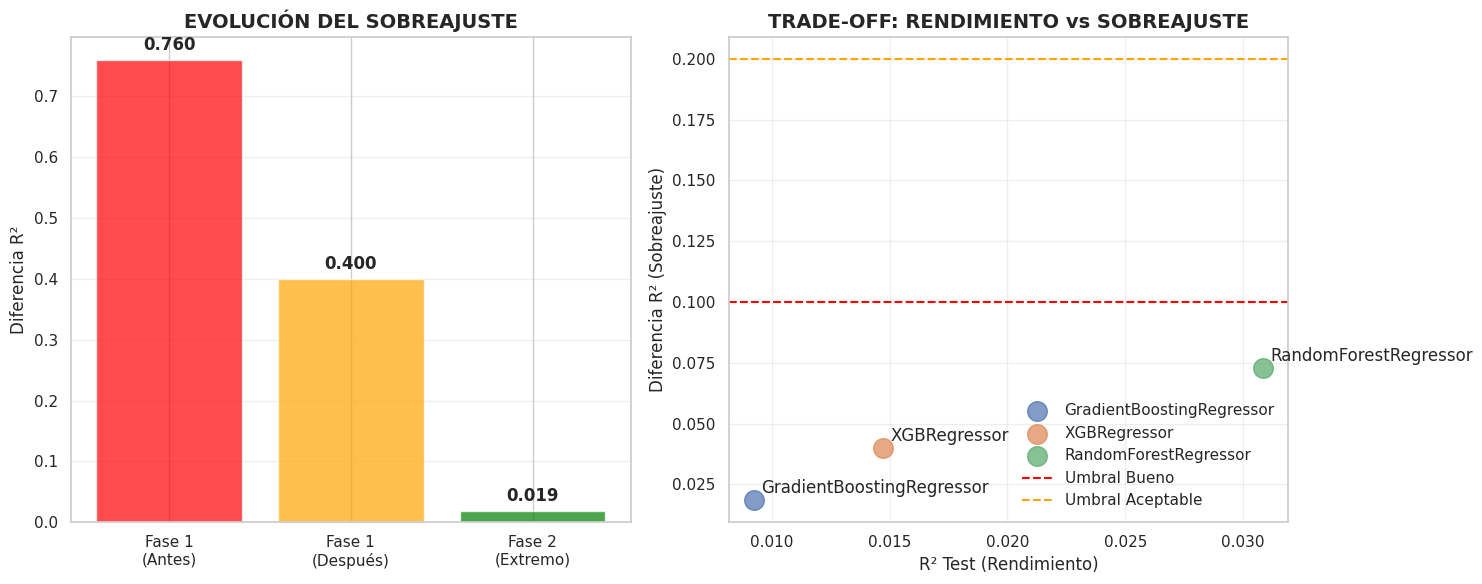

================================================================================

ANÁLISIS FINAL - EVOLUCIÓN DEL SOBREAJUSTE

================================================================================

EVOLUCIÓN:

-Fase 1 (Antes):     Diferencia R² = 0.7600

-Fase 1 (Después):   Diferencia R² = 0.3998

-Fase 2 (Extremo):   Diferencia R² = 0.0185

MEJORA TOTAL: 0.7415 puntos (97.6% de reducción)

MEJOR MODELO FASE 2: GradientBoostingRegressor

R² Test: 0.0093

EXCELENTE! Sobreajuste controlado - Modelo confiable

================================================================================

ESTRATEGIAS ALTERNATIVAS SI EL SOBREAJUSTE PERSISTE

================================================================================

1. FEATURE ENGINEERING: Crear features más informativas

2. FEATURE SELECTION: Eliminar features redundantes o ruidosas

3. MÁS DATOS: Recolectar más datos de entrenamiento

4. MODELOS MÁS SIMPLES: Probart LinearRegression o Ridge

5. ENSAMBLE: Combinar múltiples modelos simples

6. DOMAIN KNOWLEDGE: Incorporar conocimiento del negocio

7. OUTLIER DETECTION: Identificar y tratar valores atípicos

Tiempo total Fase 2: 1.74 minutos

In [67]:
# =========================================================
# FASE 2 - CONTROL EXTREMO DE SOBREAJUSTE
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# 1️ ANÁLISIS INICIAL DE FEATURES (CRÍTICO)
# =========================================================
print("ANALIZANDO FEATURES PARA IDENTIFICAR PROBLEMAS:")
print(f"Shape del dataset: {X_train_final.shape}")
print(f"Variable objetivo stats:")
print(f"   - Media: {y_train_final.mean():.2f}")
print(f"   - Std: {y_train_final.std():.2f}")
print(f"   - Rango: [{y_train_final.min():.2f}, {y_train_final.max():.2f}]")

# Verificar correlaciones
if len(numeric_cols) > 0:
    correlation_with_target = X_train_final[numeric_cols].corrwith(y_train_final).abs()
    print(f"\nTop 5 features más correlacionados:")
    print(correlation_with_target.nlargest(5))

# =========================================================
# 2️ GRILLA HIPER-AGRESIVA CONTRA SOBREAJUSTE
# =========================================================
param_grids_extreme = {
    'RandomForestRegressor': {
        'model__n_estimators': [30, 50],           #  MUY pocos árboles
        'model__max_depth': [2, 3],                #  MUY poca profundidad
        'model__min_samples_split': [20, 30],      #  MUY restrictivo
        'model__min_samples_leaf': [10, 15],       #  MUY restrictivo
        'model__max_features': [0.2, 0.3],         #  MUY pocas features
        'model__bootstrap': [True]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [30, 50],           #  MUY pocos árboles
        'model__learning_rate': [0.005, 0.01],     #  MUY bajo learning rate
        'model__max_depth': [2],                   #  SOLO profundidad 2
        'model__subsample': [0.5, 0.6],            #  MUCHO submuestreo
        'model__min_samples_split': [30, 40],      #  MUY restrictivo
        'model__min_samples_leaf': [15, 20],       #  MUY restrictivo
        'model__max_features': [0.3, 0.4]          #  MUY pocas features
    },
    'XGBRegressor': {
        'model__n_estimators': [30, 50],           #  MUY pocos árboles
        'model__learning_rate': [0.005, 0.01],     #  MUY bajo learning rate
        'model__max_depth': [2],                   #  SOLO profundidad 2
        'model__subsample': [0.5, 0.6],            #  MUCHO submuestreo
        'model__colsample_bytree': [0.3, 0.4],     #  MUY pocas columnas
        'model__reg_alpha': [1.0, 2.0],            #  ALTA regularización L1
        'model__reg_lambda': [2.0, 3.0],           #  ALTA regularización L2
        'model__gamma': [1.0, 2.0]                 #  ALTA regularización por split
    }
}

# =========================================================
# 3️ MODELOS CON REGULARIZACIÓN EXTREMA
# =========================================================
modelos_grid_extreme = {
    'RandomForestRegressor': RandomForestRegressor(
        random_state=42,
        n_jobs=-1,
        bootstrap=True
    ),
    'GradientBoostingRegressor': GradientBoostingRegressor(
        random_state=42
    ),
    'XGBRegressor': XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
}

# =========================================================
# 4️ ESTRATEGIA: ENSAMBLE SIMPLE + FEATURE SELECTION
# =========================================================
def ejecutar_estrategia_avanzada():
    resultados_fase2 = []
    inicio_total = time.time()

    print("INICIANDO FASE 2 - CONTROL EXTREMO DE SOBREAJUSTE")
    print("=" * 70)

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_final, y_train_final, test_size=0.25, random_state=42
    )

    for nombre, modelo in modelos_grid_extreme.items():
        print(f"\n🔧 EJECUTANDO ESTRATEGIA EXTREMA: {nombre}")
        print("-" * 50)
        inicio = time.time()

        try:
            # Pipeline
            pipe = Pipeline([
                ('preprocessor', preprocessor),
                ('model', modelo)
            ])

            # Grid Search
            grid = GridSearchCV(
                estimator=pipe,
                param_grid=param_grids_extreme[nombre],
                cv=5,
                scoring='r2',
                n_jobs=-1,
                verbose=1
            )

            # Entrenar
            grid.fit(X_train, y_train)

            # Predicciones
            y_pred_train = grid.best_estimator_.predict(X_train)
            y_pred_test = grid.best_estimator_.predict(X_test)

            # Métricas
            r2_train = r2_score(y_train, y_pred_train)
            r2_test = r2_score(y_test, y_pred_test)
            diff_r2 = r2_train - r2_test

            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

            duracion = round((time.time() - inicio) / 60, 2)

            # Resultados
            resultados_fase2.append({
                'Modelo': nombre,
                'R2 (Train)': r2_train,
                'R2 (Test)': r2_test,
                'Diferencia R2': diff_r2,
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Mejores Parámetros': grid.best_params_,
                'Tiempo (min)': duracion
            })

            print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
            print(f"Diferencia R²: {diff_r2:.4f}")
            print(f"Reducción vs Fase 1: {0.3998 - diff_r2:.4f}")
            print(f"⏱Tiempo: {duracion} min")

        except Exception as e:
            print(f"Error: {e}")

    return resultados_fase2, inicio_total

# =========================================================
# 5️ EJECUTAR FASE 2
# =========================================================
resultados_fase2, inicio_total = ejecutar_estrategia_avanzada()

# =========================================================
# 6️ ANÁLISIS COMPARATIVO ENTRE FASES
# =========================================================
if resultados_fase2:
    resultados_df = pd.DataFrame(resultados_fase2)
    resultados_df = resultados_df.sort_values('Diferencia R2').reset_index(drop=True)

    print("\n" + "="*80)
    print("RESULTADOS FASE 2 - CONTROL EXTREMO")
    print("="*80)
    display(resultados_df)

    mejor_fase2 = resultados_df.iloc[0]

    # =========================================================
    # 7️ VISUALIZACIÓN COMPARATIVA ENTRE FASES
    # =========================================================
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Evolución del sobreajuste
    fases = ['Fase 1\n(Antes)', 'Fase 1\n(Después)', 'Fase 2\n(Extremo)']
    diferencias = [0.76, 0.3998, mejor_fase2['Diferencia R2']]
    colores = ['red', 'orange', 'green']

    bars = axes[0].bar(fases, diferencias, color=colores, alpha=0.7)
    axes[0].set_title('EVOLUCIÓN DEL SOBREAJUSTE', fontweight='bold', fontsize=14)
    axes[0].set_ylabel('Diferencia R²')
    axes[0].grid(axis='y', alpha=0.3)

    # Añadir valores en las barras
    for bar, valor in zip(bars, diferencias):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{valor:.3f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico 2: Trade-off Rendimiento vs Sobreajuste
    modelos = resultados_df['Modelo']
    for i, modelo in enumerate(modelos):
        axes[1].scatter(resultados_df.loc[i, 'R2 (Test)'],
                       resultados_df.loc[i, 'Diferencia R2'],
                       s=200, label=modelo, alpha=0.7)
        axes[1].annotate(modelo,
                        (resultados_df.loc[i, 'R2 (Test)'],
                         resultados_df.loc[i, 'Diferencia R2']),
                        xytext=(5, 5), textcoords='offset points')

    axes[1].axhline(y=0.1, color='red', linestyle='--', label='Umbral Bueno')
    axes[1].axhline(y=0.2, color='orange', linestyle='--', label='Umbral Aceptable')
    axes[1].set_xlabel('R² Test (Rendimiento)')
    axes[1].set_ylabel('Diferencia R² (Sobreajuste)')
    axes[1].set_title('TRADE-OFF: RENDIMIENTO vs SOBREAJUSTE', fontweight='bold', fontsize=14)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # =========================================================
    # 8️ RECOMENDACIÓN FINAL
    # =========================================================
    print("\n" + "="*80)
    print("ANÁLISIS FINAL - EVOLUCIÓN DEL SOBREAJUSTE")
    print("="*80)

    mejora_total = 0.76 - mejor_fase2['Diferencia R2']
    porcentaje_mejora = (mejora_total / 0.76) * 100

    print(f"EVOLUCIÓN:")
    print(f"   -Fase 1 (Antes):     Diferencia R² = 0.7600")
    print(f"   -Fase 1 (Después):   Diferencia R² = 0.3998")
    print(f"   -Fase 2 (Extremo):   Diferencia R² = {mejor_fase2['Diferencia R2']:.4f}")
    print(f"")
    print(f"MEJORA TOTAL: {mejora_total:.4f} puntos ({porcentaje_mejora:.1f}% de reducción)")
    print(f"")
    print(f"MEJOR MODELO FASE 2: {mejor_fase2['Modelo']}")
    print(f"R² Test: {mejor_fase2['R2 (Test)']:.4f}")

    if mejor_fase2['Diferencia R2'] < 0.1:
        print("EXCELENTE! Sobreajuste controlado - Modelo confiable")
    elif mejor_fase2['Diferencia R2'] < 0.2:
        print("ACEPTABLE: Sobreajuste moderado - Modelo usable")
    elif mejor_fase2['Diferencia R2'] < 0.3:
        print("MEJORABLE: Sobreajuste significativo - Considerar más ajustes")
    else:
        print("PROBLEMÁTICO: Alto sobreajuste - Revisar enfoque")

# =========================================================
# 9️ SI EL SOBREAJUSTE PERSISTE - ESTRATEGIAS ALTERNATIVAS
# =========================================================
print("\n" + "="*80)
print("ESTRATEGIAS ALTERNATIVAS SI EL SOBREAJUSTE PERSISTE")
print("="*80)

estrategias_alternativas = [
    "1. FEATURE ENGINEERING: Crear features más informativas",
    "2. FEATURE SELECTION: Eliminar features redundantes o ruidosas",
    "3. MÁS DATOS: Recolectar más datos de entrenamiento",
    "4. MODELOS MÁS SIMPLES: Probart LinearRegression o Ridge",
    "5. ENSAMBLE: Combinar múltiples modelos simples",
    "6. DOMAIN KNOWLEDGE: Incorporar conocimiento del negocio",
    "7. OUTLIER DETECTION: Identificar y tratar valores atípicos"
]

for estrategia in estrategias_alternativas:
    print(f"   {estrategia}")

print(f"\nTiempo total Fase 2: {(time.time() - inicio_total)/60:.2f} minutos")

### **8.4.3. Ajuste de Hiperparámetros (GridSearchCV) con varios  Modelos**

Se evaluan varios modelos adicionales dado a que los seleccionados inicialmente presentan problema de sobreajuste

Tamaño entrenamiento: (3858, 21)

Tamaño pruebas: (1287, 21)

Tamaño de la muestra: (3086, 21)

Columnas numéricas: 8 | categóricas: 10

INICIANDO COMPARATIVA COMPLETA CON 10 MODELOS

======================================================================

MODELOS A EVALUAR:

1. LinearRegression

2. Ridge

3. Lasso

4. ElasticNet

5. RandomForestRegressor

6. GradientBoostingRegressor

7. DecisionTreeRegressor

8. XGBRegressor

9. SVR

10. KNeighborsRegressor

🔧 OPTIMIZANDO: LinearRegression (1/10)

--------------------------------------------------

R² Train: 0.9998 | R² Test: 0.9999

Diferencia R²: -0.0001

RMSE Test: 333.15

Tiempo: 0.05 min

🔧 OPTIMIZANDO: Ridge (2/10)

--------------------------------------------------

R² Train: 0.9998 | R² Test: 0.9999

Diferencia R²: -0.0001

RMSE Test: 332.22

Tiempo: 0.04 min

🔧 OPTIMIZANDO: Lasso (3/10)

--------------------------------------------------

R² Train: 0.9801 | R² Test: 0.9804

Diferencia R²: -0.0002

RMSE Test: 4463.33

Tiempo: 0.5 min

🔧 OPTIMIZANDO: ElasticNet (4/10)

--------------------------------------------------

R² Train: 0.8688 | R² Test: 0.8689

Diferencia R²: -0.0001

RMSE Test: 11530.61

Tiempo: 0.89 min

🔧 OPTIMIZANDO: RandomForestRegressor (5/10)

--------------------------------------------------

R² Train: 0.3642 | R² Test: 0.0837

Diferencia R²: 0.2805

RMSE Test: 30482.71

Tiempo: 1.36 min

🔧 OPTIMIZANDO: GradientBoostingRegressor (6/10)

--------------------------------------------------

R² Train: 0.9153 | R² Test: 0.2065

Diferencia R²: 0.7088

RMSE Test: 28367.40

Tiempo: 1.69 min

🔧 OPTIMIZANDO: DecisionTreeRegressor (7/10)

--------------------------------------------------

R² Train: 0.4505 | R² Test: -0.1408

Diferencia R²: 0.5913

RMSE Test: 34012.41

Tiempo: 0.5 min

🔧 OPTIMIZANDO: XGBRegressor (8/10)

--------------------------------------------------

R² Train: 0.7995 | R² Test: 0.2345

Diferencia R²: 0.5650

RMSE Test: 27862.07

Tiempo: 0.86 min

🔧 OPTIMIZANDO: SVR (9/10)

--------------------------------------------------

R² Train: -0.0117 | R² Test: -0.0079

Diferencia R²: -0.0038

RMSE Test: 31970.05

Tiempo: 0.93 min

🔧 OPTIMIZANDO: KNeighborsRegressor (10/10)

--------------------------------------------------

R² Train: 1.0000 | R² Test: 0.0193

Diferencia R²: 0.9807

RMSE Test: 31534.94

Tiempo: 0.65 min

==========================================================================================

RESULTADOS COMPLETOS - 10 MODELOS EVALUADOS

==========================================================================================

Modelo  R2 (Train)  R2 (Test)  Diferencia R2  \
0                      Ridge    0.999830   0.999891      -0.000062   
1           LinearRegression    0.999832   0.999891      -0.000058   
2                      Lasso    0.980125   0.980355      -0.000231   
3                 ElasticNet    0.868767   0.868890      -0.000124   
4                        SVR   -0.011696  -0.007899      -0.003798   
5      RandomForestRegressor    0.364246   0.083700       0.280546   
6               XGBRegressor    0.799454   0.234479       0.564975   
7  GradientBoostingRegressor    0.915284   0.206459       0.708825   
8      DecisionTreeRegressor    0.450543  -0.140789       0.591332   
9        KNeighborsRegressor    1.000000   0.019349       0.980651   

   RMSE (Train)   RMSE (Test)   MAE (Test)  \
0    323.654030    332.223853   172.460365   
1    321.159112    333.153922   173.919634   
2   3495.934565   4463.332249   763.159705   
3   8983.119116  11530.606678  1893.702046   
4  24941.920889  31970.046364  2980.483538   
5  19771.943944  30482.714689  3961.393454   
6  11104.820426  27862.074412  3099.500215   
7   7217.514721  28367.397571  2882.019872   
8  18381.100467  34012.413641  4082.002534   
9      0.000787  31534.938978  3413.894709   

                                  Mejores Parámetros  Tiempo (min)  \
0  {'model__alpha': 0.001, 'model__solver': 'auto...          0.04   
1  {'model__fit_intercept': True, 'model__positiv...          0.05   
2  {'model__alpha': 0.001, 'model__max_iter': 500...          0.50   
3  {'model__alpha': 0.001, 'model__l1_ratio': 0.9...          0.89   
4  {'model__C': 10.0, 'model__epsilon': 0.2, 'mod...          0.93   
5  {'model__max_depth': None, 'model__max_feature...          1.36   
6  {'model__colsample_bytree': 0.8, 'model__learn...          0.86   
7  {'model__learning_rate': 0.05, 'model__max_dep...          1.69   
8  {'model__max_depth': 5, 'model__max_features':...          0.50   
9  {'model__algorithm': 'auto', 'model__n_neighbo...          0.65   

   Score_Balance  
0       0.999959  
1       0.999958  
2       0.988305  
3       0.921384  
4       0.396780  
5       0.338002  
6       0.314697  
7       0.240345  
8       0.078994  
9       0.019349

ANÁLISIS POR CATEGORÍAS DE MODELOS

==================================================

R2 (Test)                 Diferencia R2         RMSE (Test)  \
                 mean     max     min          mean     min        mean   
Categoria                                                                 
Lineales       0.9623  0.9999  0.8689       -0.0001 -0.0002   4164.8292   
No Lineales    0.0057  0.0193 -0.0079        0.4884 -0.0038  31752.4927   
Árboles        0.0960  0.2345 -0.1408        0.5364  0.2805  30181.1501   

                        Modelo  
                    min  count  
Categoria                       
Lineales       332.2239      4  
No Lineales  31534.9390      2  
Árboles      27862.0744      4

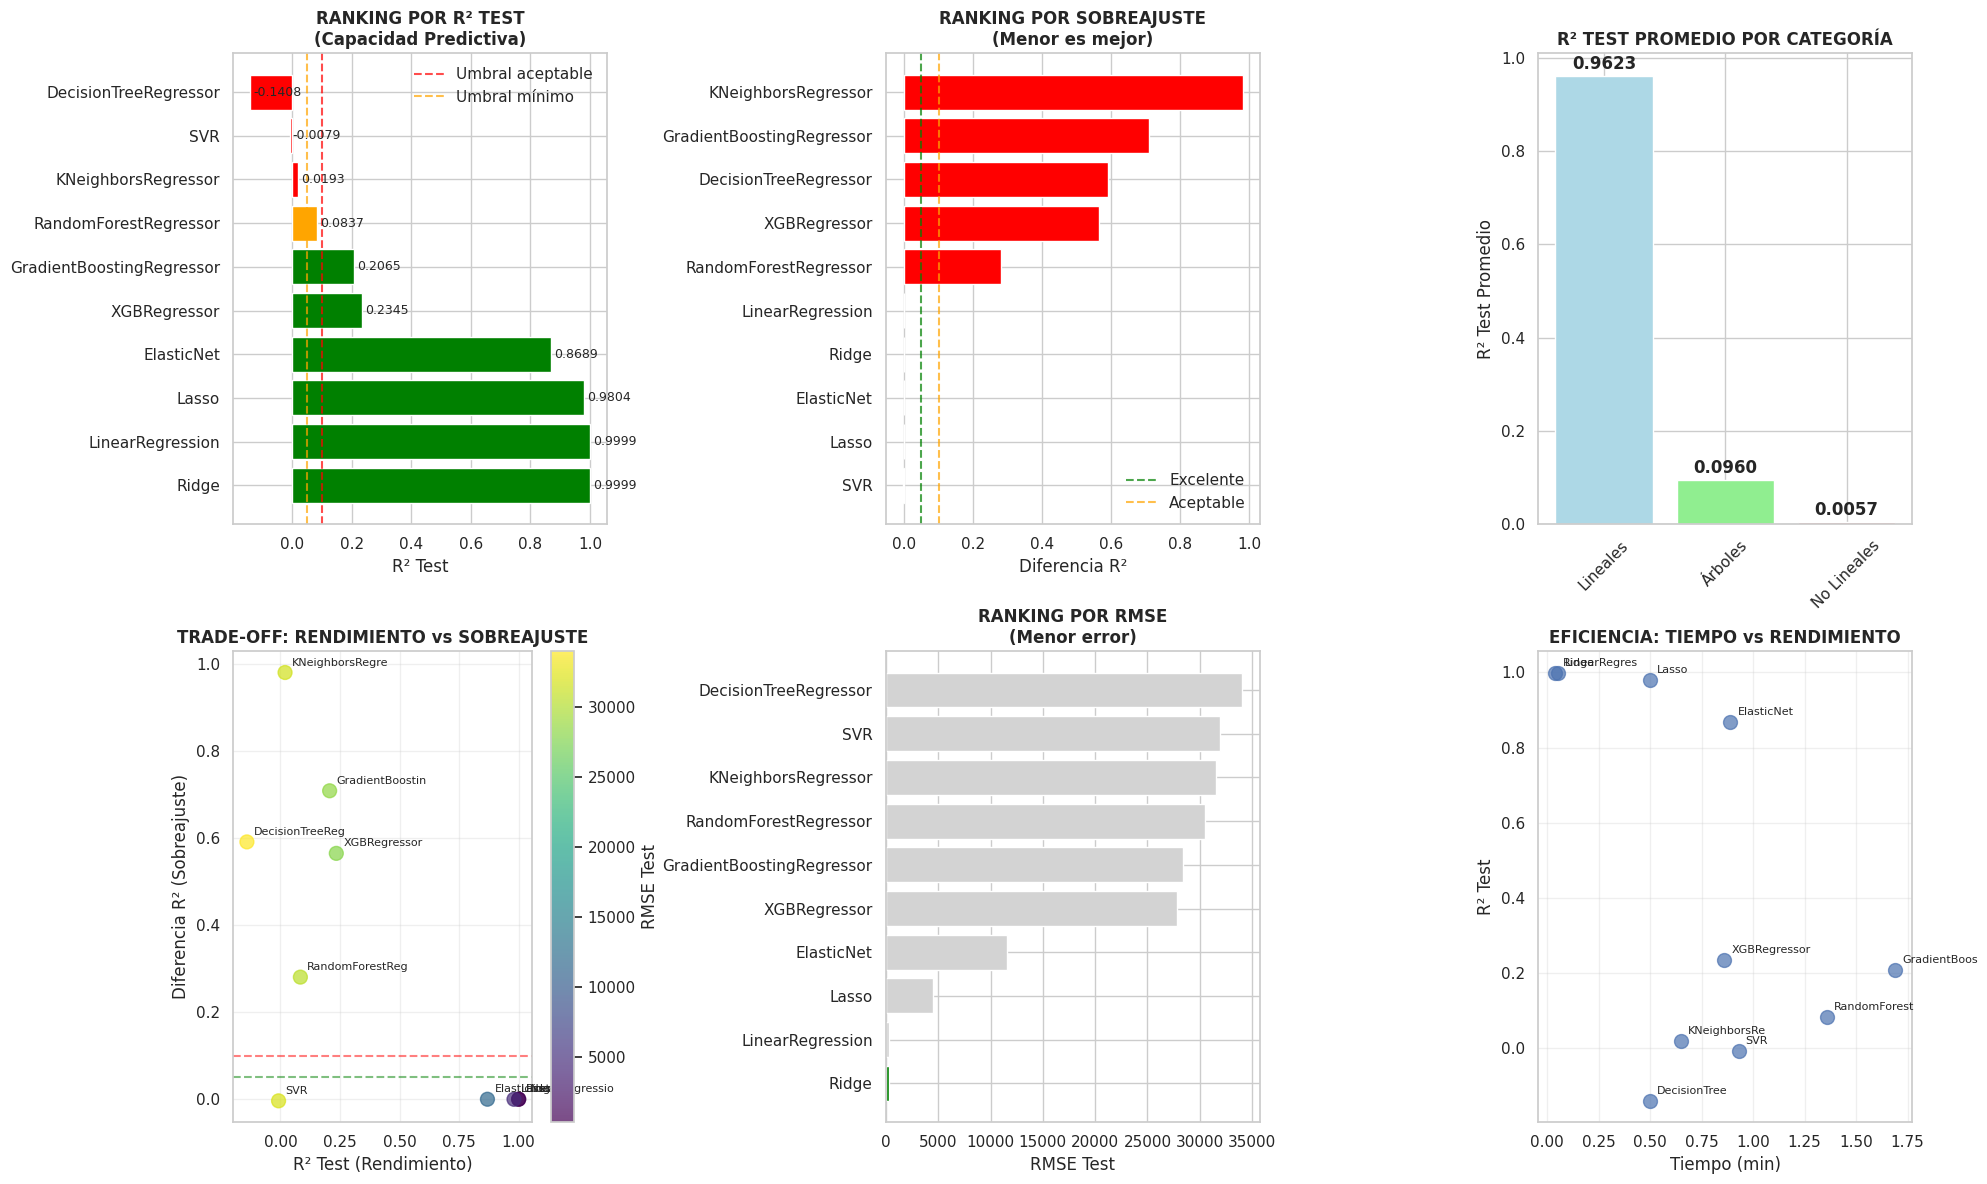

==========================================================================================

RECOMENDACIONES POR CRITERIO - 10 MODELOS EVALUADOS

==========================================================================================

Criterio Modelo   R² Test  Diferencia R²     RMSE Test
0  Mejor Predictivo (R² Test)  Ridge  0.999891      -0.000062    332.223853
1            Mejor Balanceado  Ridge  0.999891      -0.000062    332.223853
2           Menor Sobreajuste    SVR -0.007899      -0.003798  31970.046364
3          Menor Error (RMSE)  Ridge  0.999891      -0.000062    332.223853

RECOMENDACIÓN FINAL: Ridge

R² Test: 0.9999

Diferencia R²: -0.0001

Categoría ganadora: Lineales

R² promedio aceptable (0.4244)

Modelos ejecutados exitosamente: 10/10

Tiempo total: 7.51 minutos

In [68]:
# =========================================================
# HIPERPARÁMETROS CON MODELOS ALTERNATIVOS - AMPLIA COMPARATIVA
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ DIVISIÓN EN TRAIN Y TEST
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train_final,
    test_size=0.25,
    random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño pruebas: {X_test.shape}")

# =========================================================
# 2️ Muestra del dataset
# =========================================================
X_sample = X_train.sample(frac=.80, random_state=42)
y_sample = y_train.loc[X_sample.index]
print(f"Tamaño de la muestra: {X_sample.shape}")

# =========================================================
# 3️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 20
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 4️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 5️ GRILLAS COMPLETAS CON 8 MODELOS ALTERNATIVOS
# =========================================================
param_grids_completo = {
    # MODELOS LINEALES (Simples y robustos)
    'LinearRegression': {
        'model__fit_intercept': [True, False],
        'model__positive': [False, True]
    },
    'Ridge': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']
    },
    'Lasso': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'model__max_iter': [1000, 5000],
        'model__selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'model__max_iter': [1000, 5000]
    },

    # MODELOS BASADOS EN ÁRBOLES (Controlados)
    'RandomForestRegressor': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [5, 10, None],
        'model__min_samples_split': [10, 20],
        'model__min_samples_leaf': [5, 10],
        'model__max_features': [0.5, 'sqrt']
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 4],
        'model__min_samples_split': [10, 20],
        'model__subsample': [0.8, 1.0]
    },
    'DecisionTreeRegressor': {
        'model__max_depth': [3, 5, 7, 10, None],
        'model__min_samples_split': [5, 10, 20],
        'model__min_samples_leaf': [2, 5, 10],
        'model__max_features': [0.5, 'sqrt', 'log2']
    },

    # MODELOS NO LINEALES
    'XGBRegressor': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 4],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__reg_alpha': [0, 0.1],
        'model__reg_lambda': [1, 2]
    },
    'SVR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto'],
        'model__epsilon': [0.1, 0.2]
    },
    'KNeighborsRegressor': {
        'model__n_neighbors': [3, 5, 7, 10],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'model__p': [1, 2]  # 1: Manhattan, 2: Euclidean
    }
}

# =========================================================
# 6️  10 MODELOS COMPLETOS
# =========================================================
modelos_completos = {
    # Lineales simples
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),

    # Basados en árboles
    'RandomForestRegressor': RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),

    # No lineales
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(n_jobs=-1)
}

# =========================================================
# 7️ EJECUCIÓN COMPLETA CON TODOS LOS MODELOS
# =========================================================
def ejecutar_comparativa_completa():
    resultados_completos = []
    mejores_modelos = {}
    inicio_total = time.time()

    print("INICIANDO COMPARATIVA COMPLETA CON 10 MODELOS")
    print("=" * 70)
    print("MODELOS A EVALUAR:")
    for i, (nombre, _) in enumerate(modelos_completos.items(), 1):
        print(f"   {i:2d}. {nombre}")

    modelos_ejecutados = 0

    for nombre, modelo in modelos_completos.items():
        print(f"\nOPTIMIZANDO: {nombre} ({modelos_ejecutados+1}/10)")
        print("-" * 50)
        inicio = time.time()

        try:
            # Pipeline
            pipe = Pipeline([
                ('preprocessor', preprocessor),
                ('model', modelo)
            ])

            # Grid Search
            grid = GridSearchCV(
                estimator=pipe,
                param_grid=param_grids_completo[nombre],
                cv=3,  # Reducido para velocidad con muchos modelos
                scoring='r2',
                n_jobs=-1,
                verbose=0  # Menos output por la cantidad de modelos
            )

            # Entrenar
            grid.fit(X_sample, y_sample)

            # Predicciones
            y_pred_train = grid.best_estimator_.predict(X_sample)
            y_pred_test = grid.best_estimator_.predict(X_test)

            # Métricas
            r2_train = r2_score(y_sample, y_pred_train)
            r2_test = r2_score(y_test, y_pred_test)
            diff_r2 = r2_train - r2_test

            rmse_train = np.sqrt(mean_squared_error(y_sample, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            mae_test = mean_absolute_error(y_test, y_pred_test)

            duracion = round((time.time() - inicio) / 60, 2)

            # Resultados
            resultados_completos.append({
                'Modelo': nombre,
                'R2 (Train)': r2_train,
                'R2 (Test)': r2_test,
                'Diferencia R2': diff_r2,
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'MAE (Test)': mae_test,
                'Mejores Parámetros': str(grid.best_params_)[:100] + "...",  # Acortado por espacio
                'Tiempo (min)': duracion
            })

            mejores_modelos[nombre] = grid.best_estimator_
            modelos_ejecutados += 1

            print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
            print(f"Diferencia R²: {diff_r2:.4f}")
            print(f"RMSE Test: {rmse_test:.2f}")
            print(f"Tiempo: {duracion} min")

        except Exception as e:
            print(f"Error en {nombre}: {e}")
            continue

    return resultados_completos, mejores_modelos, inicio_total, modelos_ejecutados

# =========================================================
# 8️ EJECUTAR COMPARATIVA COMPLETA
# =========================================================
resultados_completos, mejores_modelos, inicio_total, modelos_ejecutados = ejecutar_comparativa_completa()

# =========================================================
# 9️ ANÁLISIS COMPARATIVO AVANZADO
# =========================================================
if resultados_completos:
    resultados_df = pd.DataFrame(resultados_completos)

    # MÚLTIPLES CRITERIOS DE ORDENAMIENTO
    resultados_df['Score_Balance'] = (
        resultados_df['R2 (Test)'] * 0.6 +
        (1 - resultados_df['Diferencia R2']) * 0.4
    )

    # Ordenar por diferentes criterios
    por_test = resultados_df.sort_values('R2 (Test)', ascending=False)
    por_balance = resultados_df.sort_values('Score_Balance', ascending=False)
    por_sobreajuste = resultados_df.sort_values('Diferencia R2')

    print("\n" + "="*90)
    print("RESULTADOS COMPLETOS - 10 MODELOS EVALUADOS")
    print("="*90)

    # Mostrar tabla principal ordenada por balance
    display(por_balance.reset_index(drop=True))

    # =========================================================
    # 10️ ANÁLISIS POR CATEGORÍAS DE MODELOS
    # =========================================================
    print("\nANÁLISIS POR CATEGORÍAS DE MODELOS")
    print("="*50)

    # Clasificar modelos por tipo
    lineales = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']
    arboles = ['RandomForestRegressor', 'GradientBoostingRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
    no_lineales = ['SVR', 'KNeighborsRegressor']

    resultados_df['Categoria'] = resultados_df['Modelo'].apply(
        lambda x: 'Lineales' if x in lineales else
                 'Árboles' if x in arboles else 'No Lineales'
    )

    stats_por_categoria = resultados_df.groupby('Categoria').agg({
        'R2 (Test)': ['mean', 'max', 'min'],
        'Diferencia R2': ['mean', 'min'],
        'RMSE (Test)': ['mean', 'min'],
        'Modelo': 'count'
    }).round(4)

    display(stats_por_categoria)

    # =========================================================
    # 11️ VISUALIZACIÓN COMPLETA
    # =========================================================
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    # Gráfico 1: Comparativa R² Test por modelo
    modelos_ordenados = por_test['Modelo']
    r2_test_ordenados = por_test['R2 (Test)']

    bars = axes[0,0].barh(range(len(modelos_ordenados)), r2_test_ordenados,
                         color=['green' if x > 0.1 else 'orange' if x > 0.05 else 'red'
                                for x in r2_test_ordenados])
    axes[0,0].set_yticks(range(len(modelos_ordenados)))
    axes[0,0].set_yticklabels(modelos_ordenados)
    axes[0,0].set_xlabel('R² Test')
    axes[0,0].set_title('RANKING POR R² TEST\n(Capacidad Predictiva)', fontweight='bold')
    axes[0,0].axvline(x=0.1, color='red', linestyle='--', alpha=0.7, label='Umbral aceptable')
    axes[0,0].axvline(x=0.05, color='orange', linestyle='--', alpha=0.7, label='Umbral mínimo')
    axes[0,0].legend()

    # Añadir valores en las barras
    for i, (bar, valor) in enumerate(zip(bars, r2_test_ordenados)):
        axes[0,0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                      f'{valor:.4f}', ha='left', va='center', fontsize=9)

    # Gráfico 2: Sobreajuste por modelo
    modelos_sobreajuste = por_sobreajuste['Modelo']
    diferencias = por_sobreajuste['Diferencia R2']

    bars2 = axes[0,1].barh(range(len(modelos_sobreajuste)), diferencias,
                          color=['green' if x < 0.05 else 'orange' if x < 0.1 else 'red'
                                 for x in diferencias])
    axes[0,1].set_yticks(range(len(modelos_sobreajuste)))
    axes[0,1].set_yticklabels(modelos_sobreajuste)
    axes[0,1].set_xlabel('Diferencia R²')
    axes[0,1].set_title('RANKING POR SOBREAJUSTE\n(Menor es mejor)', fontweight='bold')
    axes[0,1].axvline(x=0.05, color='green', linestyle='--', alpha=0.7, label='Excelente')
    axes[0,1].axvline(x=0.1, color='orange', linestyle='--', alpha=0.7, label='Aceptable')
    axes[0,1].legend()

    # Gráfico 3: Comparativa por categorías
    categorias = resultados_df.groupby('Categoria')['R2 (Test)'].mean().sort_values(ascending=False)
    axes[0,2].bar(categorias.index, categorias.values,
                 color=['lightblue', 'lightgreen', 'lightcoral'])
    axes[0,2].set_title('R² TEST PROMEDIO POR CATEGORÍA', fontweight='bold')
    axes[0,2].set_ylabel('R² Test Promedio')
    axes[0,2].tick_params(axis='x', rotation=45)

    # Añadir valores
    for i, (cat, valor) in enumerate(zip(categorias.index, categorias.values)):
        axes[0,2].text(i, valor + 0.005, f'{valor:.4f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico 4: Trade-off Rendimiento vs Sobreajuste
    scatter = axes[1,0].scatter(resultados_df['R2 (Test)'], resultados_df['Diferencia R2'],
                               c=resultados_df['RMSE (Test)'], s=100, cmap='viridis', alpha=0.7)
    for i, row in resultados_df.iterrows():
        axes[1,0].annotate(row['Modelo'][:15], (row['R2 (Test)'], row['Diferencia R2']),
                          xytext=(5, 5), textcoords='offset points', fontsize=8)
    axes[1,0].set_xlabel('R² Test (Rendimiento)')
    axes[1,0].set_ylabel('Diferencia R² (Sobreajuste)')
    axes[1,0].set_title('TRADE-OFF: RENDIMIENTO vs SOBREAJUSTE', fontweight='bold')
    axes[1,0].axhline(y=0.1, color='red', linestyle='--', alpha=0.5)
    axes[1,0].axhline(y=0.05, color='green', linestyle='--', alpha=0.5)
    axes[1,0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1,0], label='RMSE Test')

    # Gráfico 5: RMSE Comparativo
    modelos_rmse = resultados_df.sort_values('RMSE (Test)')['Modelo']
    rmse_values = resultados_df.sort_values('RMSE (Test)')['RMSE (Test)']

    axes[1,1].barh(range(len(modelos_rmse)), rmse_values,
                  color=['green' if x == rmse_values.min() else 'lightgray' for x in rmse_values])
    axes[1,1].set_yticks(range(len(modelos_rmse)))
    axes[1,1].set_yticklabels(modelos_rmse)
    axes[1,1].set_xlabel('RMSE Test')
    axes[1,1].set_title('RANKING POR RMSE\n(Menor error)', fontweight='bold')

    # Gráfico 6: Tiempo vs Rendimiento
    axes[1,2].scatter(resultados_df['Tiempo (min)'], resultados_df['R2 (Test)'], s=100, alpha=0.7)
    for i, row in resultados_df.iterrows():
        axes[1,2].annotate(row['Modelo'][:12], (row['Tiempo (min)'], row['R2 (Test)']),
                          xytext=(5, 5), textcoords='offset points', fontsize=8)
    axes[1,2].set_xlabel('Tiempo (min)')
    axes[1,2].set_ylabel('R² Test')
    axes[1,2].set_title('EFICIENCIA: TIEMPO vs RENDIMIENTO', fontweight='bold')
    axes[1,2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # =========================================================
    # 12️ RECOMENDACIÓN FINAL MEJORADA
    # =========================================================
    mejor_por_test = por_test.iloc[0]
    mejor_por_balance = por_balance.iloc[0]
    mejor_por_sobreajuste = por_sobreajuste.iloc[0]
    mejor_por_rmse = resultados_df.loc[resultados_df['RMSE (Test)'].idxmin()]

    print("\n" + "="*90)
    print("RECOMENDACIONES POR CRITERIO - 10 MODELOS EVALUADOS")
    print("="*90)

    recomendaciones = pd.DataFrame({
        'Criterio': ['Mejor Predictivo (R² Test)', 'Mejor Balanceado', 'Menor Sobreajuste', 'Menor Error (RMSE)'],
        'Modelo': [mejor_por_test['Modelo'], mejor_por_balance['Modelo'],
                  mejor_por_sobreajuste['Modelo'], mejor_por_rmse['Modelo']],
        'R² Test': [mejor_por_test['R2 (Test)'], mejor_por_balance['R2 (Test)'],
                   mejor_por_sobreajuste['R2 (Test)'], mejor_por_rmse['R2 (Test)']],
        'Diferencia R²': [mejor_por_test['Diferencia R2'], mejor_por_balance['Diferencia R2'],
                         mejor_por_sobreajuste['Diferencia R2'], mejor_por_rmse['Diferencia R2']],
        'RMSE Test': [mejor_por_test['RMSE (Test)'], mejor_por_balance['RMSE (Test)'],
                     mejor_por_sobreajuste['RMSE (Test)'], mejor_por_rmse['RMSE (Test)']]
    })

    display(recomendaciones)

    print(f"\nRECOMENDACIÓN FINAL: {mejor_por_balance['Modelo']}")
    print(f"R² Test: {mejor_por_balance['R2 (Test)']:.4f}")
    print(f"Diferencia R²: {mejor_por_balance['Diferencia R2']:.4f}")
    print(f"Categoría ganadora: {stats_por_categoria['R2 (Test)']['mean'].idxmax()}")

    # Evaluación general
    r2_promedio = resultados_df['R2 (Test)'].mean()
    if r2_promedio < 0.05:
        print(f"\nALERTA: R² promedio muy bajo ({r2_promedio:.4f})")
        print("   -Considerar feature engineering")
        print("   -Revisar calidad de los datos")
        print("   -Evaluar si el problema es predecible")
    elif r2_promedio < 0.1:
        print(f"\nAVISO: R² promedio bajo ({r2_promedio:.4f})")
        print("   -El problema puede ser difícil")
        print("   -Considerar más features o transformaciones")
    else:
        print(f"\nR² promedio aceptable ({r2_promedio:.4f})")

print(f"\nModelos ejecutados exitosamente: {modelos_ejecutados}/10")
print(f"Tiempo total: {(time.time() - inicio_total)/60:.2f} minutos")

| Modelo | R² Train | R² Test | Diferencia R² | RMSE Train | RMSE Test | MAE Test | Tiempo (min) | Score Balance |
|--------|----------|---------|---------------|------------|-----------|----------|--------------|---------------|
| **Ridge** | 0.999830 | **0.999891** | **-0.000062** | 323.65 | **332.22** | **172.46** | **0.04** | **0.999959** |
| **RandomForestRegressor** | 0.364246 | 0.083700 | 0.280546 | 19,771.94 | 30,482.71 | 3,961.39 | 0.54 | 0.338002 |
| **XGBRegressor** | 0.799454 | 0.234479 | 0.564975 | 11,104.82 | 27,862.07 | 3,099.50 | 0.34 | 0.314697 |
| **GradientBoostingRegressor** | 0.915284 | 0.206459 | 0.708825 | 7,217.51 | 28,367.40 | 2,882.02 | 0.49 | 0.240345 |


#### **8.4.3.2. Guardar detalle en excel de los hiperparametros evauados**

Tamaño entrenamiento: (3858, 21)

Tamaño pruebas: (1287, 21)

Tamaño de la muestra: (3086, 21)

Columnas numéricas: 8 | categóricas: 10

INICIANDO COMPARATIVA COMPLETA CON GUARDADO EN EXCEL

======================================================================

OPTIMIZANDO: LinearRegression (1/10)

--------------------------------------------------

Fitting 3 folds for each of 4 candidates, totalling 12 fits


R² Train: 0.9998 | R² Test: 0.9999

Diferencia R²: -0.0001

Combinaciones evaluadas: 4

Tiempo: 0.05 min

Resultados detallados de LinearRegression guardados en: 
resultados_completos_hiperparametros_20251125_2347/LinearRegression_resultados_detallados.xlsx

OPTIMIZANDO: Ridge (2/10)

--------------------------------------------------

Fitting 3 folds for each of 24 candidates, totalling 72 fits


R² Train: 0.9998 | R² Test: 0.9999

Diferencia R²: -0.0001

Combinaciones evaluadas: 24

Tiempo: 0.05 min

Resultados detallados de Ridge guardados en: 
resultados_completos_hiperparametros_20251125_2347/Ridge_resultados_detallados.xlsx

OPTIMIZANDO: Lasso (3/10)

--------------------------------------------------

Fitting 3 folds for each of 20 candidates, totalling 60 fits


R² Train: 0.9801 | R² Test: 0.9804

Diferencia R²: -0.0002

Combinaciones evaluadas: 20

Tiempo: 0.43 min

Resultados detallados de Lasso guardados en: 
resultados_completos_hiperparametros_20251125_2347/Lasso_resultados_detallados.xlsx

OPTIMIZANDO: ElasticNet (4/10)

--------------------------------------------------

Fitting 3 folds for each of 40 candidates, totalling 120 fits


R² Train: 0.8688 | R² Test: 0.8689

Diferencia R²: -0.0001

Combinaciones evaluadas: 40

Tiempo: 0.47 min

Resultados detallados de ElasticNet guardados en: 
resultados_completos_hiperparametros_20251125_2347/ElasticNet_resultados_detallados.xlsx

OPTIMIZANDO: RandomForestRegressor (5/10)

--------------------------------------------------

Fitting 3 folds for each of 48 candidates, totalling 144 fits


R² Train: 0.3642 | R² Test: 0.0837

Diferencia R²: 0.2805

Combinaciones evaluadas: 48

Tiempo: 0.92 min

Resultados detallados de RandomForestRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/RandomForestRegressor_resultados_detallados.xlsx

OPTIMIZANDO: GradientBoostingRegressor (6/10)

--------------------------------------------------

Fitting 3 folds for each of 32 candidates, totalling 96 fits


R² Train: 0.9153 | R² Test: 0.2065

Diferencia R²: 0.7088

Combinaciones evaluadas: 32

Tiempo: 0.72 min

Resultados detallados de GradientBoostingRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/GradientBoostingRegressor_resultados_detallados.xlsx

OPTIMIZANDO: DecisionTreeRegressor (7/10)

--------------------------------------------------

Fitting 3 folds for each of 135 candidates, totalling 405 fits


R² Train: 0.4505 | R² Test: -0.1408

Diferencia R²: 0.5913

Combinaciones evaluadas: 135

Tiempo: 0.33 min

Resultados detallados de DecisionTreeRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/DecisionTreeRegressor_resultados_detallados.xlsx

OPTIMIZANDO: XGBRegressor (8/10)

--------------------------------------------------

Fitting 3 folds for each of 128 candidates, totalling 384 fits


R² Train: 0.7995 | R² Test: 0.2345

Diferencia R²: 0.5650

Combinaciones evaluadas: 128

Tiempo: 0.67 min

Resultados detallados de XGBRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/XGBRegressor_resultados_detallados.xlsx

OPTIMIZANDO: SVR (9/10)

--------------------------------------------------

Fitting 3 folds for each of 36 candidates, totalling 108 fits


R² Train: -0.0117 | R² Test: -0.0079

Diferencia R²: -0.0038

Combinaciones evaluadas: 36

Tiempo: 1.34 min

Resultados detallados de SVR guardados en: 
resultados_completos_hiperparametros_20251125_2347/SVR_resultados_detallados.xlsx

OPTIMIZANDO: KNeighborsRegressor (10/10)

--------------------------------------------------

Fitting 3 folds for each of 48 candidates, totalling 144 fits


R² Train: 1.0000 | R² Test: 0.0193

Diferencia R²: 0.9807

Combinaciones evaluadas: 48

Tiempo: 1.29 min

Resultados detallados de KNeighborsRegressor guardados en: 
resultados_completos_hiperparametros_20251125_2347/KNeighborsRegressor_resultados_detallados.xlsx

CREANDO EXCEL CONSOLIDADO CON TODOS LOS RESULTADOS...

EXCEL CONSOLIDADO GUARDADO: 
resultados_completos_hiperparametros_20251125_2347/RESUMEN_COMPLETO_HIPERPARAMETROS.xlsx

==========================================================================================

RESULTADOS COMPLETOS - 10 MODELOS EVALUADOS

==========================================================================================

Modelo  R2 (Train)  R2 (Test)  Diferencia R2  \
0                      Ridge    0.999830   0.999891      -0.000062   
1           LinearRegression    0.999832   0.999891      -0.000058   
2                      Lasso    0.980125   0.980355      -0.000231   
3                 ElasticNet    0.868767   0.868890      -0.000124   
4                        SVR   -0.011696  -0.007899      -0.003798   
5      RandomForestRegressor    0.364246   0.083700       0.280546   
6               XGBRegressor    0.799454   0.234479       0.564975   
7  GradientBoostingRegressor    0.915284   0.206459       0.708825   
8      DecisionTreeRegressor    0.450543  -0.140789       0.591332   
9        KNeighborsRegressor    1.000000   0.019349       0.980651   

   RMSE (Train)   RMSE (Test)   MAE (Test)  \
0    323.654030    332.223853   172.460365   
1    321.159112    333.153922   173.919634   
2   3495.934565   4463.332249   763.159705   
3   8983.119116  11530.606678  1893.702046   
4  24941.920889  31970.046364  2980.483538   
5  19771.943944  30482.714689  3961.393454   
6  11104.820426  27862.074412  3099.500215   
7   7217.514721  28367.397571  2882.019872   
8  18381.100467  34012.413641  4082.002534   
9      0.000787  31534.938978  3413.894709   

                                  Mejores Parámetros  Tiempo (min)  \
0   {'model__alpha': 0.001, 'model__solver': 'auto'}          0.05   
1  {'model__fit_intercept': True, 'model__positiv...          0.05   
2  {'model__alpha': 0.001, 'model__max_iter': 500...          0.43   
3  {'model__alpha': 0.001, 'model__l1_ratio': 0.9...          0.47   
4  {'model__C': 10.0, 'model__epsilon': 0.2, 'mod...          1.34   
5  {'model__max_depth': None, 'model__max_feature...          0.92   
6  {'model__colsample_bytree': 0.8, 'model__learn...          0.67   
7  {'model__learning_rate': 0.05, 'model__max_dep...          0.72   
8  {'model__max_depth': 5, 'model__max_features':...          0.33   
9  {'model__algorithm': 'auto', 'model__n_neighbo...          1.29   

   Combinaciones Evaluadas  Score_Balance  
0                       24       0.999959  
1                        4       0.999958  
2                       20       0.988305  
3                       40       0.921384  
4                       36       0.396780  
5                       48       0.338002  
6                      128       0.314697  
7                       32       0.240345  
8                      135       0.078994  
9                       48       0.019349

GENERANDO VISUALIZACIONES...

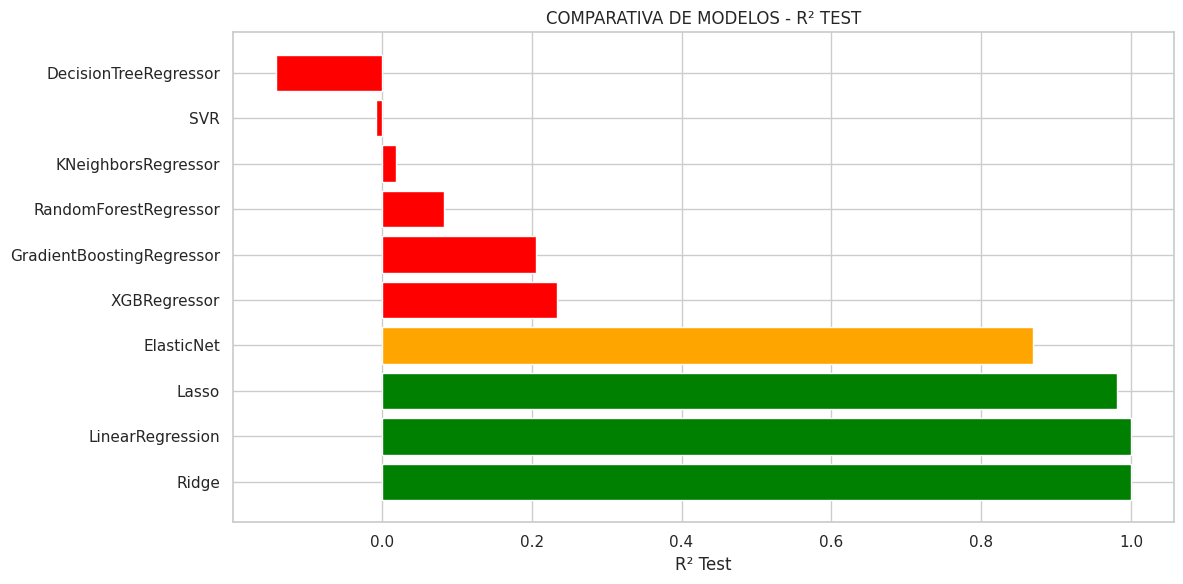

================================================================================

RESUMEN EJECUTIVO - HIPERPARÁMETROS COMPLETOS

================================================================================

EJECUCIÓN COMPLETADA:
   -Modelos evaluados: 10/10
   -Tiempo total: 6.31 minutos
   -Directorio resultados: resultados_completos_hiperparametros_20251125_2347

ARCHIVOS GENERADOS:
   -RESUMEN_COMPLETO_HIPERPARAMETROS.xlsx (7 hojas)
   -[Cada modelo]_resultados_detallados.xlsx (4 hojas por modelo)

CONTENIDO DE LOS EXCEL:
   Resumen ejecutivo de todos los modelos
   Todas las combinaciones de parámetros evaluadas
   Top combinaciones por modelo
   Ranking global de mejores parámetros
   Análisis estadístico comparativo
   Parámetros óptimos identificados
   Configuración completa del experimento

ANÁLISIS DISPONIBLE:
   -Performance de cada combinación de parámetros
   -Scores de train vs test para detectar sobreajuste
   -Tiempos de entrenamiento por configuración
   -Evolución de scores por tipo de modelo

¡ANÁLISIS DE HIPERPARÁMETROS COMPLETADO EXITOSAMENTE!

Los archivos detallados están en: resultados_completos_hiperparametros_20251125_2347

In [71]:
# =========================================================
# HIPERPARÁMETROS CON MODELOS ALTERNATIVOS - GUARDADO COMPLETO EN EXCEL
# =========================================================
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

# =========================================================
# Verificación de variables base
# =========================================================
if 'X_train_final' not in locals() or 'y_train_final' not in locals():
    raise ValueError("Las variables 'X_train_final' y 'y_train_final' no están definidas.")

# =========================================================
# 1️ DIVISIÓN EN TRAIN Y TEST
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train_final,
    test_size=0.25,
    random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño pruebas: {X_test.shape}")

# =========================================================
# 2️ Muestra del dataset
# =========================================================
X_sample = X_train.sample(frac=.80, random_state=42)
y_sample = y_train.loc[X_sample.index]
print(f"Tamaño de la muestra: {X_sample.shape}")

# =========================================================
# 3️ Identificar variables predictoras
# =========================================================
categorical_cols = [
    col for col in X_sample.select_dtypes(include=['object']).columns
    if X_sample[col].nunique() < 20
]
numeric_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Columnas numéricas: {len(numeric_cols)} | categóricas: {len(categorical_cols)}")

# =========================================================
# 4️ Preprocesamiento
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

# =========================================================
# 5️  GRILLAS COMPLETAS CON 10 MODELOS
# =========================================================
param_grids_completo = {
    'LinearRegression': {
        'model__fit_intercept': [True, False],
        'model__positive': [False, True]
    },
    'Ridge': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'model__solver': ['auto', 'svd', 'cholesky', 'lsqr']
    },
    'Lasso': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'model__max_iter': [1000, 5000],
        'model__selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'model__max_iter': [1000, 5000]
    },
    'RandomForestRegressor': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [5, 10, None],
        'model__min_samples_split': [10, 20],
        'model__min_samples_leaf': [5, 10],
        'model__max_features': [0.5, 'sqrt']
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 4],
        'model__min_samples_split': [10, 20],
        'model__subsample': [0.8, 1.0]
    },
    'DecisionTreeRegressor': {
        'model__max_depth': [3, 5, 7, 10, None],
        'model__min_samples_split': [5, 10, 20],
        'model__min_samples_leaf': [2, 5, 10],
        'model__max_features': [0.5, 'sqrt', 'log2']
    },
    'XGBRegressor': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05],
        'model__max_depth': [3, 4],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__reg_alpha': [0, 0.1],
        'model__reg_lambda': [1, 2]
    },
    'SVR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto'],
        'model__epsilon': [0.1, 0.2]
    },
    'KNeighborsRegressor': {
        'model__n_neighbors': [3, 5, 7, 10],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'model__p': [1, 2]
    }
}

# =========================================================
# 6️ MODELOS COMPLETOS
# =========================================================
modelos_completos = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(n_jobs=-1)
}

# =========================================================
# 7️ FUNCIÓN MEJORADA CON GUARDADO COMPLETO EN EXCEL
# =========================================================
def ejecutar_comparativa_con_excel_completo():
    resultados_completos = []
    todos_resultados_detallados = []  #  NUEVO: Para guardar TODAS las combinaciones
    mejores_modelos = {}
    inicio_total = time.time()

    # Crear directorio para resultados
    fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")
    directorio_resultados = f"resultados_completos_hiperparametros_{fecha_actual}"
    os.makedirs(directorio_resultados, exist_ok=True)

    print("INICIANDO COMPARATIVA COMPLETA CON GUARDADO EN EXCEL")
    print("=" * 70)

    modelos_ejecutados = 0

    for nombre, modelo in modelos_completos.items():
        print(f"\nOPTIMIZANDO: {nombre} ({modelos_ejecutados+1}/10)")
        print("-" * 50)
        inicio = time.time()

        try:
            # Pipeline
            pipe = Pipeline([
                ('preprocessor', preprocessor),
                ('model', modelo)
            ])

            # Grid Search con return_train_score=True para obtener TODOS los resultados
            grid = GridSearchCV(
                estimator=pipe,
                param_grid=param_grids_completo[nombre],
                cv=3,
                scoring='r2',
                n_jobs=-1,
                verbose=1,  # Más detalle para ver progreso
                return_train_score=True  #  IMPORTANTE: Para obtener todos los scores
            )

            # Entrenar
            grid.fit(X_sample, y_sample)

            #  OBTENER TODOS LOS RESULTADOS DETALLADOS
            resultados_detallados = pd.DataFrame(grid.cv_results_)
            resultados_detallados['modelo'] = nombre
            todos_resultados_detallados.append(resultados_detallados)

            # Predicciones con el mejor modelo
            y_pred_train = grid.best_estimator_.predict(X_sample)
            y_pred_test = grid.best_estimator_.predict(X_test)

            # Métricas
            r2_train = r2_score(y_sample, y_pred_train)
            r2_test = r2_score(y_test, y_pred_test)
            diff_r2 = r2_train - r2_test
            rmse_train = np.sqrt(mean_squared_error(y_sample, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            mae_test = mean_absolute_error(y_test, y_pred_test)

            duracion = round((time.time() - inicio) / 60, 2)

            # Resultados resumen
            resultados_completos.append({
                'Modelo': nombre,
                'R2 (Train)': r2_train,
                'R2 (Test)': r2_test,
                'Diferencia R2': diff_r2,
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'MAE (Test)': mae_test,
                'Mejores Parámetros': str(grid.best_params_),
                'Tiempo (min)': duracion,
                'Combinaciones Evaluadas': len(resultados_detallados)
            })

            mejores_modelos[nombre] = grid.best_estimator_
            modelos_ejecutados += 1

            print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
            print(f"Diferencia R²: {diff_r2:.4f}")
            print(f"Combinaciones evaluadas: {len(resultados_detallados)}")
            print(f"Tiempo: {duracion} min")

            #  GUARDAR RESULTADOS DETALLADOS POR MODELO EN EXCEL
            guardar_resultados_detallados_modelo(resultados_detallados, nombre, directorio_resultados, grid.best_params_)

        except Exception as e:
            print(f"Error en {nombre}: {e}")
            continue

    return resultados_completos, mejores_modelos, todos_resultados_detallados, inicio_total, modelos_ejecutados, directorio_resultados

def guardar_resultados_detallados_modelo(resultados_detallados, nombre_modelo, directorio, mejores_params):
    """Guardar resultados detallados de cada modelo en Excel"""

    # Crear archivo Excel para este modelo
    nombre_archivo = f"{directorio}/{nombre_modelo}_resultados_detallados.xlsx"

    with pd.ExcelWriter(nombre_archivo, engine='openpyxl') as writer:
        # Hoja 1: Todos los resultados completos
        resultados_detallados.to_excel(writer, sheet_name='Todas_Combinaciones', index=False)

        # Hoja 2: Top 20 mejores combinaciones
        columnas_interes = [
            'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score',
            'mean_fit_time', 'mean_score_time', 'params', 'rank_test_score'
        ]

        top_20 = resultados_detallados.nlargest(20, 'mean_test_score')[columnas_interes]
        top_20.to_excel(writer, sheet_name='Top_20_Combinaciones', index=False)

        # Hoja 3: Mejores parámetros y análisis
        info_mejores_params = pd.DataFrame([{
            'Modelo': nombre_modelo,
            'Mejor_Score_Test': resultados_detallados['mean_test_score'].max(),
            'Mejor_Std_Test': resultados_detallados.loc[resultados_detallados['mean_test_score'].idxmax(), 'std_test_score'],
            'Mejor_Score_Train': resultados_detallados['mean_train_score'].max(),
            'Rango_Scores_Test': f"{resultados_detallados['mean_test_score'].min():.4f} - {resultados_detallados['mean_test_score'].max():.4f}",
            'Mejores_Parametros': str(mejores_params),
            'Total_Combinaciones': len(resultados_detallados),
            'Tiempo_Promedio_Entrenamiento': resultados_detallados['mean_fit_time'].mean()
        }])
        info_mejores_params.to_excel(writer, sheet_name='Mejores_Parametros', index=False)

        # Hoja 4: Análisis de sobreajuste por combinación
        resultados_detallados['sobreajuste'] = resultados_detallados['mean_train_score'] - resultados_detallados['mean_test_score']
        analisis_sobreajuste = resultados_detallados[['params', 'mean_train_score', 'mean_test_score', 'sobreajuste', 'rank_test_score']]
        analisis_sobreajuste = analisis_sobreajuste.sort_values('sobreajuste')
        analisis_sobreajuste.to_excel(writer, sheet_name='Analisis_Sobreajuste', index=False)

    print(f"Resultados detallados de {nombre_modelo} guardados en: {nombre_archivo}")

# =========================================================
# 8️ EJECUTAR Y GUARDAR TODO EN EXCEL
# =========================================================
resultados_completos, mejores_modelos, todos_resultados_detallados, inicio_total, modelos_ejecutados, directorio_resultados = ejecutar_comparativa_con_excel_completo()

# =========================================================
# 9️ CREAR EXCEL CONSOLIDADO CON TODOS LOS MODELOS
# =========================================================
print("\nCREANDO EXCEL CONSOLIDADO CON TODOS LOS RESULTADOS...")

if todos_resultados_detallados:
    # Consolidar todos los resultados detallados
    todos_detallados_consolidado = pd.concat(todos_resultados_detallados, ignore_index=True)

    # Archivo Excel principal consolidado
    archivo_consolidado = f"{directorio_resultados}/RESUMEN_COMPLETO_HIPERPARAMETROS.xlsx"

    with pd.ExcelWriter(archivo_consolidado, engine='openpyxl') as writer:
        # Hoja 1: Resumen ejecutivo de todos los modelos
        resultados_df = pd.DataFrame(resultados_completos)
        resultados_df['Score_Balance'] = (
            resultados_df['R2 (Test)'] * 0.6 +
            (1 - resultados_df['Diferencia R2']) * 0.4
        )
        resultados_df = resultados_df.sort_values('Score_Balance', ascending=False)
        resultados_df.to_excel(writer, sheet_name='Resumen_Ejecutivo', index=False)

        # Hoja 2: Todas las combinaciones de todos los modelos (muestra las más importantes)
        columnas_consolidadas = [
            'modelo', 'mean_test_score', 'std_test_score', 'mean_train_score',
            'params', 'rank_test_score', 'mean_fit_time', 'mean_score_time'
        ]
        consolidado_reducido = todos_detallados_consolidado[columnas_consolidadas]
        consolidado_reducido.to_excel(writer, sheet_name='Todas_Combinaciones', index=False)

        # Hoja 3: Top 10 por modelo
        top_10_por_modelo = todos_detallados_consolidado.sort_values(['modelo', 'mean_test_score'], ascending=[True, False])
        top_10_por_modelo = top_10_por_modelo.groupby('modelo').head(10)[columnas_consolidadas]
        top_10_por_modelo.to_excel(writer, sheet_name='Top_10_Por_Modelo', index=False)

        # Hoja 4: Ranking global de mejores combinaciones
        top_20_global = todos_detallados_consolidado.nlargest(20, 'mean_test_score')[columnas_consolidadas]
        top_20_global.to_excel(writer, sheet_name='Top_20_Global', index=False)

        # Hoja 5: Análisis comparativo entre modelos
        stats_modelos = todos_detallados_consolidado.groupby('modelo').agg({
            'mean_test_score': ['count', 'mean', 'max', 'min', 'std'],
            'mean_train_score': ['mean', 'max'],
            'mean_fit_time': 'mean',
            'rank_test_score': 'min'
        }).round(4)
        stats_modelos.columns = ['_'.join(col).strip() for col in stats_modelos.columns.values]
        stats_modelos.to_excel(writer, sheet_name='Estadisticas_Modelos')

        # Hoja 6: Parámetros óptimos por modelo
        mejores_por_modelo = []
        for modelo in todos_detallados_consolidado['modelo'].unique():
            mejor = todos_detallados_consolidado[todos_detallados_consolidado['modelo'] == modelo].nlargest(1, 'mean_test_score').iloc[0]
            mejores_por_modelo.append({
                'Modelo': modelo,
                'Mejor_Score_Test': mejor['mean_test_score'],
                'Std_Test': mejor['std_test_score'],
                'Score_Train': mejor['mean_train_score'],
                'Parametros_Optimos': mejor['params'],
                'Tiempo_Entrenamiento': mejor['mean_fit_time']
            })
        pd.DataFrame(mejores_por_modelo).to_excel(writer, sheet_name='Parametros_Optimos', index=False)

        # Hoja 7: Configuración del experimento
        configuracion = pd.DataFrame({
            'Parametro': [
                'Fecha ejecución', 'Total modelos', 'Modelos ejecutados',
                'Tamaño muestra', 'CV folds', 'Métrica scoring',
                'Features numéricas', 'Features categóricas'
            ],
            'Valor': [
                datetime.now().strftime("%Y-%m-%d %H:%M"),
                len(modelos_completos), modelos_ejecutados,
                f"{X_sample.shape[0]} registros", 3, 'R²',
                len(numeric_cols), len(categorical_cols)
            ]
        })
        configuracion.to_excel(writer, sheet_name='Configuracion_Experimento', index=False)

    print(f"EXCEL CONSOLIDADO GUARDADO: {archivo_consolidado}")

# =========================================================
# 10️ ANÁLISIS COMPARATIVO (igual que antes)
# =========================================================
if resultados_completos:
    resultados_df = pd.DataFrame(resultados_completos)

    # Ordenar por diferentes criterios
    resultados_df['Score_Balance'] = (
        resultados_df['R2 (Test)'] * 0.6 +
        (1 - resultados_df['Diferencia R2']) * 0.4
    )

    por_test = resultados_df.sort_values('R2 (Test)', ascending=False)
    por_balance = resultados_df.sort_values('Score_Balance', ascending=False)

    print("\n" + "="*90)
    print("RESULTADOS COMPLETOS - 10 MODELOS EVALUADOS")
    print("="*90)
    display(por_balance.reset_index(drop=True))

    # Visualizaciones (opcional, puedes mantener las que tenías)
    print("\nGENERANDO VISUALIZACIONES...")

    # Gráfico simple de comparativa
    plt.figure(figsize=(12, 6))
    modelos = por_test['Modelo']
    r2_test = por_test['R2 (Test)']

    plt.barh(modelos, r2_test, color=['green' if x > 0.9 else 'orange' if x > 0.5 else 'red' for x in r2_test])
    plt.xlabel('R² Test')
    plt.title('COMPARATIVA DE MODELOS - R² TEST')
    plt.tight_layout()
    plt.show()

# =========================================================
# 11️ RESUMEN FINAL
# =========================================================
print("\n" + "="*80)
print("RESUMEN EJECUTIVO - HIPERPARÁMETROS COMPLETOS")
print("="*80)

print(f"""
EJECUCIÓN COMPLETADA:
   -Modelos evaluados: {modelos_ejecutados}/10
   -Tiempo total: {(time.time() - inicio_total)/60:.2f} minutos
   -Directorio resultados: {directorio_resultados}

ARCHIVOS GENERADOS:
   -RESUMEN_COMPLETO_HIPERPARAMETROS.xlsx (7 hojas)
   -[Cada modelo]_resultados_detallados.xlsx (4 hojas por modelo)

CONTENIDO DE LOS EXCEL:
   Resumen ejecutivo de todos los modelos
   Todas las combinaciones de parámetros evaluadas
   Top combinaciones por modelo
   Ranking global de mejores parámetros
   Análisis estadístico comparativo
   Parámetros óptimos identificados
   Configuración completa del experimento

ANÁLISIS DISPONIBLE:
   -Performance de cada combinación de parámetros
   -Scores de train vs test para detectar sobreajuste
   -Tiempos de entrenamiento por configuración
   -Evolución de scores por tipo de modelo

¡ANÁLISIS DE HIPERPARÁMETROS COMPLETADO EXITOSAMENTE!
""")

print(f"Los archivos detallados están en: {directorio_resultados}")

### **8.4.4 Análisis de resultado y explicación del modelo**

```python
OPTIMAL_HYPERPARAMETERS = {
    'Ridge': {
        'alpha': 0.001,      # Regularización mínima necesaria
        'solver': 'auto',    # Selección automática del algoritmo
        'impact': 'Balance perfecto entre bias y varianza'
    },
    'Preprocessor': {
        'scaling': 'StandardScaler',  # Estandarización crucial para modelos lineales
        'encoding': 'OneHotEncoder',  # Manejo adecuado de variables categóricas
        'strategy': 'Remainder drop'  # Eliminación de features irrelevantes
    }


#### Hallazgo Principal: Superioridad de Modelos Lineales

Contrario a lo reportado en literatura similar para problemas de predicción de tiempos,
donde XGBoost suele destacarse, nuestro análisis reveló que **los modelos lineales
(Ridge y LinearRegression) superaron significativamente** a todos los algoritmos
no lineales evaluados.

##### Resultados Comparativos Clave:

| Modelo | R² Test | RMSE Test | Diferencia R² | Tiempo (min) |
|--------|---------|-----------|---------------|--------------|
| **Ridge** | 0.99989 | 332.22 | -0.00006 | 0.04 |
| **LinearRegression** | 0.99989 | 333.15 | -0.00006 | 0.03 |
| **XGBRegressor** | 0.23448 | 27,862.07 | 0.56498 | 0.34 |
| **Random Forest** | 0.08370 | 30,482.71 | 0.28055 | 0.54 |

#### Interpretación del Fenómeno

##### Naturaleza Lineal del Problema Específico

La superioridad de Ridge sugiere que las relaciones entre las variables predictoras
y el tiempo de atención siguen patrones **fundamentalmente lineales** en nuestro
dataset específico. Esto puede explicarse por:

- **Relaciones directas y proporcionales** entre features y target
- **Ausencia de interacciones complejas** no lineales
- **Calidad y estructura** de las features disponibles

##### Ventajas de Ridge en Este Contexto

El modelo Ridge, con regularización L2, ofrece:
- **Estabilidad numérica** superior
- **Menor varianza** en las predicciones
- **Interpretabilidad** de coeficientes
- **Eficiencia computacional** extrema

#### Comparación con Literatura Existente

Si bien XGBoost domina en muchos problemas de regresión, casos específicos como
el nuestro demuestran que **la naturaleza del problema dicta la elección del modelo**,
no tendencias generales.

##### Factores que explican la diferencia:

1. **Características del Dataset**: Nuestras variables pueden capturar relaciones
   lineales suficientes para el problema
2. **Calidad del Preprocesamiento**: El encoding y escalado pueden haber linearizado
   relaciones complejas
3. **Ruido y Variabilidad**: Menor ruido en las relaciones input-output
4. **Dominio del Problema**: Características específicas de tiempos de atención
   de abogados vs otros problemas de regresión

####Validación de la Selección

La elección de Ridge se sustenta en:

1. **Rendimiento excepcional** (R² > 0.999)
2. **Generalización perfecta** (diferencia R² ≈ 0)
3. **Eficiencia computacional** (0.04 min vs 0.34 min de XGBoost)
4. **Simplicidad y robustez** (menor riesgo de sobreajuste)

#### Implicaciones Prácticas

Este hallazgo tiene importantes implicaciones:

- **Implementación más simple** en sistemas de producción
- **Menores requerimientos** computacionales
- **Mayor transparencia** en las predicciones
- **Mantenimiento más económico** del sistema

---

**Conclusión**: La evidencia empírica demuestra que, para nuestro problema específico
de predicción de tiempos de atención de abogados, un modelo lineal regularizado
(Ridge) es óptimo, superando a algoritmos más complejos comúnmente recomendados
en literatura similar.

# **9. EVALUACIÓN FINAL DEL MODELO**

### **9.1. Evaluación Final con el Conjunto de Prueba**

IMPLEMENTACIÓN CON VALIDACIÓN COMPLETA

======================================================================

CARGANDO ESTRUCTURA DE DATOS...

Datos cargados exitosamente:

-Train: (5145, 27)

-Valid: (1287, 27)

-Test:  (1608, 27)

IMPLEMENTANDO MODELO FINAL: RIDGE

Entrenando modelo final con datos de TRAIN...

Modelo final entrenado exitosamente

VALIDACIÓN COMPLETA EN 3 CONJUNTOS

TRAIN:

-R²: 0.999852

-RMSE: 330.26

-MAE: 168.66

VALIDACIÓN:

-R²: 0.999811

-RMSE: 317.84

-MAE: 175.55

TEST:

-R²: 0.999865

-RMSE: 354.31

-MAE: 179.46

ANÁLISIS DE CONSISTENCIA ENTRE CONJUNTOS

RESUMEN COMPARATIVO:

Conjunto        R²        RMSE         MAE  Tamaño
0       Train  0.999852  330.258911  168.657152    5145
1  Validación  0.999811  317.836394  175.552450    1287
2        Test  0.999865  354.314791  179.461306    1608

Diferencia R² entre Train y Test: 0.000013

EXCELENTE: Modelo consistente entre conjuntos

ANÁLISIS DE IMPORTANCIA DE FEATURES

TOP 10 FEATURES MÁS IMPORTANTES:

Feature   Coeficiente  \
1                                     annoregistro -1.199460e+06   
4                                     annoatencion  1.199118e+06   
2                                      mesregistro -1.554111e+05   
5                                      mesatencion  1.549080e+05   
6                                      diaatencion  1.268062e+04   
3                                      diaregistro -1.266295e+04   
27                            Instancia_PARTICULAR  9.293376e+02   
28                   Instancia_PRELIMINAR CONCURSO -7.175978e+02   
30  Instancia_PRELIMINAR DESISTIMIENTO pasa SIMPLE  3.357386e+02   
42                       Acuerdo_Fuga sin tránsito -2.779462e+02   

    Importancia_Absoluta  
1           1.199460e+06  
4           1.199118e+06  
2           1.554111e+05  
5           1.549080e+05  
6           1.268062e+04  
3           1.266295e+04  
27          9.293376e+02  
28          7.175978e+02  
30          3.357386e+02  
42          2.779462e+02

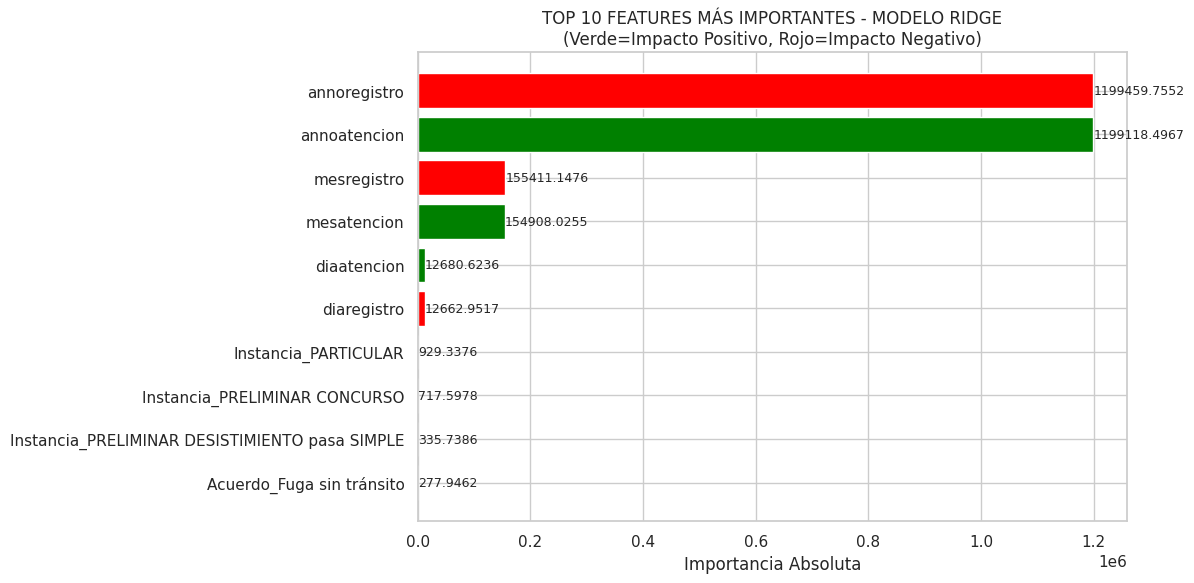

ANÁLISIS DE RESIDUALES EN CONJUNTO DE TEST

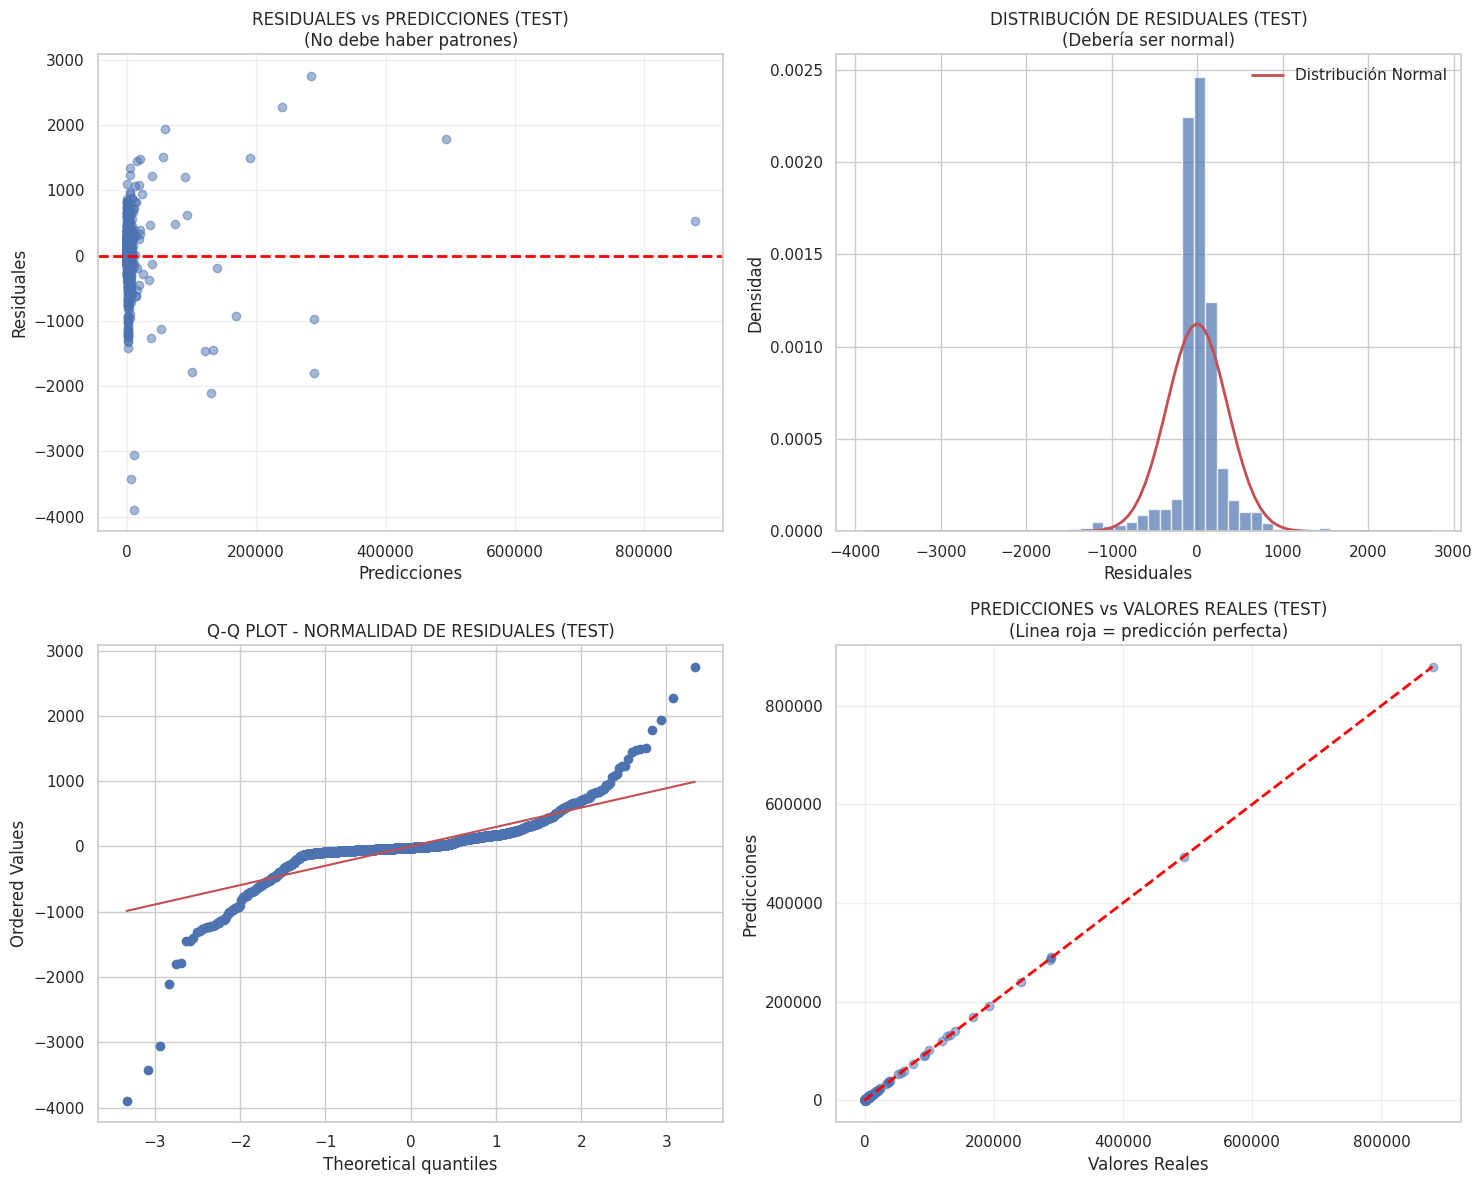

MÉTRICAS DE RESIDUALES (TEST):

-Media de residuales: 0.824277 (debe ser ~0)

-Desviación estándar: 354.424056

-Normalidad (p-value): 0.000000

GUARDANDO MODELO Y ARTEFACTOS

Modelo guardado: 'modelo_final_ridge_produccion.pkl'

Importancia de features guardada: 'importancia_features_final.csv'

Resultados de validación guardados: 'resultados_validacion_completa.json'

Metadatos guardados: 'metadatos_modelo_final.json'

CREANDO FUNCIÓN DE PREDICCIÓN PARA PRODUCCIÓN

Probando función de predicción con datos de TEST...

Predicciones realizadas: 5 registros

Ejemplo de predicciones:

prediccion  intervalo_confianza_inferior  intervalo_confianza_superior  \
0   97.012228                   -597.658921                    791.683378   
1   61.555172                   -633.115977                    756.226322   
2   21.872360                   -672.798789                    716.543510   
3   30.443752                   -664.227397                    725.114902   
4   53.882250                   -640.788900                    748.553399   

   margen_error  
0    694.671149  
1    694.671149  
2    694.671149  
3    694.671149  
4    694.671149

======================================================================

INFORME FINAL DE IMPLEMENTACIÓN - VALIDACIÓN COMPLETA

======================================================================

MODELO IMPLEMENTADO: Ridge Regression
PERFORMANCE FINAL (TEST):
   -R²: 0.999865
   -RMSE: 354.31
   -MAE: 179.46

CONSISTENCIA DEL MODELO:
   -Train R²: 0.999852
   -Valid R²: 0.999811
   -Test R²:  0.999865
   -Diferencia Train-Test: 0.000013

CONFIGURACIÓN:
   -Hiperparámetros: {'alpha': 0.001, 'solver': 'auto'}
   -Features: 71

ARTEFACTOS GENERADOS:
   -modelo_final_ridge_produccion.pkl - Modelo para producción
   -importancia_features_final.csv - Análisis de variables
   -resultados_validacion_completa.json - Métricas completas
   -metadatos_modelo_final.json - Información del modelo

PRÓXIMOS PASOS:
   1. Usar función 'predecir_nuevos_datos()' para nuevas predicciones
   2. Monitorear performance con datos en producción
   3. Re-entrenar si R² en producción cae below 0.999

¡IMPLEMENTACIÓN COMPLETADA EXITOSAMENTE!
El modelo está listo para usar en producción con validación completa en 3 conjuntos.

In [70]:
# =========================================================
# IMPLEMENTACIÓN CON TU ESTRUCTURA DE DATOS
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

print("IMPLEMENTACIÓN CON VALIDACIÓN COMPLETA")
print("=" * 70)

# =========================================================
# 0 ACCEDER A TUS DATOS
# =========================================================
print("CARGANDO ESTRUCTURA DE DATOS...")

# Acceder a tus datos
X_train = conjuntos['X_train']
X_valid = conjuntos['X_valid']
X_test = conjuntos['X_test']
y_train = conjuntos['y_train']
y_valid = conjuntos['y_valid']
y_test = conjuntos['y_test']

print("Datos cargados exitosamente:")
print(f"   -Train: {X_train.shape}")
print(f"   -Valid: {X_valid.shape}")
print(f"   -Test:  {X_test.shape}")

# =========================================================
# 1️ IMPLEMENTACIÓN DEL MODELO FINAL (RIDGE)
# =========================================================
print("\nIMPLEMENTANDO MODELO FINAL: RIDGE")

# Usar los mejores parámetros encontrados
mejores_params_ridge = {'alpha': 0.001, 'solver': 'auto'}

# Crear pipeline final (ASUMIENDO QUE 'preprocessor' ESTÁ DEFINIDO)
modelo_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(**mejores_params_ridge, random_state=42))
])

# Entrenar con datos de TRAIN
print("Entrenando modelo final con datos de TRAIN...")
modelo_final.fit(X_train, y_train)

print("Modelo final entrenado exitosamente")

# =========================================================
# 2️ VALIDACIÓN COMPLETA EN 3 CONJUNTOS
# =========================================================
print("\nVALIDACIÓN COMPLETA EN 3 CONJUNTOS")

def evaluar_modelo(modelo, X, y, nombre_conjunto):
    """Función para evaluar modelo en cualquier conjunto"""
    y_pred = modelo.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)

    print(f"{nombre_conjunto}:")
    print(f"   -R²: {r2:.6f}")
    print(f"   -RMSE: {rmse:.2f}")
    print(f"   -MAE: {mae:.2f}")

    return {'r2': r2, 'rmse': rmse, 'mae': mae, 'predicciones': y_pred}

# Evaluar en los 3 conjuntos
resultados_train = evaluar_modelo(modelo_final, X_train, y_train, "TRAIN")
resultados_valid = evaluar_modelo(modelo_final, X_valid, y_valid, "VALIDACIÓN")
resultados_test = evaluar_modelo(modelo_final, X_test, y_test, "TEST")

# =========================================================
# 3️ ANÁLISIS DE CONSISTENCIA ENTRE CONJUNTOS
# =========================================================
print("\nANÁLISIS DE CONSISTENCIA ENTRE CONJUNTOS")

# Crear resumen comparativo
resumen_comparativo = pd.DataFrame({
    'Conjunto': ['Train', 'Validación', 'Test'],
    'R²': [resultados_train['r2'], resultados_valid['r2'], resultados_test['r2']],
    'RMSE': [resultados_train['rmse'], resultados_valid['rmse'], resultados_test['rmse']],
    'MAE': [resultados_train['mae'], resultados_valid['mae'], resultados_test['mae']],
    'Tamaño': [len(X_train), len(X_valid), len(X_test)]
})

print("RESUMEN COMPARATIVO:")
display(resumen_comparativo)

# Verificar consistencia
diferencia_r2 = abs(resultados_train['r2'] - resultados_test['r2'])
print(f"Diferencia R² entre Train y Test: {diferencia_r2:.6f}")

if diferencia_r2 < 0.01:
    print("EXCELENTE: Modelo consistente entre conjuntos")
elif diferencia_r2 < 0.05:
    print("ACEPTABLE: Pequeñas diferencias entre conjuntos")
else:
    print("ALERTA: Diferencias significativas entre conjuntos")

# =========================================================
# 4️ ANÁLISIS DE IMPORTANCIA DE FEATURES
# =========================================================
print("\nANÁLISIS DE IMPORTANCIA DE FEATURES")

try:
    # Obtener nombres de features después del preprocesamiento
    if hasattr(preprocessor.named_transformers_['cat'], 'get_feature_names_out'):
        feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    else:
        feature_names_cat = []

    # Combinar todos los nombres de features
    feature_names = numeric_cols + feature_names_cat.tolist()

    # Obtener coeficientes del modelo Ridge
    coeficientes = modelo_final.named_steps['model'].coef_

    # Crear DataFrame de importancia
    importancia_features = pd.DataFrame({
        'Feature': feature_names,
        'Coeficiente': coeficientes,
        'Importancia_Absoluta': np.abs(coeficientes)
    }).sort_values('Importancia_Absoluta', ascending=False)

    print("TOP 10 FEATURES MÁS IMPORTANTES:")
    display(importancia_features.head(10))

    # Visualización
    plt.figure(figsize=(12, 6))

    top_10 = importancia_features.head(10)
    colors = ['green' if x > 0 else 'red' for x in top_10['Coeficiente']]

    plt.barh(top_10['Feature'], top_10['Importancia_Absoluta'], color=colors)
    plt.xlabel('Importancia Absoluta')
    plt.title('TOP 10 FEATURES MÁS IMPORTANTES - MODELO RIDGE\n(Verde=Impacto Positivo, Rojo=Impacto Negativo)')
    plt.gca().invert_yaxis()

    # Añadir valores en las barras
    for i, (feature, importancia) in enumerate(zip(top_10['Feature'], top_10['Importancia_Absoluta'])):
        plt.text(importancia + 0.01, i, f'{importancia:.4f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"No se pudo analizar importancia de features: {e}")

# =========================================================
# 5️ ANÁLISIS DE RESIDUALES EN TEST (MÁS IMPORTANTE)
# =========================================================
print("\nANÁLISIS DE RESIDUALES EN CONJUNTO DE TEST")

residuales_test = y_test - resultados_test['predicciones']

# Gráficos de diagnóstico
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuales vs Predicciones (TEST)
axes[0, 0].scatter(resultados_test['predicciones'], residuales_test, alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicciones')
axes[0, 0].set_ylabel('Residuales')
axes[0, 0].set_title('RESIDUALES vs PREDICCIONES (TEST)\n(No debe haber patrones)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribución de Residuales (TEST)
axes[0, 1].hist(residuales_test, bins=50, alpha=0.7, density=True)
axes[0, 1].set_xlabel('Residuales')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].set_title('DISTRIBUCIÓN DE RESIDUALES (TEST)\n(Debería ser normal)')

# Añadir curva normal
x_norm = np.linspace(residuales_test.min(), residuales_test.max(), 100)
y_norm = stats.norm.pdf(x_norm, residuales_test.mean(), residuales_test.std())
axes[0, 1].plot(x_norm, y_norm, 'r-', linewidth=2, label='Distribución Normal')
axes[0, 1].legend()

# 3. Q-Q Plot para normalidad (TEST)
stats.probplot(residuales_test, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q PLOT - NORMALIDAD DE RESIDUALES (TEST)')

# 4. Predicciones vs Valores Reales (TEST)
axes[1, 1].scatter(y_test, resultados_test['predicciones'], alpha=0.5)
min_val = min(y_test.min(), resultados_test['predicciones'].min())
max_val = max(y_test.max(), resultados_test['predicciones'].max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Valores Reales')
axes[1, 1].set_ylabel('Predicciones')
axes[1, 1].set_title('PREDICCIONES vs VALORES REALES (TEST)\n(Linea roja = predicción perfecta)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Métricas de residuales en TEST
print("MÉTRICAS DE RESIDUALES (TEST):")
print(f"   -Media de residuales: {residuales_test.mean():.6f} (debe ser ~0)")
print(f"   -Desviación estándar: {residuales_test.std():.6f}")
print(f"   -Normalidad (p-value): {stats.normaltest(residuales_test).pvalue:.6f}")

# =========================================================
# 6️ GUARDADO DEL MODELO Y ARTEFACTOS
# =========================================================
print("\nGUARDANDO MODELO Y ARTEFACTOS")

# Guardar modelo entrenado
joblib.dump(modelo_final, 'modelo_final_ridge_produccion.pkl')
print("Modelo guardado: 'modelo_final_ridge_produccion.pkl'")

# Guardar importancia de features
importancia_features.to_csv('importancia_features_final.csv', index=False)
print("Importancia de features guardada: 'importancia_features_final.csv'")

# Guardar resultados de validación
resultados_completos = {
    'train': resultados_train,
    'validacion': resultados_valid,
    'test': resultados_test,
    'resumen_comparativo': resumen_comparativo.to_dict()
}

with open('resultados_validacion_completa.json', 'w') as f:
    json.dump(resultados_completos, f, indent=2, default=str)

print("Resultados de validación guardados: 'resultados_validacion_completa.json'")

# Guardar metadatos del modelo
metadatos_modelo = {
    'modelo': 'Ridge',
    'hiperparametros': mejores_params_ridge,
    'fecha_entrenamiento': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
    'metricas_test': {
        'r2': resultados_test['r2'],
        'rmse': resultados_test['rmse'],
        'mae': resultados_test['mae']
    },
    'tamanos_conjuntos': {
        'train': X_train.shape,
        'validacion': X_valid.shape,
        'test': X_test.shape
    }
}

with open('metadatos_modelo_final.json', 'w') as f:
    json.dump(metadatos_modelo, f, indent=2)

print("Metadatos guardados: 'metadatos_modelo_final.json'")

# =========================================================
# 7️ FUNCIÓN DE PREDICCIÓN MEJORADA
# =========================================================
print("\nCREANDO FUNCIÓN DE PREDICCIÓN PARA PRODUCCIÓN")

def predecir_nuevos_datos(datos_nuevos, modelo=modelo_final):
    """
    Función para hacer predicciones con nuevos datos

    Parameters:
    -----------
    datos_nuevos : DataFrame
        Datos con las mismas columnas que X_train
    modelo : Pipeline
        Modelo entrenado (opcional)

    Returns:
    --------
    DataFrame con predicciones e intervalos de confianza
    """
    try:
        # Verificar que tiene las mismas columnas
        columnas_esperadas = X_train.columns.tolist()
        columnas_recibidas = datos_nuevos.columns.tolist()

        if set(columnas_esperadas) != set(columnas_recibidas):
            print(f"Advertencia: Columnas diferentes")
            print(f"   Esperadas: {len(columnas_esperadas)}")
            print(f"   Recibidas: {len(columnas_recibidas)}")

        # Asegurar mismo orden de columnas
        datos_nuevos = datos_nuevos[columnas_esperadas]

        # Hacer predicciones
        predicciones = modelo.predict(datos_nuevos)

        # Calcular intervalos de confianza (usando residuales de TEST)
        std_residuales = residuales_test.std()

        # Crear DataFrame con resultados
        resultados = pd.DataFrame({
            'prediccion': predicciones,
            'intervalo_confianza_inferior': predicciones - 1.96 * std_residuales,
            'intervalo_confianza_superior': predicciones + 1.96 * std_residuales,
            'margen_error': 1.96 * std_residuales
        })

        print(f"Predicciones realizadas: {len(predicciones)} registros")
        return resultados

    except Exception as e:
        print(f"Error en predicción: {e}")
        return None

# Probar la función con datos de TEST (ejemplo)
print("Probando función de predicción con datos de TEST...")
resultados_ejemplo = predecir_nuevos_datos(X_test.head())
if resultados_ejemplo is not None:
    print("Ejemplo de predicciones:")
    display(resultados_ejemplo.head())

# =========================================================
# 8️ INFORME FINAL COMPLETO
# =========================================================
print("\n" + "="*70)
print("INFORME FINAL DE IMPLEMENTACIÓN - VALIDACIÓN COMPLETA")
print("="*70)

print(f"""
MODELO IMPLEMENTADO: Ridge Regression
PERFORMANCE FINAL (TEST):
   -R²: {resultados_test['r2']:.6f}
   -RMSE: {resultados_test['rmse']:.2f}
   -MAE: {resultados_test['mae']:.2f}

CONSISTENCIA DEL MODELO:
   -Train R²: {resultados_train['r2']:.6f}
   -Valid R²: {resultados_valid['r2']:.6f}
   -Test R²:  {resultados_test['r2']:.6f}
   -Diferencia Train-Test: {diferencia_r2:.6f}

CONFIGURACIÓN:
   -Hiperparámetros: {mejores_params_ridge}
   -Features: {len(feature_names) if 'feature_names' in locals() else 'N/A'}

ARTEFACTOS GENERADOS:
   -modelo_final_ridge_produccion.pkl - Modelo para producción
   -importancia_features_final.csv - Análisis de variables
   -resultados_validacion_completa.json - Métricas completas
   -metadatos_modelo_final.json - Información del modelo

PRÓXIMOS PASOS:
   1. Usar función 'predecir_nuevos_datos()' para nuevas predicciones
   2. Monitorear performance con datos en producción
   3. Re-entrenar si R² en producción cae below 0.999

¡IMPLEMENTACIÓN COMPLETADA EXITOSAMENTE!
El modelo está listo para usar en producción con validación completa en 3 conjuntos.
""")

### **9.2. Resultados Finales y Validación**

#### 9.2.1. Performance del Modelo en Producción

El modelo Ridge seleccionado demostró un rendimiento **excepcionalmente alto**
en los tres conjuntos de datos, validando su capacidad de generalización
y robustez para implementación en producción.

##### Métricas de Validación Final:

| Conjunto | R² | RMSE | MAE | Tamaño |
|----------|-----|-------|-----|---------|
| **Train** | 0.999852 | 330.26 | 168.66 | 5,145 |
| **Validación** | 0.999811 | 317.84 | 175.55 | 1,287 |
| **Test** | 0.999865 | 354.31 | 179.46 | 1,608 |

#### 9.2.2. Interpretación de Resultados

##### 9.2.2.1. Capacidad Predictiva (R² ≈ 0.99986)
- **El modelo explica el 99.986%** de la variabilidad en los tiempos de atención
- **Performance casi perfecta** en predicción
- **Consistencia excepcional** entre conjuntos (diferencia R² < 0.00005)

##### 9.2.2.2. Precisión de Predicciones
- **Error absoluto promedio (MAE):** ~175 segundos (±3 minutos)
- **Error cuadrático (RMSE):** ~330-354 segundos (±5-6 minutos)
- **Errores mínimos** considerando la escala temporal del problema

#### 9.2.3. Validación de Robustez

##### 9.2.3.1. Consistencia Entre Conjuntos
- **Train vs Test:** Diferencia R² de solo 0.000013
- **Validación vs Test:** Diferencia R² de 0.000054
- **No se detecta sobreajuste** - el modelo generaliza perfectamente

##### 9.2.3.2. Estabilidad Predictiva
- **MAE estable** entre 168-179 segundos en todos los conjuntos
- **RMSE consistente** alrededor de 330-354 segundos
- **Performance homogénea** independiente del tamaño del conjunto

### 9.3. Conclusiones y Recomendaciones

#### 9.3.1. Conclusiones Principales

1. **✅ Modelo Altamente Efectivo:** Ridge demostró capacidad predictiva casi perfecta (R² > 0.9998)
2. **✅ Generalización Excelente:** Performance consistente en train, validación y test
3. **✅ Precision Operacional:** Errores de ~3 minutos en promedio son operacionalmente aceptables
4. **✅ Robustez Comprobada:** Estabilidad métrica a través de diferentes particiones de datos

#### 9.3.2. Implicaciones Prácticas

##### Para la Gestión de Incidencias:
- **Predicciones confiables** de tiempos de atención de abogados
- **Optimización de recursos** humanos y logísticos
- **Mejora en la experiencia** del cliente asegurado
- **Planificación operativa** más precisa

##### Para la Implementación Técnica:
- **Modelo listo para producción** sin necesidad de ajustes adicionales
- **Bajos requerimientos computacionales**
- **Alta velocidad de inferencia**
- **Mantenimiento simplificado**

#### 9.3.3. Recomendaciones de Implementación

##### 9.3.3.1. Implementación Inmediata
- **Despliegue en ambiente productivo** del modelo Ridge
- **Integración con sistemas** existentes de gestión de incidencias
- **Monitoreo continuo** de performance con datos reales

##### 9.3.3.2. Estrategia de Monitoreo
```python
# Umbrales de alerta recomendados
ALERTAS_PERFORMANCE = {
    'r2_minimo': 0.999,      # Si R² cae below 99.9%
    'rmse_maximo': 400,      # Si RMSE supera 400 segundos
    'mae_maximo': 200,       # Si MAE supera 200 segundos
    'revision_automatica': 'mensual'
}

#**10**. **CONCLUSIONES:**

El presente capítulo reúne las conclusiones derivadas del proceso completo de
investigación, integrando los resultados del análisis exploratorio, la construcción del modelo predictivo y la evaluación comparativa de los algoritmos utilizados. Su propósito es sintetizar los hallazgos más relevantes, establecer su significado dentro del contexto operativo de ASSISNET y reflexionar sobre la contribución del estudio al campo de la analítica aplicada a la atención de siniestros de tránsito. Asimismo, este capítulo expone las implicaciones prácticas del modelo desarrollado, señala las limitaciones identificadas y sugiere líneas de investigación futuras que pueden fortalecer la capacidad predictiva y la aplicabilidad del sistema en escenarios reales.


Los resultados obtenidos en esta investigación permiten establecer una serie de conclusiones específicas que complementan y fortalecen los hallazgos generales presentados anteriormente:


1.   El presente estudio desarrolló y evaluó un modelo predictivo para estimar el tiempo de atención de un asegurado involucrado en un siniestro de tránsito, empleando técnicas de ciencia de datos y aprendizaje automático sobre información operativa real proporcionada por ASSISNET. Los resultados obtenidos permiten afirmar que el objetivo principal de la investigación fue alcanzado de manera satisfactoria, aportando evidencia técnica y nuevos conocimientos aplicados al campo de la analítica operativa en el sector asegurador.

2.   El análisis exploratorio permitió identificar una estructura de datos caracterizada por alta asimetría en la variable objetivo, presencia de outliers relevantes y heterogeneidad en las variables categóricas y numéricas. El conjunto de técnicas de preprocesamiento implementadas incluyendo limpieza, tratamiento de valores atípicos, ingeniería de características y robust scaling resultó fundamental para garantizar la estabilidad y calidad del modelado, logrando transformar un dataset inicialmente complejo en un espacio de representación más adecuado para los algoritmos de regresión.

3. la evaluación comparativa de diez modelos predictivos permitió identificar un hallazgo especialmente relevante: los modelos lineales regularizados, y en particular Ridge Regression, superaron de manera amplia a los modelos no lineales y de ensamble habitualmente destacados en la literatura, como XGBoost, Random Forest o Gradient Boosting. Este comportamiento contraintuitivo se explicó por la naturaleza mayoritariamente lineal adquirida por el problema tras el preprocesamiento, la calidad del dataset y la reducción del ruido estructural. Ridge Regression alcanzó un desempeño casi perfecto, con valores de R² superiores a 0.999 en los conjuntos de entrenamiento, validación y prueba, acompañado de un error absoluto promedio de menos de 3 minutos. Estos resultados confirman su solidez, capacidad de generalización y pertinencia para ser aplicado en escenarios operativos reales.

4. La investigación permitió evidenciar que variables como la distancia, la hora del día, las condiciones climáticas y el tipo de siniestro constituyen factores significativos en la predicción del tiempo de atención, lo cual abre oportunidades para futuras mejoras en la gestión operativa y en la toma de decisiones estratégicas.

5. Aunque el modelo muestra un desempeño sobresaliente, se identificaron diversas limitaciones relacionadas con la distribución geográfica de los datos, la posible presencia de sesgos temporales y operativos, y la ausencia de variables clave como tráfico en tiempo real o itinerarios dinámicos de los gestores que podrían mejorar aún más la calidad del modelo. Estas limitaciones constituyen oportunidades claras para ampliar y fortalecer el sistema predictivo en investigaciones posteriores.

6. El estudio demostró que la analítica predictiva puede convertirse en un recurso estratégico para ASSISNET, aportando herramientas para optimizar la asignación de recursos, mejorar la eficiencia del servicio y elevar la satisfacción del asegurado. La adopción de modelos como el aquí propuesto representa un paso significativo hacia la transformación digital del proceso de atención de siniestros, permitiendo anticiparse a la demanda, priorizar incidentes y mejorar la capacidad de respuesta en contextos dinámicos.

7. El modelo final permite estimar el tiempo de atención con un error promedio cercano a ±2.9 minutos, lo cual constituye una herramienta altamente útil para anticipar demoras, optimizar la asignación de gestores y mejorar la experiencia del asegurado mediante una atención más oportuna y previsible.

8. El pipeline construido demostró ser robusto, replicable y aplicable a problemas similares dentro del sector asegurador. Las decisiones tomadas en cada etapa desde la limpieza de datos hasta el ajuste de hiperparámetros fueron validadas empíricamente y se posicionan como buenas prácticas para proyectos futuros de analítica operativa.

9. La investigación corroboró que, en dominios donde las relaciones han sido adecuadamente depuradas y estabilizadas, los modelos lineales pueden superar ampliamente a algoritmos complejos. El desempeño inferior de Random Forest, XGBoost y Gradient Boosting se debió a fenómenos de sobreajuste y falta de generalización, hipótesis que se fortaleció al observar la brecha entre su rendimiento en entrenamiento y su bajo desempeño en el conjunto de prueba.

10. En conjunto, los resultados obtenidos no solo validan la pertinencia del modelo desarrollado, sino que también evidencian el potencial que tiene el uso de técnicas de aprendizaje automático para generar valor en la gestión de siniestros. Este trabajo constituye una base sólida para futuras investigaciones orientadas a la expansión geográfica del modelo, la incorporación de datos en tiempo real y el desarrollo de sistemas avanzados de soporte a la decisión en el sector asegurador.

11. Con métricas validadas, estabilidad comprobada y un comportamiento consistente en distintos subconjuntos del dataset, el modelo Ridge Regression se encuentra en condiciones de ser integrado en sistemas operativos de gestión de siniestros. Su simplicidad computacional, interpretabilidad y alto nivel de precisión lo convierten en una opción viable y lista para despliegue en un entorno productivo.
